In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


We have added section headings and texts to make code well documented. you can reffer Table of Contents for the same.

# Data Loading and Analysis



In [ ]:
#importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly import tools
import plotly 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from pandas.core.internals import concat

import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

Loading Dataset

In [ ]:
credit_df = pd.read_csv('/content/drive/MyDrive/PRML lab data /Minor Project /creditcard.csv')
credit_df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

Data about Dataset

In [ ]:
#satistics of dataset
credit_df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [ ]:
#Datatype and non-null rows for each column
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#count of null values in each column
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no NULL values in any column

Number of Normal and Fraudulent transections

In [ ]:
#count of each class in the dataset
credit_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

There are 284315 Normal transactions and only 492 Farudulent transactions. 


---

The Dataset is highly unbalanced.

In [ ]:
#percentage of normal transaction and fraud transaction in dataset
print('Normal', round(credit_df['Class'].value_counts()[0]/len(credit_df) * 100,2), '% of the dataset')
print('Frauds', round(credit_df['Class'].value_counts()[1]/len(credit_df) * 100,2), '% of the dataset')

Normal 99.83 % of the dataset
Frauds 0.17 % of the dataset


# Visualisation of Data

<ipython-input-9-2e0712e24f39>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-9-2e0712e24f39>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




(0.0, 172792.0)

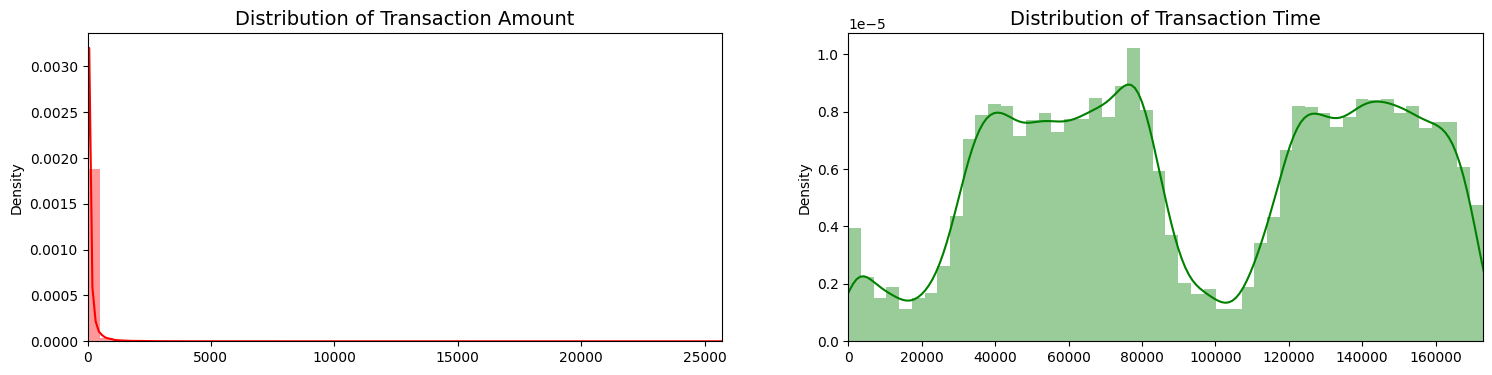

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = credit_df['Amount'].values
time_val = credit_df['Time'].values

#density plot of transaction amount
sns.distplot(amount_val, ax=ax[0], color='red')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

#density plot of transaction time
sns.distplot(time_val, ax=ax[1], color='green')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

<Figure size 640x480 with 0 Axes>

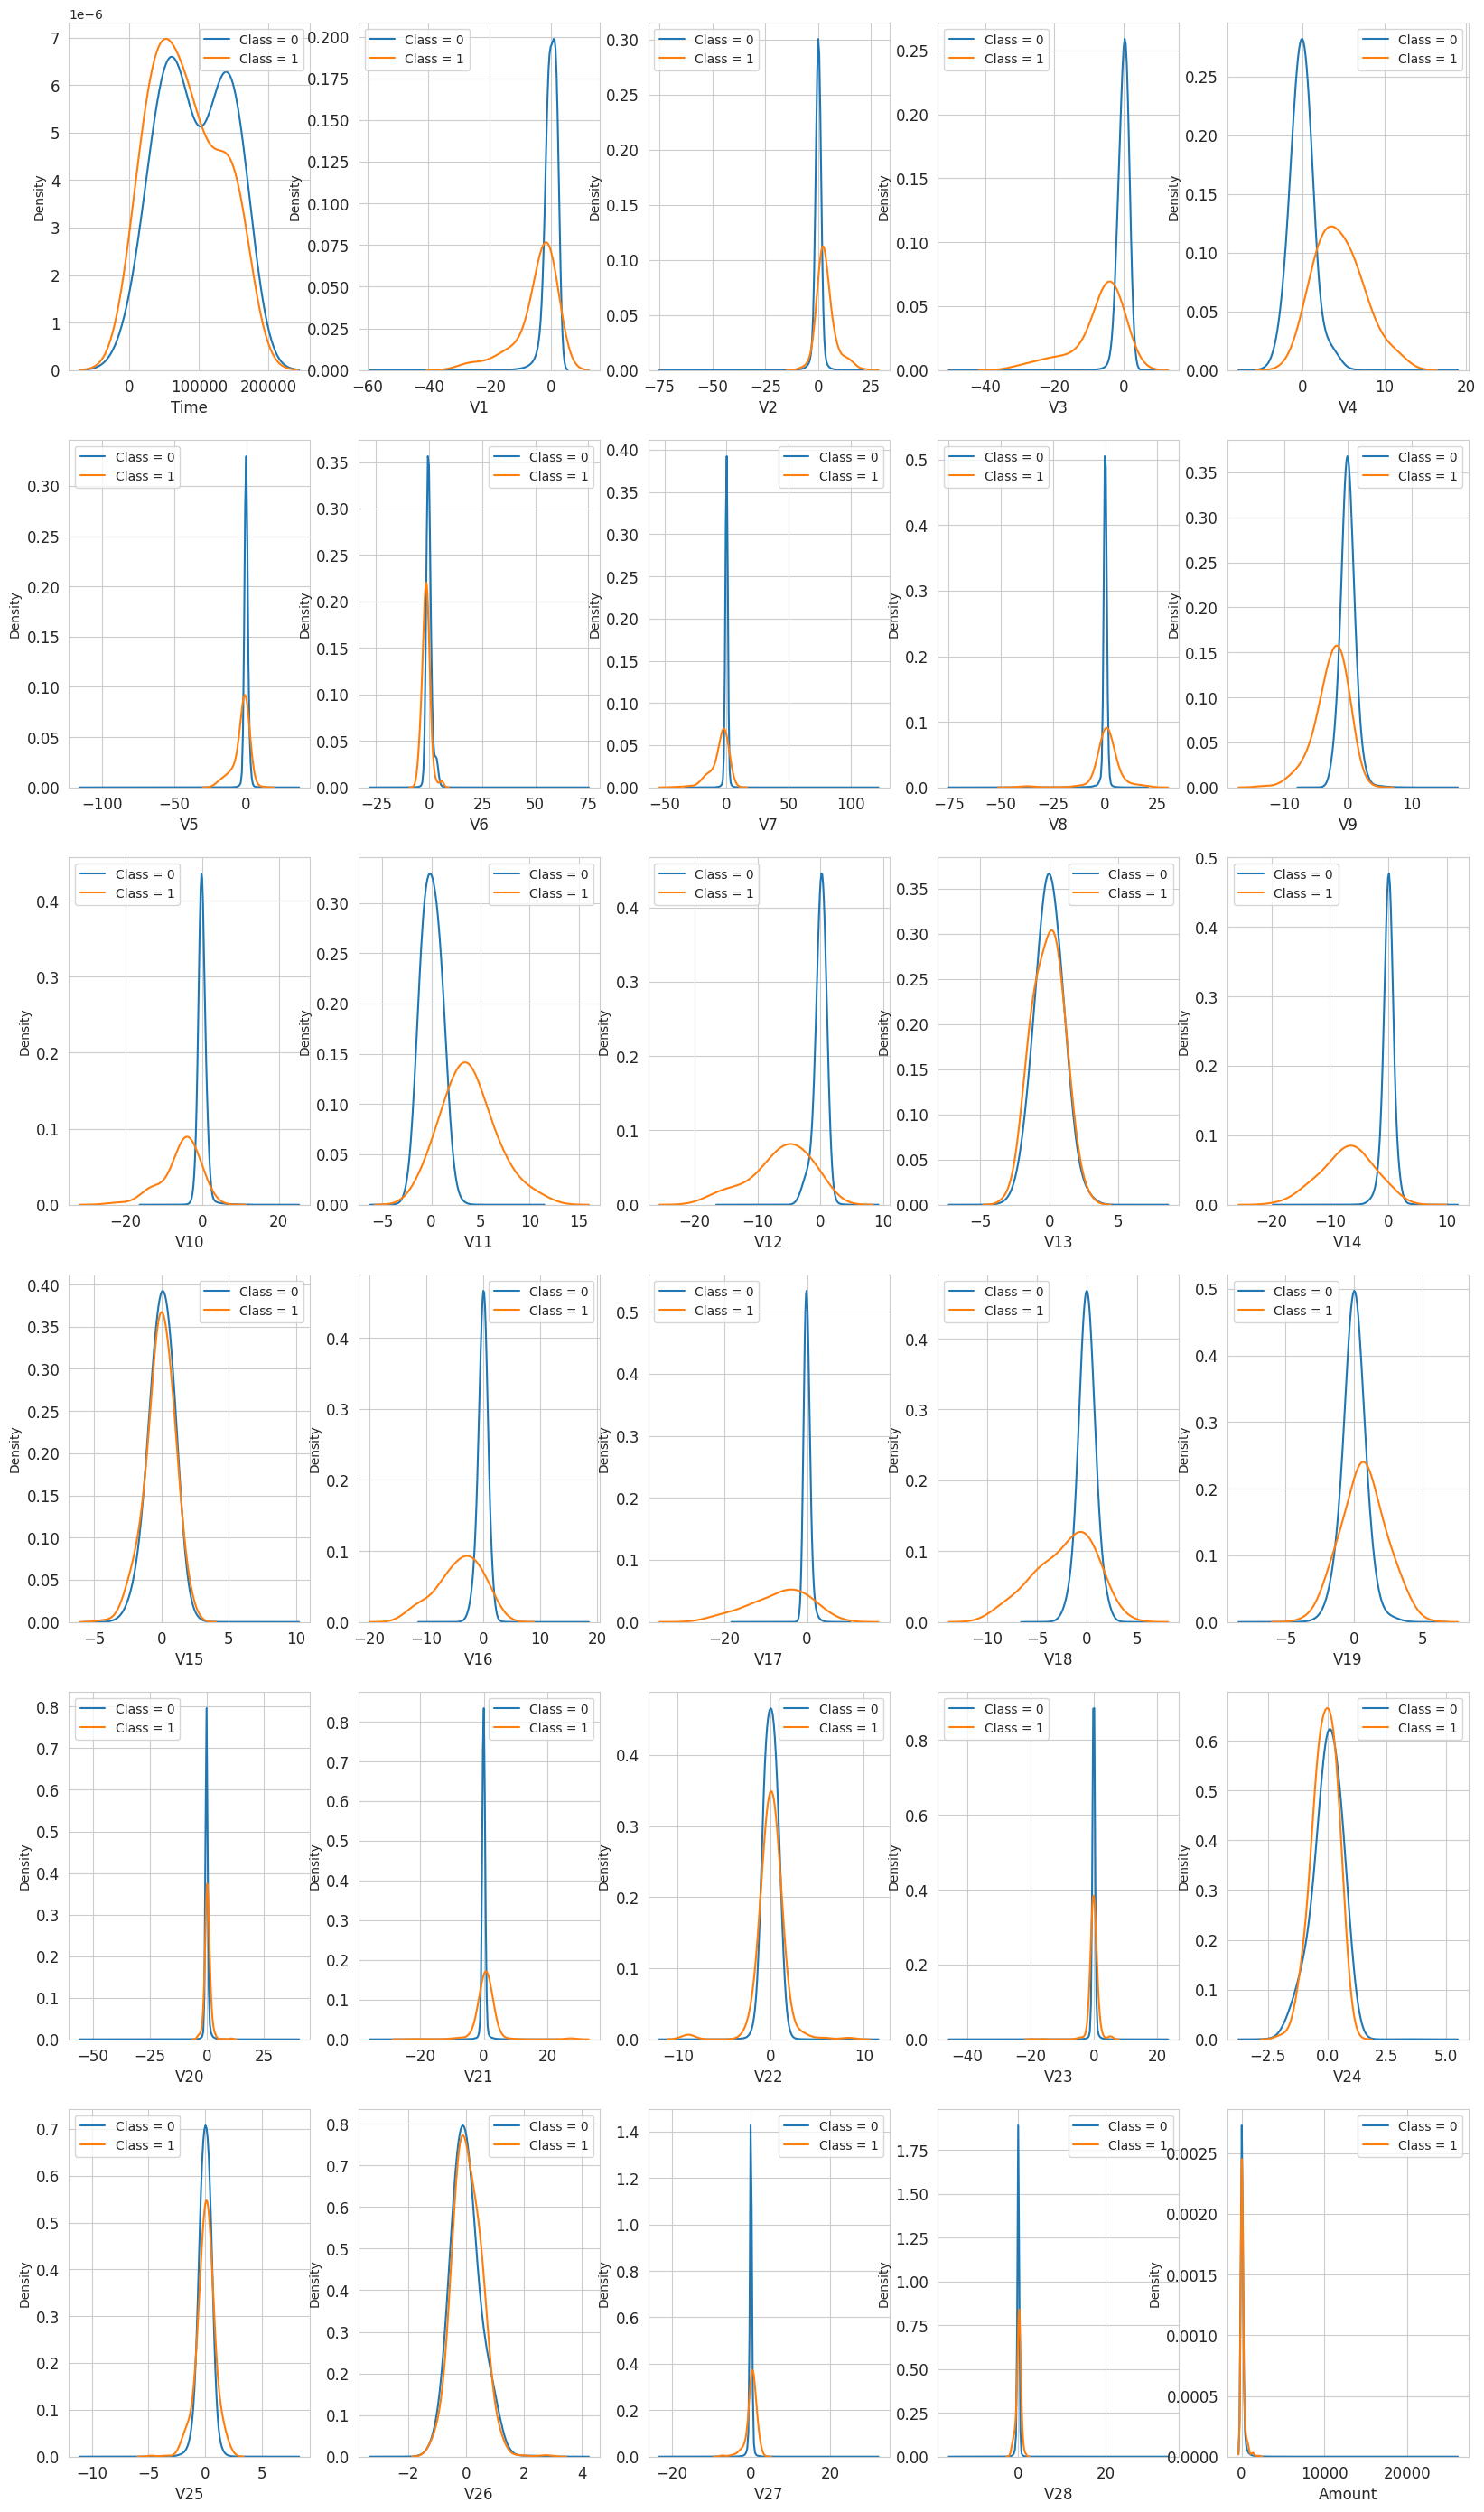

In [ ]:
var = credit_df.columns.values

i = 0
t0 = credit_df.loc[credit_df['Class'] == 0]
t1 = credit_df.loc[credit_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6,5,figsize=(20,35))

#density plot of each feature
for feature in var:
    if(feature!='Class'):
        i += 1
        plt.subplot(6,5,i)
        sns.kdeplot(t0[feature], bw_method=0.5,label="Class = 0")
        sns.kdeplot(t1[feature], bw_method=0.5,label="Class = 1")
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.legend()
plt.show();

In [ ]:
# Function to plot scatter Matrix
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])

    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-11-8429d34dd558>:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



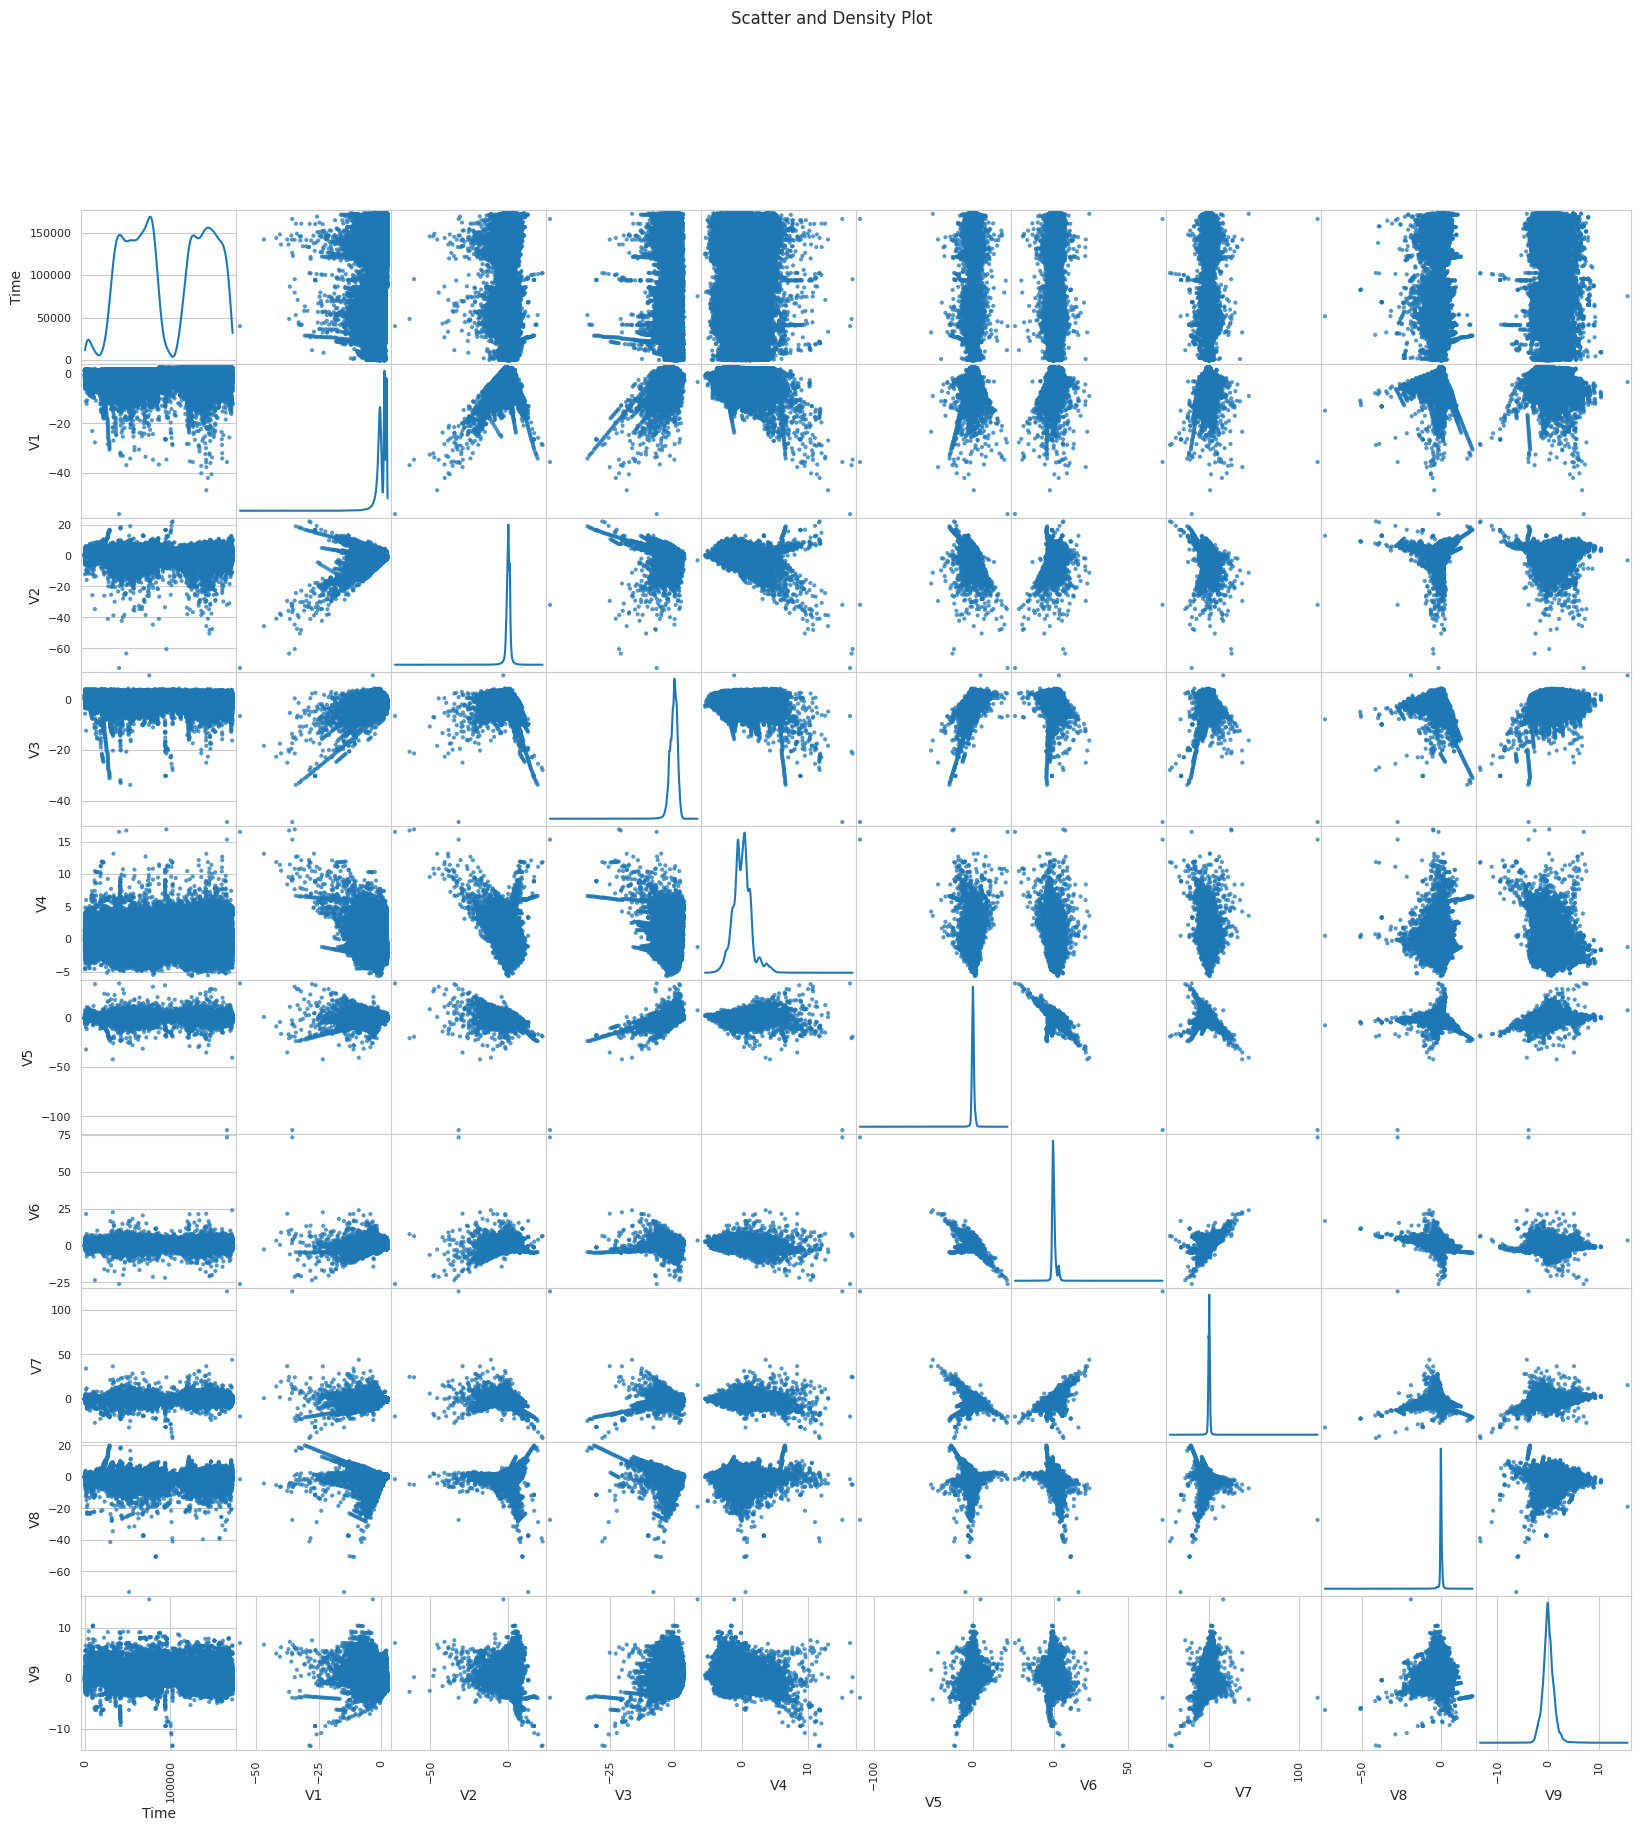

In [ ]:
#Scatter Matrix plot of some of the features with each other
plotScatterMatrix(credit_df, 20, 10)

Plotting Correlation Heatmap of the Dataset

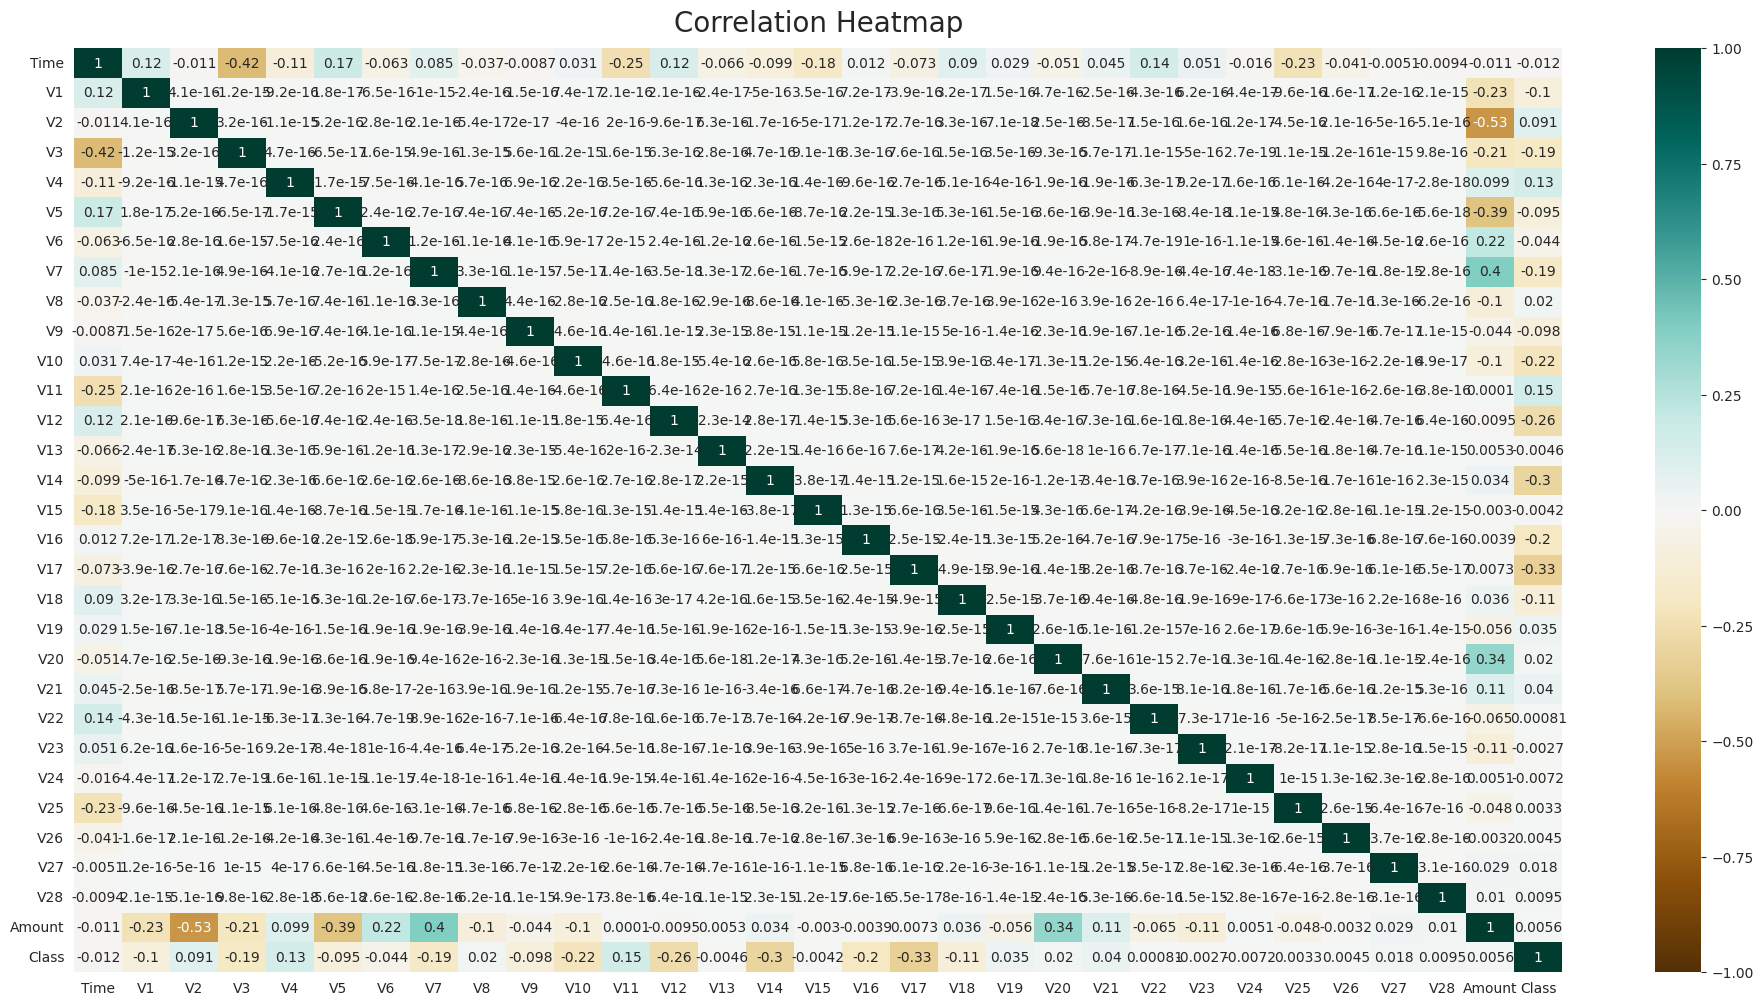

In [ ]:
corr = credit_df.corr()
plt.figure(figsize=(24, 12))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

From Correlation Heatmap we can infer that : 

---


1.   V2 V4 V11 and V19 are more positively correlated with class 
2.   V10 V12 V14 and V17 are more negatively correlated with class

---

 
*   This means higher the value of (V2 ,V4 ,V11 ,V19) the more its likely to belong to Fraudulent class.
*   This also means lower the value of (V10 ,V12 ,V14 ,V17) the more its likely to belong to Fraudulent class.

 





Sepearting the classes

In [ ]:
Normal_df = credit_df[credit_df['Class']==0]
Normal_df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284315 rows x 31 columns]

In [ ]:
Fraud_df = credit_df[credit_df['Class']==1]
Fraud_df

Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  ...       V21       V22       V23  \
541    -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623     0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920    0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108   -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329    1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   
...          ...       ...       ...  ...       ...       ...       ...   
279863 -0.882850  0.697211 -2.064945  ...  0.778584 -0.319189  0.639419   
280143 -1.413170  0.248525 -1.127396  ...  0.370612  0.028234 -0.145640   
280149 -2.234739  1.210158 -0.652250  ...  0.751826  0.834108  0.190944   
281144 -2.208002  1.058733 -1.632333  ...  0.583276 -0.269209 -0.456108   
281674  0.223050 -0.068384  0.577829  ... -0.164350 -0.295135 -0.072173   

             V24       V25       V26       V27       V28  Amount  Class  
541     0.320198  0.044519  0.177840  0.261145 -0.143276    0.00      1  
623    -0.293803  0.279798 -0.145362 -0.252773  0.035764  529.00      1  
4920   -0.087330 -0.156114 -0.542628  0.039566 -0.153029  239.93      1  
6108   -0.053502  0.252405 -0.657488 -0.827136  0.849573   59.00      1  
6329   -1.632653  1.488901  0.566797 -0.010016  0.146793    1.00      1  
...          ...       ...       ...       ...       ...     ...    ...  
279863 -0.294885  0.537503  0.788395  0.292680  0.147968  390.00      1  
280143 -0.081049  0.521875  0.739467  0.389152  0.186637    0.76      1  
280149  0.032070 -0.739695  0.471111  0.385107  0.194361   77.89      1  
281144 -0.183659 -0.328168  0.606116  0.884876 -0.253700  245.00      1  
281674 -0.450261  0.313267 -0.289617  0.002988 -0.015309   42.53      1  

[492 rows x 31 columns]

Some Statistical Analysis

In [ ]:
Normal_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
Fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Comparing the Values for classes

In [ ]:
#comparing values of means for each feature for both classes
credit_df.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30 columns]

We can see that Mean of all the columns for Normal Transactions is much less than Fraudulent Transactions.

# Pre-Processing Dataset

In [ ]:
# Scaling the Features - "Amount" and "Time"
from sklearn.preprocessing import RobustScaler  # Robust Scalar is less prone to outliers
rob_scaler = RobustScaler()

credit_df['Amount_Scaled'] = rob_scaler.fit_transform(credit_df['Amount'].values.reshape(-1,1))
credit_df['Time_Scaled'] = rob_scaler.fit_transform(credit_df['Time'].values.reshape(-1,1))

credit_df.drop(['Time','Amount'], axis=1, inplace=True)

Amount_Scaled = credit_df['Amount_Scaled']
Time_Scaled = credit_df['Time_Scaled']

credit_df.drop(['Amount_Scaled', 'Time_Scaled'], axis=1, inplace=True)
credit_df.insert(0, 'Amount_Scaled', Amount_Scaled)
credit_df.insert(1, 'Time_Scaled', Time_Scaled)

credit_df

Amount_Scaled  Time_Scaled         V1         V2        V3        V4  \
0            1.783274    -0.994983  -1.359807  -0.072781  2.536347  1.378155   
1           -0.269825    -0.994983   1.191857   0.266151  0.166480  0.448154   
2            4.983721    -0.994972  -1.358354  -1.340163  1.773209  0.379780   
3            1.418291    -0.994972  -0.966272  -0.185226  1.792993 -0.863291   
4            0.670579    -0.994960  -1.158233   0.877737  1.548718  0.403034   
...               ...          ...        ...        ...       ...       ...   
284802      -0.296653     1.034951 -11.881118  10.071785 -9.834783 -2.066656   
284803       0.038986     1.034963  -0.732789  -0.055080  2.035030 -0.738589   
284804       0.641096     1.034975   1.919565  -0.301254 -3.249640 -0.557828   
284805      -0.167680     1.034975  -0.240440   0.530483  0.702510  0.689799   
284806       2.724796     1.035022  -0.533413  -0.189733  0.703337 -0.506271   

              V5        V6        V7        V8  ...       V20       V21  \
0      -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307   
1       0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775   
2      -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998   
3      -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300   
4      -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -5.364473 -2.606837 -4.918215  7.305334  ...  1.475829  0.213454   
284803  0.868229  1.058415  0.024330  0.294869  ...  0.059616  0.214205   
284804  2.630515  3.031260 -0.296827  0.708417  ...  0.001396  0.232045   
284805 -0.377961  0.623708 -0.686180  0.679145  ...  0.127434  0.265245   
284806 -0.012546 -0.649617  1.577006 -0.414650  ...  0.382948  0.261057   

             V22       V23       V24       V25       V26       V27       V28  \
0       0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1      -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2       0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3       0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4       0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.111864  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731   
284803  0.924384  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   
284804  0.578229 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   
284805  0.800049 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   
284806  0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

# Under Sampling

## Random Under-Sampling 

One way to handle the imbalance dataset is undersampling which we are going to perform now.

Bulid a sample dataset containing same number of Normal and Fraudulent Transactions

Number of Fraudulent Transactions = 492

In [ ]:
X_under = credit_df.drop("Class", axis="columns")
y_under = credit_df["Class"]

###Spliting into Train and Test Data

In [ ]:
X_train_under,X_test_under,y_train_under,y_test_under = train_test_split(X_under, y_under , test_size = 0.25,random_state = 42)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Undersampling method from sklearn libraby - Reduces Data
under = RandomUnderSampler(random_state = 42 )
X_train_under_resampled, y_train_under_resampled = under.fit_resample(X_train_under, y_train_under)

In [ ]:
X_train_under_resampled

Amount_Scaled  Time_Scaled        V1        V2        V3        V4  \
0        -0.195766    -0.497257 -0.476420  0.739210  1.158568 -0.167937   
1        -0.204010    -0.526686 -0.237207  0.758765  1.803322  0.981746   
2         3.884580    -0.561179 -3.715401 -1.428003 -1.243007 -3.095572   
3        -0.097813    -0.550488  1.422925 -0.318015 -0.071801 -0.574702   
4        -0.000140    -0.587589 -0.377797  1.037173  1.256206  0.079828   
..             ...          ...       ...       ...       ...       ...   
753      -0.286173    -0.511026 -7.896886  5.381020 -8.451162  7.963928   
754      -0.135401    -0.558336 -7.923891 -5.198360 -3.000024  4.420666   
755      -0.262419     0.480739  1.889618  1.073099 -1.678018  4.173268   
756      -0.201355     0.210682 -4.221221  2.871121 -5.888716  6.890952   
757       9.020471     0.706258 -2.405207  2.943823 -7.616654  3.533374   

           V5        V6         V7        V8  ...       V19       V20  \
0    0.259654 -1.654996   0.809808 -0.383876  ... -1.010545 -0.063103   
1    0.189607  0.207307   0.623705  0.043835  ...  0.542692 -0.040802   
2    0.057070  3.670014   0.032594  1.682715  ...  0.292166 -0.450438   
3   -0.837736 -1.598205  -0.053578 -0.402347  ...  0.515544  0.024802   
4   -0.057646 -0.967535   0.738798 -0.051081  ... -0.090552  0.126393   
..        ...       ...        ...       ...  ...       ...       ...   
753 -7.862419 -2.376820 -11.949723  5.051356  ...  3.453943  0.645974   
754  2.272194 -3.394483  -5.283435  0.131619  ...  3.025261 -2.169811   
755  1.015516 -0.009389  -0.079706  0.064071  ... -2.335185 -0.153570   
756 -3.404894 -1.154394  -7.739928  2.851363  ...  0.510570 -0.227882   
757 -5.417494 -0.112632  -1.329372  1.709417  ...  3.490069 -0.338707   

          V21       V22       V23       V24       V25       V26       V27  \
0   -0.166985 -0.258007  0.220099  0.856764 -1.363639 -0.304943  0.179439   
1   -0.051955  0.102118 -0.031632  0.190333 -0.611077 -0.529700  0.031354   
2   -0.030866 -0.245877 -0.479757  1.116283  0.566295 -0.217899 -0.616747   
3    0.206699  0.501618 -0.118717  0.753209  0.732005 -0.104027 -0.032046   
4   -0.257889 -0.731220  0.036010  0.313271 -0.168108  0.073210  0.235673   
..        ...       ...       ...       ...       ...       ...       ...   
753  2.557944  0.926278  0.032795  0.638073  0.361887  0.444577  1.101923   
754 -0.734308 -0.599926 -4.908301  0.410170 -1.167660  0.520508  1.937421   
755  0.203728  0.733796 -0.036560  0.334306  0.147171  0.279556  0.031669   
756  1.620591  1.567947 -0.578007 -0.059045 -1.829169 -0.072429  0.136734   
757  0.652683  0.414132  0.023869 -0.260616  0.405316  0.029107  0.519807   

          V28  
0    0.071724  
1   -0.067608  
2   -0.622073  
3    0.004473  
4    0.098740  
..        ...  
753  0.205958  
754 -1.552593  
755  0.035883  
756 -0.599848  
757 -0.469537  

[758 rows x 30 columns]

In [ ]:
y_train_under.value_counts()

0    213226
1       379
Name: Class, dtype: int64

###Model Training

####Logistic Regression Model

In [ ]:
Logistic_Regression_under = LogisticRegression()

Training Dataset

In [ ]:
Logistic_Regression_under.fit(X_train_under_resampled,y_train_under_resampled)

LogisticRegression()

#####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_under_logistic = Logistic_Regression_under.predict(X_train_under_resampled)
train_accuracy_under_logistic = accuracy_score(y_train_under_resampled,train_pred_under_logistic)
train_precision_under_logistic = precision_score(y_train_under_resampled,train_pred_under_logistic)
train_recall_under_logistic = recall_score(y_train_under_resampled,train_pred_under_logistic)

print("Accuracy on Training Data is: ",round(train_accuracy_under_logistic*100,2)," %")
print("precision on Training Data is: ",round(train_precision_under_logistic*100,2)," %")
print("recall on Training Data is: ",round(train_recall_under_logistic*100,2)," %")

Accuracy on Training Data is:  94.33  %
precision on Training Data is:  96.93  %
recall on Training Data is:  91.56  %


Classwise Accuracy

In [ ]:
pred_under_train_logistic = pd.DataFrame(y_train_under_resampled)
pred_under_train_logistic['predicted'] = train_pred_under_logistic
pred_under_train_logistic

Class  predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
..     ...        ...
753      1          1
754      1          1
755      1          1
756      1          1
757      1          1

[758 rows x 2 columns]

In [ ]:
pred_under_train_cls0_logistic = pred_under_train_logistic[pred_under_train_logistic['Class'] == 0]
pred_under_train_cls1_logistic = pred_under_train_logistic[pred_under_train_logistic['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_under_class0_logistic = accuracy_score(pred_under_train_cls0_logistic['Class'],pred_under_train_cls0_logistic['predicted'])
train_precision_under_class0_logistic = precision_score(pred_under_train_cls0_logistic['Class'],pred_under_train_cls0_logistic['predicted'])
train_recall_under_class0_logistic = recall_score(pred_under_train_cls0_logistic['Class'],pred_under_train_cls0_logistic['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_under_class0_logistic*100,2)," %")
print("precision of Class 0: ",round(train_precision_under_class0_logistic*100,2)," %")
print("recall of Class 0: ",round(train_recall_under_class0_logistic*100,2)," %")

Accuracy of Class 0:  97.1  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_under_class1_logistic = accuracy_score(pred_under_train_cls1_logistic['Class'],pred_under_train_cls1_logistic['predicted'])
train_precision_under_class1_logistic = precision_score(pred_under_train_cls1_logistic['Class'],pred_under_train_cls1_logistic['predicted'])
train_recall_under_class1_logistic = recall_score(pred_under_train_cls1_logistic['Class'],pred_under_train_cls1_logistic['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_under_class1_logistic*100,2)," %")
print("precision of Class 1: ",round(train_precision_under_class1_logistic*100,2)," %")
print("recall of Class 1: ",round(train_recall_under_class1_logistic*100,2)," %")


Accuracy of Class 1:  91.56  %
precision of Class 1:  100.0  %
recall of Class 1:  91.56  %


On Testing Data

In [ ]:
test_pred_under_logistic = Logistic_Regression_under.predict(X_test_under)
test_accuracy1_under_logistic = accuracy_score(y_test_under,test_pred_under_logistic)
test_precision1_under_logistic = precision_score(y_test_under,test_pred_under_logistic)
test_recall1_under_logistic = recall_score(y_test_under,test_pred_under_logistic)


print("Accuracy on Testing Data is: ",round(test_accuracy1_under_logistic*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_under_logistic*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_under_logistic*100,2)," %")


Accuracy on Testing Data is:  97.09  %
precision on Testing Data is:  4.84  %
recall on Testing Data is:  92.92  %


Confusion Matrix

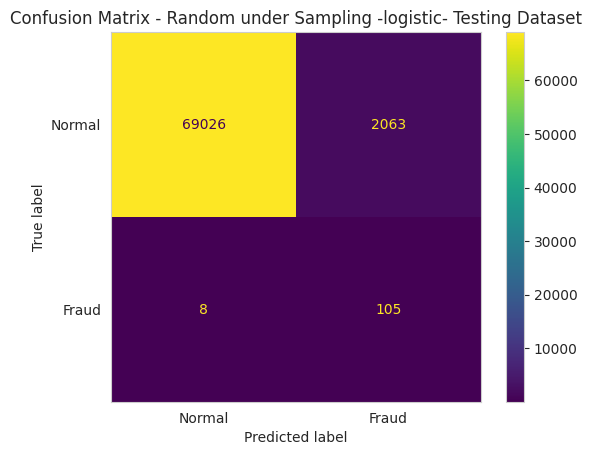

In [ ]:
confusion_matrix_under_logistic = confusion_matrix(y_test_under,test_pred_under_logistic)

cm_display_under_logistic = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_under_logistic, display_labels = ['Normal', 'Fraud'])

cm_display_under_logistic.plot()
plt.title("Confusion Matrix - Random under Sampling -logistic- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

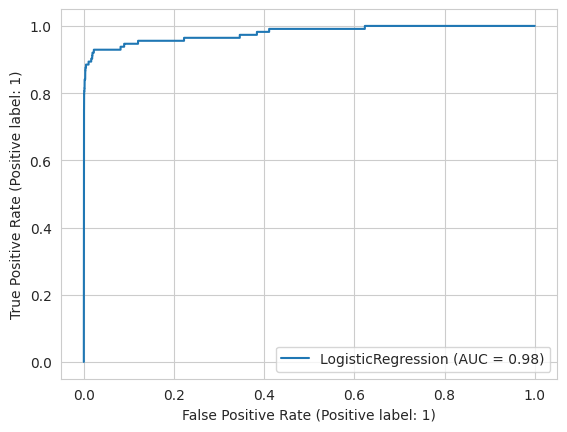

In [ ]:
Roc_display_under_logistic = RocCurveDisplay.from_estimator(Logistic_Regression_under,X_test_under,y_test_under)

Class wise Accuracy

In [ ]:
pred_under_test_logistic = pd.DataFrame(y_test_under)
pred_under_test_logistic['predicted'] = test_pred_under_logistic

pred_under_test_logistic

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_under_test_cls0_logistic = pred_under_test_logistic[pred_under_test_logistic['Class'] == 0]
pred_under_test_cls1_logistic = pred_under_test_logistic[pred_under_test_logistic['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_under_logistic = accuracy_score(pred_under_test_cls0_logistic['Class'],pred_under_test_cls0_logistic['predicted'])
test_precision_class0_under_logistic = precision_score(pred_under_test_cls0_logistic['Class'],pred_under_test_cls0_logistic['predicted'])
test_recall_class0_under_logistic = recall_score(pred_under_test_cls0_logistic['Class'],pred_under_test_cls0_logistic['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_under_logistic*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_under_logistic*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_under_logistic*100,2)," %")


Accuracy of Class 0:  97.1  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_under_logistic = accuracy_score(pred_under_test_cls1_logistic['Class'],pred_under_test_cls1_logistic['predicted'])
test_precision_class1_under_logistic = precision_score(pred_under_test_cls1_logistic['Class'],pred_under_test_cls1_logistic['predicted'])
test_recall_class1_under_logistic = recall_score(pred_under_test_cls1_logistic['Class'],pred_under_test_cls1_logistic['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_under_logistic*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_under_logistic*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_under_logistic*100,2)," %")


Accuracy of Class 1:  92.92  %
precision of Class 1:  100.0  %
recall of Class 1:  92.92  %


#### Random Forest Classifier

In [ ]:
Random_Forest_under = RandomForestClassifier()

Training Dataset

In [ ]:
Random_Forest_under.fit(X_train_under_resampled,y_train_under_resampled)

RandomForestClassifier()

#####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_under_RF = Random_Forest_under.predict(X_train_under_resampled)
train_accuracy_under_RF = accuracy_score(y_train_under_resampled,train_pred_under_RF)
train_precision_under_RF = precision_score(y_train_under_resampled,train_pred_under_RF)
train_recall_under_RF = recall_score(y_train_under_resampled,train_pred_under_RF)


print("Accuracy on Training Data is: ",round(train_accuracy_under_RF*100,2)," %")
print("precision on Training Data is: ",round(train_precision_under_RF*100,2)," %")
print("recall on Training Data is: ",round(train_recall_under_RF*100,2)," %")


Accuracy on Training Data is:  99.87  %
precision on Training Data is:  100.0  %
recall on Training Data is:  99.74  %


Classwise Accuracy

In [ ]:
pred_under_train_RF = pd.DataFrame(y_train_under_resampled)
pred_under_train_RF['predicted'] = train_pred_under_RF
pred_under_train_RF

Class  predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
..     ...        ...
753      1          1
754      1          1
755      1          1
756      1          1
757      1          1

[758 rows x 2 columns]

In [ ]:
pred_under_train_cls0_RF = pred_under_train_RF[pred_under_train_RF['Class'] == 0]
pred_under_train_cls1_RF = pred_under_train_RF[pred_under_train_RF['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_under_class0_RF = accuracy_score(pred_under_train_cls0_RF['Class'],pred_under_train_cls0_RF['predicted'])
train_precision_under_class0_RF = precision_score(pred_under_train_cls0_RF['Class'],pred_under_train_cls0_RF['predicted'])
train_recall_under_class0_RF = recall_score(pred_under_train_cls0_RF['Class'],pred_under_train_cls0_RF['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_under_class0_RF*100,2)," %")
print("precision of Class 0: ",round(train_precision_under_class0_RF*100,2)," %")
print("recall of Class 0: ",round(train_recall_under_class0_RF*100,2)," %")


Accuracy of Class 0:  100.0  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_under_class1_RF = accuracy_score(pred_under_train_cls1_RF['Class'],pred_under_train_cls1_RF['predicted'])
train_precision_under_class1_RF = precision_score(pred_under_train_cls1_RF['Class'],pred_under_train_cls1_RF['predicted'])
train_recall_under_class1_RF = recall_score(pred_under_train_cls1_RF['Class'],pred_under_train_cls1_RF['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_under_class1_RF*100,2)," %")
print("precision of Class 1: ",round(train_precision_under_class1_RF*100,2)," %")
print("recall of Class 1: ",round(train_recall_under_class1_RF*100,2)," %")


Accuracy of Class 1:  99.74  %
precision of Class 1:  100.0  %
recall of Class 1:  99.74  %


On Testing Data

In [ ]:
test_pred_under_RF = Random_Forest_under.predict(X_test_under)
test_accuracy1_under_RF = accuracy_score(y_test_under,test_pred_under_RF)
test_precision1_under_RF = precision_score(y_test_under,test_pred_under_RF)
test_recall1_under_RF = recall_score(y_test_under,test_pred_under_RF)


print("Accuracy on Testing Data is: ",round(test_accuracy1_under_RF*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_under_RF*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_under_RF*100,2)," %")


Accuracy on Testing Data is:  96.92  %
precision on Testing Data is:  4.51  %
recall on Testing Data is:  91.15  %


Confusion Matrix

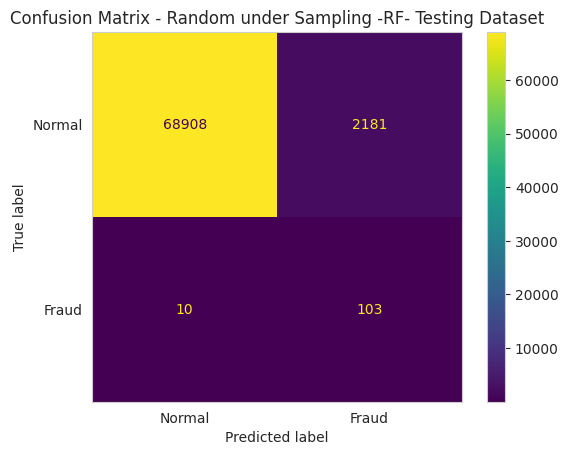

In [ ]:
confusion_matrix_under_RF = confusion_matrix(y_test_under,test_pred_under_RF)

cm_display_under_RF = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_under_RF, display_labels = ['Normal', 'Fraud'])

cm_display_under_RF.plot()
plt.title("Confusion Matrix - Random under Sampling -RF- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

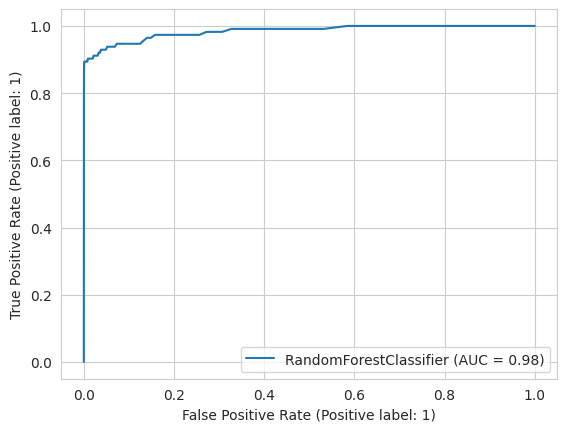

In [ ]:
Roc_display_under_RF = RocCurveDisplay.from_estimator(Random_Forest_under,X_test_under,y_test_under)

Class wise Accuracy

In [ ]:
pred_under_test_RF = pd.DataFrame(y_test_under)
pred_under_test_RF['predicted'] = test_pred_under_RF

pred_under_test_RF

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_under_test_cls0_RF = pred_under_test_RF[pred_under_test_RF['Class'] == 0]
pred_under_test_cls1_RF = pred_under_test_RF[pred_under_test_RF['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_under_RF = accuracy_score(pred_under_test_cls0_RF['Class'],pred_under_test_cls0_RF['predicted'])
test_precision_class0_under_RF = precision_score(pred_under_test_cls0_RF['Class'],pred_under_test_cls0_RF['predicted'])
test_recall_class0_under_RF = recall_score(pred_under_test_cls0_RF['Class'],pred_under_test_cls0_RF['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_under_RF*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_under_RF*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_under_RF*100,2)," %")


Accuracy of Class 0:  96.93  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_under_RF = accuracy_score(pred_under_test_cls1_RF['Class'],pred_under_test_cls1_RF['predicted'])
test_precision_class1_under_RF = precision_score(pred_under_test_cls1_RF['Class'],pred_under_test_cls1_RF['predicted'])
test_recall_class1_under_RF = recall_score(pred_under_test_cls1_RF['Class'],pred_under_test_cls1_RF['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_under_RF*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_under_RF*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_under_RF*100,2)," %")


Accuracy of Class 1:  91.15  %
precision of Class 1:  100.0  %
recall of Class 1:  91.15  %


#### Xtreme Gradient Boosting Classifier (XGBClassifier) 

In [ ]:
import xgboost as xgb

In [ ]:
xgb_under = xgb.XGBClassifier(objective="binary:logistic")

Training Dataset

In [ ]:
xgb_under.fit(X_train_under_resampled,y_train_under_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

##### Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_under_xgb = xgb_under.predict(X_train_under_resampled)
train_accuracy_under_xgb = accuracy_score(y_train_under_resampled,train_pred_under_xgb)
train_precision_under_xgb = precision_score(y_train_under_resampled,train_pred_under_xgb)
train_recall_under_xgb = recall_score(y_train_under_resampled,train_pred_under_xgb)


print("Accuracy on Training Data is: ",round(train_accuracy_under_xgb*100,2)," %")
print("precision on Training Data is: ",round(train_precision_under_xgb*100,2)," %")
print("recall on Training Data is: ",round(train_recall_under_xgb*100,2)," %")


Accuracy on Training Data is:  100.0  %
precision on Training Data is:  100.0  %
recall on Training Data is:  100.0  %


Classwise Accuracy

In [ ]:
pred_under_train_xgb = pd.DataFrame(y_train_under_resampled)
pred_under_train_xgb['predicted'] = train_pred_under_xgb
pred_under_train_xgb

Class  predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
..     ...        ...
753      1          1
754      1          1
755      1          1
756      1          1
757      1          1

[758 rows x 2 columns]

In [ ]:
pred_under_train_cls0_xgb = pred_under_train_xgb[pred_under_train_xgb['Class'] == 0]
pred_under_train_cls1_xgb = pred_under_train_xgb[pred_under_train_xgb['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_under_class0_xgb = accuracy_score(pred_under_train_cls0_xgb['Class'],pred_under_train_cls0_xgb['predicted'])
train_precision_under_class0_xgb = precision_score(pred_under_train_cls0_xgb['Class'],pred_under_train_cls0_xgb['predicted'])
train_recall_under_class0_xgb = recall_score(pred_under_train_cls0_xgb['Class'],pred_under_train_cls0_xgb['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_under_class0_xgb*100,2)," %")
print("precision of Class 0: ",round(train_precision_under_class0_xgb*100,2)," %")
print("recall of Class 0: ",round(train_recall_under_class0_xgb*100,2)," %")


Accuracy of Class 0:  100.0  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_under_class1_xgb = accuracy_score(pred_under_train_cls1_xgb['Class'],pred_under_train_cls1_xgb['predicted'])
train_precision_under_class1_xgb = precision_score(pred_under_train_cls1_xgb['Class'],pred_under_train_cls1_xgb['predicted'])
train_recall_under_class1_xgb = recall_score(pred_under_train_cls1_xgb['Class'],pred_under_train_cls1_xgb['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_under_class1_xgb*100,2)," %")
print("precision of Class 1: ",round(train_precision_under_class1_xgb*100,2)," %")
print("recall of Class 1: ",round(train_recall_under_class1_xgb*100,2)," %")


Accuracy of Class 1:  100.0  %
precision of Class 1:  100.0  %
recall of Class 1:  100.0  %


On Testing Data

In [ ]:
test_pred_under_xgb = xgb_under.predict(X_test_under)
test_accuracy1_under_xgb = accuracy_score(y_test_under,test_pred_under_xgb)
test_precision1_under_xgb = precision_score(y_test_under,test_pred_under_xgb)
test_recall1_under_xgb = recall_score(y_test_under,test_pred_under_xgb)


print("Accuracy on Testing Data is: ",round(test_accuracy1_under_xgb*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_under_xgb*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_under_xgb*100,2)," %")


Accuracy on Testing Data is:  96.57  %
precision on Testing Data is:  4.13  %
recall on Testing Data is:  92.92  %


Confusion Matrix

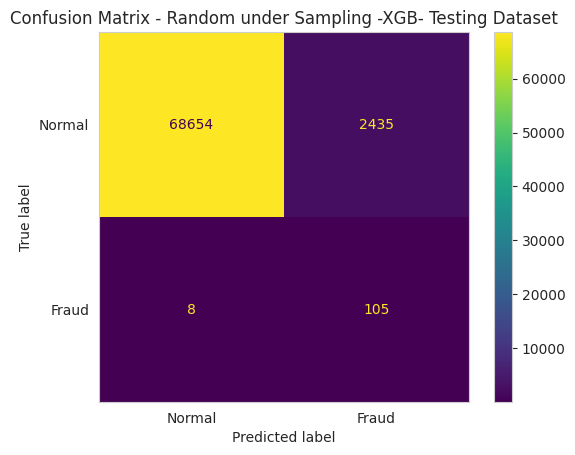

In [ ]:
confusion_matrix_under_xgb = confusion_matrix(y_test_under,test_pred_under_xgb)

cm_display_under_xgb = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_under_xgb, display_labels = ['Normal', 'Fraud'])

cm_display_under_xgb.plot()
plt.title("Confusion Matrix - Random under Sampling -XGB- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

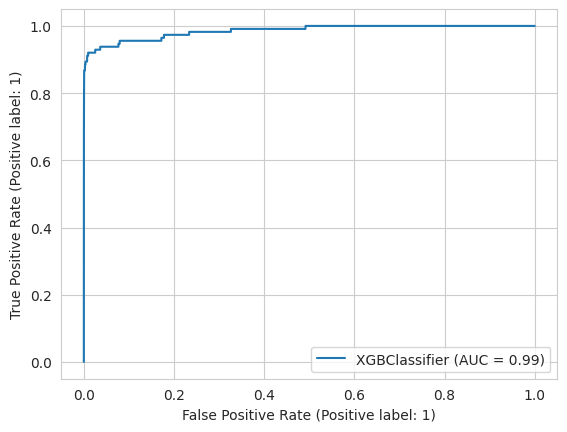

In [ ]:
Roc_display_under_xgb = RocCurveDisplay.from_estimator(xgb_under,X_test_under,y_test_under)

Class wise Accuracy

In [ ]:
pred_under_test_xgb = pd.DataFrame(y_test_under)
pred_under_test_xgb['predicted'] = test_pred_under_xgb

pred_under_test_xgb

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_under_test_cls0_xgb = pred_under_test_xgb[pred_under_test_xgb['Class'] == 0]
pred_under_test_cls1_xgb = pred_under_test_xgb[pred_under_test_xgb['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_under_xgb = accuracy_score(pred_under_test_cls0_xgb['Class'],pred_under_test_cls0_xgb['predicted'])
test_precision_class0_under_xgb = precision_score(pred_under_test_cls0_xgb['Class'],pred_under_test_cls0_xgb['predicted'])
test_recall_class0_under_xgb = recall_score(pred_under_test_cls0_xgb['Class'],pred_under_test_cls0_xgb['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_under_xgb*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_under_xgb*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_under_xgb*100,2)," %")


Accuracy of Class 0:  96.57  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_under_xgb = accuracy_score(pred_under_test_cls1_xgb['Class'],pred_under_test_cls1_xgb['predicted'])
test_precision_class1_under_xgb = precision_score(pred_under_test_cls1_xgb['Class'],pred_under_test_cls1_xgb['predicted'])
test_recall_class1_under_xgb = recall_score(pred_under_test_cls1_xgb['Class'],pred_under_test_cls1_xgb['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_under_xgb*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_under_xgb*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_under_xgb*100,2)," %")


Accuracy of Class 1:  92.92  %
precision of Class 1:  100.0  %
recall of Class 1:  92.92  %


#### Support Vector Machine Classifier





In [ ]:
svc_under = SVC()

Training Dataset

In [ ]:
svc_under.fit(X_train_under_resampled,y_train_under_resampled)

SVC()

#####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_under_svc = svc_under.predict(X_train_under_resampled)
train_accuracy_under_svc = accuracy_score(y_train_under_resampled,train_pred_under_svc)
train_precision_under_svc = precision_score(y_train_under_resampled,train_pred_under_svc)
train_recall_under_svc = recall_score(y_train_under_resampled,train_pred_under_svc)

print("Accuracy on Training Data is: ",round(train_accuracy_under_svc*100,2)," %")
print("precision on Training Data is: ",round(train_precision_under_svc*100,2)," %")
print("recall on Training Data is: ",round(train_recall_under_svc*100,2)," %")

Accuracy on Training Data is:  93.67  %
precision on Training Data is:  98.53  %
recall on Training Data is:  88.65  %


Classwise Accuracy

In [ ]:
pred_under_train_svc = pd.DataFrame(y_train_under_resampled)
pred_under_train_svc['predicted'] = train_pred_under_svc
pred_under_train_svc

Class  predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
..     ...        ...
753      1          1
754      1          1
755      1          1
756      1          1
757      1          1

[758 rows x 2 columns]

In [ ]:
pred_under_train_cls0_svc = pred_under_train_svc[pred_under_train_svc['Class'] == 0]
pred_under_train_cls1_svc = pred_under_train_svc[pred_under_train_svc['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_under_class0_svc = accuracy_score(pred_under_train_cls0_svc['Class'],pred_under_train_cls0_svc['predicted'])
train_precision_under_class0_svc = precision_score(pred_under_train_cls0_svc['Class'],pred_under_train_cls0_svc['predicted'])
train_recall_under_class0_svc = recall_score(pred_under_train_cls0_svc['Class'],pred_under_train_cls0_svc['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_under_class0_svc*100,2)," %")
print("precision of Class 0: ",round(train_precision_under_class0_svc*100,2)," %")
print("recall of Class 0: ",round(train_recall_under_class0_svc*100,2)," %")

Accuracy of Class 0:  98.68  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_under_class1_svc = accuracy_score(pred_under_train_cls1_svc['Class'],pred_under_train_cls1_svc['predicted'])
train_precision_under_class1_svc = precision_score(pred_under_train_cls1_svc['Class'],pred_under_train_cls1_svc['predicted'])
train_recall_under_class1_svc = recall_score(pred_under_train_cls1_svc['Class'],pred_under_train_cls1_svc['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_under_class1_svc*100,2)," %")
print("precision of Class 1: ",round(train_precision_under_class1_svc*100,2)," %")
print("recall of Class 1: ",round(train_recall_under_class1_svc*100,2)," %")


Accuracy of Class 1:  88.65  %
precision of Class 1:  100.0  %
recall of Class 1:  88.65  %


On Testing Data

In [ ]:
test_pred_under_svc = svc_under.predict(X_test_under)
test_accuracy1_under_svc = accuracy_score(y_test_under,test_pred_under_svc)
test_precision1_under_svc = precision_score(y_test_under,test_pred_under_svc)
test_recall1_under_svc = recall_score(y_test_under,test_pred_under_svc)


print("Accuracy on Testing Data is: ",round(test_accuracy1_under_svc*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_under_svc*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_under_svc*100,2)," %")


Accuracy on Testing Data is:  98.22  %
precision on Testing Data is:  7.46  %
recall on Testing Data is:  89.38  %


Confusion Matrix

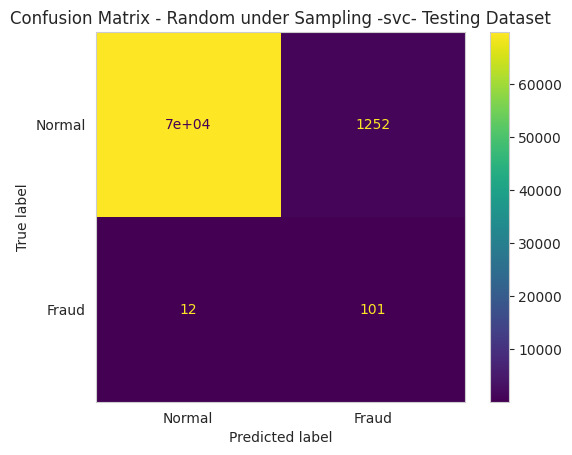

In [ ]:
confusion_matrix_under_svc = confusion_matrix(y_test_under,test_pred_under_svc)

cm_display_under_svc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_under_svc, display_labels = ['Normal', 'Fraud'])

cm_display_under_svc.plot()
plt.title("Confusion Matrix - Random under Sampling -svc- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

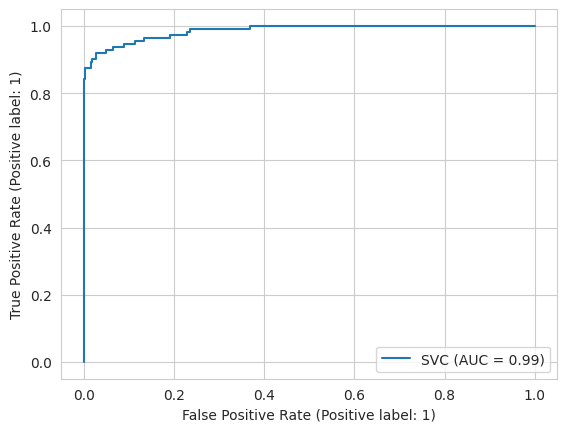

In [ ]:
Roc_display_under_svc = RocCurveDisplay.from_estimator(svc_under,X_test_under,y_test_under)

Class wise Accuracy

In [ ]:
pred_under_test_svc = pd.DataFrame(y_test_under)
pred_under_test_svc['predicted'] = test_pred_under_svc

pred_under_test_svc

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_under_test_cls0_svc = pred_under_test_svc[pred_under_test_svc['Class'] == 0]
pred_under_test_cls1_svc = pred_under_test_svc[pred_under_test_svc['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_under_svc = accuracy_score(pred_under_test_cls0_svc['Class'],pred_under_test_cls0_svc['predicted'])
test_precision_class0_under_svc = precision_score(pred_under_test_cls0_svc['Class'],pred_under_test_cls0_svc['predicted'])
test_recall_class0_under_svc = recall_score(pred_under_test_cls0_svc['Class'],pred_under_test_cls0_svc['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_under_svc*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_under_svc*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_under_svc*100,2)," %")


Accuracy of Class 0:  98.24  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_under_svc = accuracy_score(pred_under_test_cls1_svc['Class'],pred_under_test_cls1_svc['predicted'])
test_precision_class1_under_svc = precision_score(pred_under_test_cls1_svc['Class'],pred_under_test_cls1_svc['predicted'])
test_recall_class1_under_svc = recall_score(pred_under_test_cls1_svc['Class'],pred_under_test_cls1_svc['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_under_svc*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_under_svc*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_under_svc*100,2)," %")


Accuracy of Class 1:  89.38  %
precision of Class 1:  100.0  %
recall of Class 1:  89.38  %


### Evaluation graphs

In [ ]:
Model = ["Logistic Regression","Random Forest","XGB Classifier","SVM Classifier"]

Accuracy Graph

In [ ]:
Acc_under_train_cls0 = [train_accuracy_under_class0_logistic,train_accuracy_under_class0_RF,train_accuracy_under_class0_xgb,train_accuracy_under_class0_svc]
Acc_under_test_cls0 = [test_accuracy_class0_under_logistic,test_accuracy_class0_under_RF,test_accuracy_class0_under_xgb,test_accuracy_class0_under_svc]
Acc_under_train_cls1 = [train_accuracy_under_class1_logistic,train_accuracy_under_class1_RF,train_accuracy_under_class1_xgb,train_accuracy_under_class1_svc]
Acc_under_test_cls1 = [test_accuracy_class1_under_logistic,test_accuracy_class1_under_RF,test_accuracy_class1_under_xgb,test_accuracy_class1_under_svc]

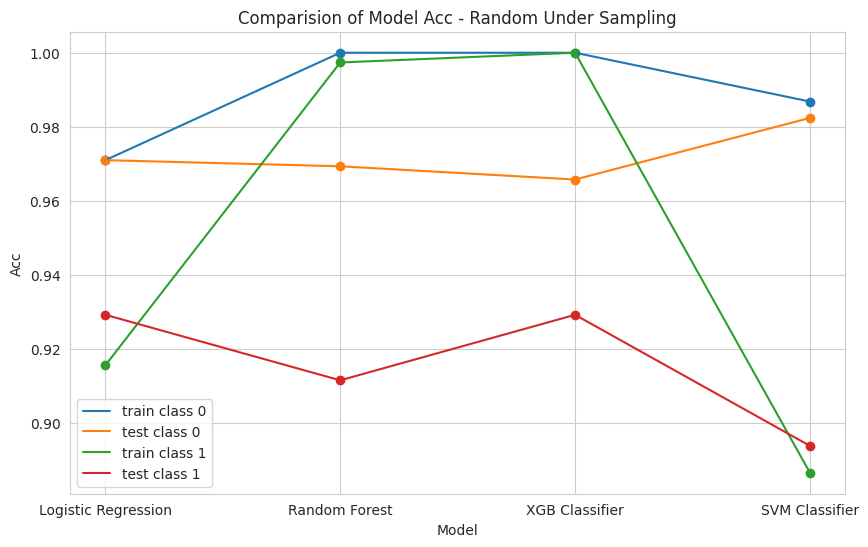

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Acc_under_train_cls0, label = "train class 0")
plt.scatter(Model,Acc_under_train_cls0)

plt.plot(Model,Acc_under_test_cls0, label = "test class 0")
plt.scatter(Model,Acc_under_test_cls0)

plt.plot(Model,Acc_under_train_cls1, label = "train class 1")
plt.scatter(Model,Acc_under_train_cls1)

plt.plot(Model,Acc_under_test_cls1, label = "test class 1")
plt.scatter(Model,Acc_under_test_cls1)

plt.ylabel("Acc")
plt.xlabel("Model")
plt.title("Comparision of Model Acc - Random Under Sampling")
plt.legend()
plt.show()

Precision Graph

In [ ]:
Pre_under_train_cls0 = [train_precision_under_class0_logistic,train_precision_under_class0_RF,train_precision_under_class0_xgb,train_precision_under_class0_svc]
Pre_under_test_cls0 = [test_precision_class0_under_logistic,test_precision_class0_under_RF,test_precision_class0_under_xgb,test_precision_class0_under_svc]
Pre_under_train_cls1 = [train_precision_under_class1_logistic,train_precision_under_class1_RF,train_precision_under_class1_xgb,train_precision_under_class1_svc]
Pre_under_test_cls1 = [test_precision_class1_under_logistic,test_precision_class1_under_RF,test_precision_class1_under_xgb,test_precision_class1_under_svc]

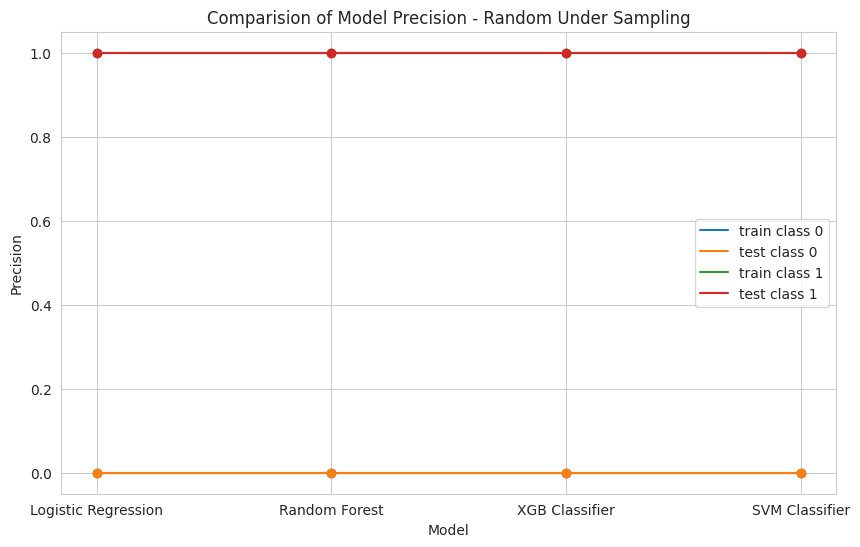

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Pre_under_train_cls0, label = "train class 0")
plt.scatter(Model,Pre_under_train_cls0)

plt.plot(Model,Pre_under_test_cls0, label = "test class 0")
plt.scatter(Model,Pre_under_test_cls0)

plt.plot(Model,Pre_under_train_cls1, label = "train class 1")
plt.scatter(Model,Pre_under_train_cls1)

plt.plot(Model,Pre_under_test_cls1, label = "test class 1")
plt.scatter(Model,Pre_under_test_cls1)

plt.ylabel("Precision")
plt.xlabel("Model")
plt.title("Comparision of Model Precision - Random Under Sampling")
plt.legend()
plt.show()

Recall Graph

In [ ]:
Recall_under_train_cls0 = [train_recall_under_class0_logistic,train_recall_under_class0_RF,train_recall_under_class0_xgb,train_recall_under_class0_svc]
Recall_under_test_cls0 = [test_recall_class0_under_logistic,test_recall_class0_under_RF,test_recall_class0_under_xgb,test_recall_class0_under_svc]
Recall_under_train_cls1 = [train_recall_under_class1_logistic,train_recall_under_class1_RF,train_recall_under_class1_xgb,train_recall_under_class1_svc]
Recall_under_test_cls1 = [test_recall_class1_under_logistic,test_recall_class1_under_RF,test_recall_class1_under_xgb,test_recall_class1_under_svc]

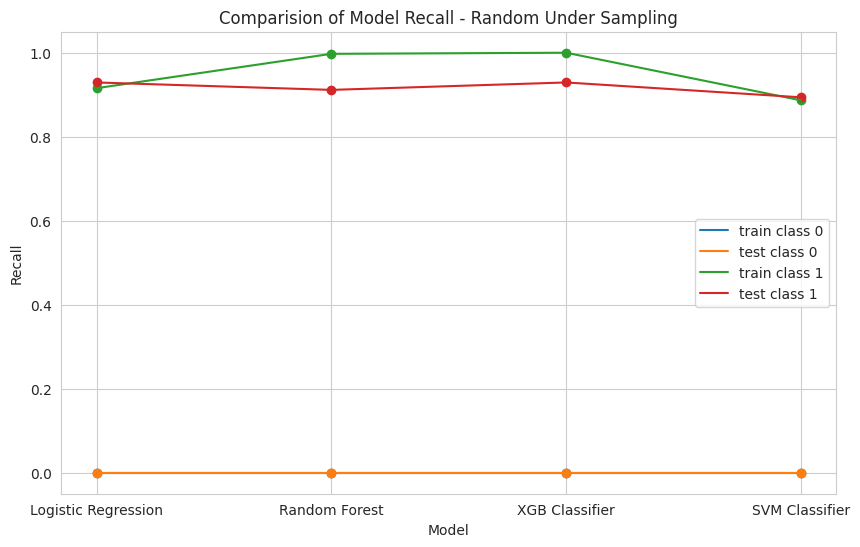

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Recall_under_train_cls0, label = "train class 0")
plt.scatter(Model,Recall_under_train_cls0)

plt.plot(Model,Recall_under_test_cls0, label = "test class 0")
plt.scatter(Model,Recall_under_test_cls0)

plt.plot(Model,Recall_under_train_cls1, label = "train class 1")
plt.scatter(Model,Recall_under_train_cls1)

plt.plot(Model,Recall_under_test_cls1, label = "test class 1")
plt.scatter(Model,Recall_under_test_cls1)

plt.ylabel("Recall")
plt.xlabel("Model")
plt.title("Comparision of Model Recall - Random Under Sampling")
plt.legend()
plt.show()

## ENN - Edited Nearest Neighbours

In [ ]:
X_enn = credit_df.drop("Class", axis="columns")
y_enn = credit_df["Class"]

###Spliting into Train and Test Data

In [ ]:
X_train_enn,X_test_enn,y_train_enn,y_test_enn = train_test_split(X_enn, y_enn , test_size = 0.25,random_state = 42)

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

In [ ]:
enn = EditedNearestNeighbours()
X_train_enn_resampled, y_train_enn_resampled = enn.fit_resample(X_train_enn, y_train_enn)

In [ ]:
X_train_enn_resampled

Amount_Scaled  Time_Scaled        V1        V2        V3        V4  \
0            0.229442    -0.293131 -1.648591  1.228130  1.370169 -1.735542   
1            0.547754    -0.458699 -0.234775 -0.493269  1.236728 -2.338793   
2            1.242926    -0.623985  1.134626 -0.774460 -0.163390 -0.533358   
3           -0.167680    -0.049777  0.069514  1.017753  1.033117  1.384376   
4            0.000000    -0.533253 -0.199441  0.610092 -0.114437  0.256565   
...               ...          ...       ...       ...       ...       ...   
213450      -0.286173    -0.511026 -7.896886  5.381020 -8.451162  7.963928   
213451      -0.135401    -0.558336 -7.923891 -5.198360 -3.000024  4.420666   
213452      -0.262419     0.480739  1.889618  1.073099 -1.678018  4.173268   
213453      -0.201355     0.210682 -4.221221  2.871121 -5.888716  6.890952   
213454       9.020471     0.706258 -2.405207  2.943823 -7.616654  3.533374   

              V5        V6         V7        V8  ...       V19       V20  \
0      -0.029455 -0.484129   0.918645 -0.438750  ... -0.331603  0.384201   
1      -1.176733  0.885733  -1.960981 -2.363412  ... -1.635634  0.364679   
2      -0.604555 -0.244482  -0.212682  0.040782  ... -0.519459 -0.396476   
3       0.223233 -0.310845   0.597287 -0.127658  ...  1.561447  0.148760   
4       2.290752  4.008475  -0.123530  1.038374  ...  1.375281  0.292972   
...          ...       ...        ...       ...  ...       ...       ...   
213450 -7.862419 -2.376820 -11.949723  5.051356  ...  3.453943  0.645974   
213451  2.272194 -3.394483  -5.283435  0.131619  ...  3.025261 -2.169811   
213452  1.015516 -0.009389  -0.079706  0.064071  ... -2.335185 -0.153570   
213453 -3.404894 -1.154394  -7.739928  2.851363  ...  0.510570 -0.227882   
213454 -5.417494 -0.112632  -1.329372  1.709417  ...  3.490069 -0.338707   

             V21       V22       V23       V24       V25       V26       V27  \
0      -0.218076 -0.203458 -0.213015  0.011372 -0.304481  0.632063 -0.262968   
1      -1.495358 -0.083066  0.074612 -0.347329  0.541900 -0.433294  0.089293   
2      -0.684454 -1.855269  0.171997 -0.387783 -0.062985  0.245118 -0.061178   
3       0.097023  0.369957 -0.219266 -0.124941 -0.049749 -0.112946  0.114440   
4      -0.019733  0.165463 -0.080978  1.020656 -0.300730 -0.269595  0.481769   
...          ...       ...       ...       ...       ...       ...       ...   
213450  2.557944  0.926278  0.032795  0.638073  0.361887  0.444577  1.101923   
213451 -0.734308 -0.599926 -4.908301  0.410170 -1.167660  0.520508  1.937421   
213452  0.203728  0.733796 -0.036560  0.334306  0.147171  0.279556  0.031669   
213453  1.620591  1.567947 -0.578007 -0.059045 -1.829169 -0.072429  0.136734   
213454  0.652683  0.414132  0.023869 -0.260616  0.405316  0.029107  0.519807   

             V28  
0      -0.099863  
1       0.212029  
2       0.012180  
3       0.066101  
4       0.254114  
...          ...  
213450  0.205958  
213451 -1.552593  
213452  0.035883  
213453 -0.599848  
213454 -0.469537  

[213455 rows x 30 columns]

In [ ]:
y_train_enn.value_counts()

0    213226
1       379
Name: Class, dtype: int64

###Model Training

####Logistic Regression Model

In [ ]:
Logistic_Regression_enn = LogisticRegression()

Training Dataset

In [ ]:
Logistic_Regression_enn.fit(X_train_enn_resampled,y_train_enn_resampled)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

#####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_enn_logistic = Logistic_Regression_enn.predict(X_train_enn_resampled)
train_accuracy_enn_logistic = accuracy_score(y_train_enn_resampled,train_pred_enn_logistic)
train_precision_enn_logistic = precision_score(y_train_enn_resampled,train_pred_enn_logistic)
train_recall_enn_logistic = recall_score(y_train_enn_resampled,train_pred_enn_logistic)

print("Accuracy on Training Data is: ",round(train_accuracy_enn_logistic*100,2)," %")
print("precision on Training Data is: ",round(train_precision_enn_logistic*100,2)," %")
print("recall on Training Data is: ",round(train_recall_enn_logistic*100,2)," %")

Accuracy on Training Data is:  99.94  %
precision on Training Data is:  93.29  %
recall on Training Data is:  69.66  %


Classwise Accuracy

In [ ]:
pred_enn_train_logistic = pd.DataFrame(y_train_enn_resampled)
pred_enn_train_logistic['predicted'] = train_pred_enn_logistic
pred_enn_train_logistic

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
213450      1          1
213451      1          0
213452      1          0
213453      1          1
213454      1          1

[213455 rows x 2 columns]

In [ ]:
pred_enn_train_cls0_logistic = pred_enn_train_logistic[pred_enn_train_logistic['Class'] == 0]
pred_enn_train_cls1_logistic = pred_enn_train_logistic[pred_enn_train_logistic['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_enn_class0_logistic = accuracy_score(pred_enn_train_cls0_logistic['Class'],pred_enn_train_cls0_logistic['predicted'])
train_precision_enn_class0_logistic = precision_score(pred_enn_train_cls0_logistic['Class'],pred_enn_train_cls0_logistic['predicted'])
train_recall_enn_class0_logistic = recall_score(pred_enn_train_cls0_logistic['Class'],pred_enn_train_cls0_logistic['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_enn_class0_logistic*100,2)," %")
print("precision of Class 0: ",round(train_precision_enn_class0_logistic*100,2)," %")
print("recall of Class 0: ",round(train_recall_enn_class0_logistic*100,2)," %")

Accuracy of Class 0:  99.99  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_enn_class1_logistic = accuracy_score(pred_enn_train_cls1_logistic['Class'],pred_enn_train_cls1_logistic['predicted'])
train_precision_enn_class1_logistic = precision_score(pred_enn_train_cls1_logistic['Class'],pred_enn_train_cls1_logistic['predicted'])
train_recall_enn_class1_logistic = recall_score(pred_enn_train_cls1_logistic['Class'],pred_enn_train_cls1_logistic['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_enn_class1_logistic*100,2)," %")
print("precision of Class 1: ",round(train_precision_enn_class1_logistic*100,2)," %")
print("recall of Class 1: ",round(train_recall_enn_class1_logistic*100,2)," %")


Accuracy of Class 1:  69.66  %
precision of Class 1:  100.0  %
recall of Class 1:  69.66  %


On Testing Data

In [ ]:
test_pred_enn_logistic = Logistic_Regression_enn.predict(X_test_enn)
test_accuracy1_enn_logistic = accuracy_score(y_test_enn,test_pred_enn_logistic)
test_precision1_enn_logistic = precision_score(y_test_enn,test_pred_enn_logistic)
test_recall1_enn_logistic = recall_score(y_test_enn,test_pred_enn_logistic)


print("Accuracy on Testing Data is: ",round(test_accuracy1_enn_logistic*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_enn_logistic*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_enn_logistic*100,2)," %")


Accuracy on Testing Data is:  99.93  %
precision on Testing Data is:  84.27  %
recall on Testing Data is:  66.37  %


Confusion Matrix

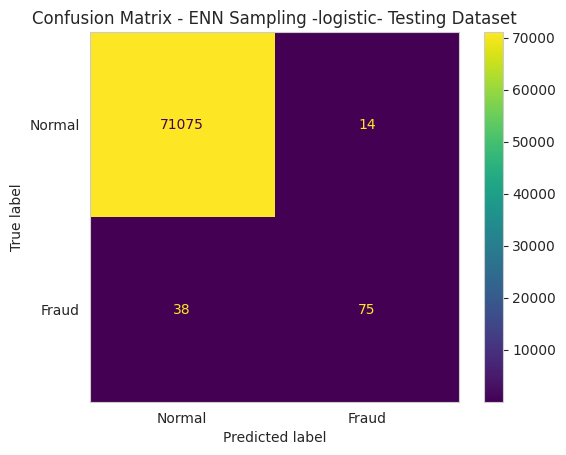

In [ ]:
confusion_matrix_enn_logistic = confusion_matrix(y_test_enn,test_pred_enn_logistic)

cm_display_enn_logistic = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_enn_logistic, display_labels = ['Normal', 'Fraud'])

cm_display_enn_logistic.plot()
plt.title("Confusion Matrix - ENN Sampling -logistic- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

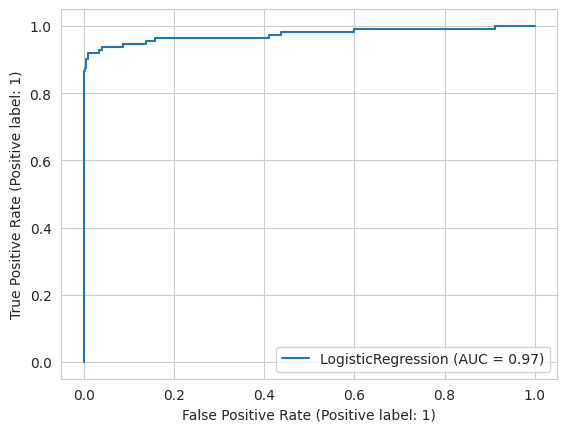

In [ ]:
Roc_display_enn_logistic = RocCurveDisplay.from_estimator(Logistic_Regression_enn,X_test_enn,y_test_enn)

Class wise Accuracy

In [ ]:
pred_enn_test_logistic = pd.DataFrame(y_test_enn)
pred_enn_test_logistic['predicted'] = test_pred_enn_logistic

pred_enn_test_logistic

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_enn_test_cls0_logistic = pred_enn_test_logistic[pred_enn_test_logistic['Class'] == 0]
pred_enn_test_cls1_logistic = pred_enn_test_logistic[pred_enn_test_logistic['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_enn_logistic = accuracy_score(pred_enn_test_cls0_logistic['Class'],pred_enn_test_cls0_logistic['predicted'])
test_precision_class0_enn_logistic = precision_score(pred_enn_test_cls0_logistic['Class'],pred_enn_test_cls0_logistic['predicted'])
test_recall_class0_enn_logistic = recall_score(pred_enn_test_cls0_logistic['Class'],pred_enn_test_cls0_logistic['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_enn_logistic*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_enn_logistic*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_enn_logistic*100,2)," %")


Accuracy of Class 0:  99.98  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_enn_logistic = accuracy_score(pred_enn_test_cls1_logistic['Class'],pred_enn_test_cls1_logistic['predicted'])
test_precision_class1_enn_logistic = precision_score(pred_enn_test_cls1_logistic['Class'],pred_enn_test_cls1_logistic['predicted'])
test_recall_class1_enn_logistic = recall_score(pred_enn_test_cls1_logistic['Class'],pred_enn_test_cls1_logistic['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_enn_logistic*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_enn_logistic*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_enn_logistic*100,2)," %")


Accuracy of Class 1:  66.37  %
precision of Class 1:  100.0  %
recall of Class 1:  66.37  %


#### Random Forest Classifier

In [ ]:
Random_Forest_enn = RandomForestClassifier()

Training Dataset

In [ ]:
Random_Forest_enn.fit(X_train_enn_resampled,y_train_enn_resampled)

RandomForestClassifier()

#####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_enn_RF = Random_Forest_enn.predict(X_train_enn_resampled)
train_accuracy_enn_RF = accuracy_score(y_train_enn_resampled,train_pred_enn_RF)
train_precision_enn_RF = precision_score(y_train_enn_resampled,train_pred_enn_RF)
train_recall_enn_RF = recall_score(y_train_enn_resampled,train_pred_enn_RF)


print("Accuracy on Training Data is: ",round(train_accuracy_enn_RF*100,2)," %")
print("precision on Training Data is: ",round(train_precision_enn_RF*100,2)," %")
print("recall on Training Data is: ",round(train_recall_enn_RF*100,2)," %")


Accuracy on Training Data is:  100.0  %
precision on Training Data is:  100.0  %
recall on Training Data is:  99.74  %


Classwise Accuracy

In [ ]:
pred_enn_train_RF = pd.DataFrame(y_train_enn_resampled)
pred_enn_train_RF['predicted'] = train_pred_enn_RF
pred_enn_train_RF

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
213450      1          1
213451      1          1
213452      1          1
213453      1          1
213454      1          1

[213455 rows x 2 columns]

In [ ]:
pred_enn_train_cls0_RF = pred_enn_train_RF[pred_enn_train_RF['Class'] == 0]
pred_enn_train_cls1_RF = pred_enn_train_RF[pred_enn_train_RF['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_enn_class0_RF = accuracy_score(pred_enn_train_cls0_RF['Class'],pred_enn_train_cls0_RF['predicted'])
train_precision_enn_class0_RF = precision_score(pred_enn_train_cls0_RF['Class'],pred_enn_train_cls0_RF['predicted'])
train_recall_enn_class0_RF = recall_score(pred_enn_train_cls0_RF['Class'],pred_enn_train_cls0_RF['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_enn_class0_RF*100,2)," %")
print("precision of Class 0: ",round(train_precision_enn_class0_RF*100,2)," %")
print("recall of Class 0: ",round(train_recall_enn_class0_RF*100,2)," %")


Accuracy of Class 0:  100.0  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_enn_class1_RF = accuracy_score(pred_enn_train_cls1_RF['Class'],pred_enn_train_cls1_RF['predicted'])
train_precision_enn_class1_RF = precision_score(pred_enn_train_cls1_RF['Class'],pred_enn_train_cls1_RF['predicted'])
train_recall_enn_class1_RF = recall_score(pred_enn_train_cls1_RF['Class'],pred_enn_train_cls1_RF['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_enn_class1_RF*100,2)," %")
print("precision of Class 1: ",round(train_precision_enn_class1_RF*100,2)," %")
print("recall of Class 1: ",round(train_recall_enn_class1_RF*100,2)," %")


Accuracy of Class 1:  99.74  %
precision of Class 1:  100.0  %
recall of Class 1:  99.74  %


On Testing Data

In [ ]:
test_pred_enn_RF = Random_Forest_enn.predict(X_test_enn)
test_accuracy1_enn_RF = accuracy_score(y_test_enn,test_pred_enn_RF)
test_precision1_enn_RF = precision_score(y_test_enn,test_pred_enn_RF)
test_recall1_enn_RF = recall_score(y_test_enn,test_pred_enn_RF)


print("Accuracy on Testing Data is: ",round(test_accuracy1_enn_RF*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_enn_RF*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_enn_RF*100,2)," %")


Accuracy on Testing Data is:  99.94  %
precision on Testing Data is:  79.31  %
precision on Testing Data is:  79.31  %


Confusion Matrix

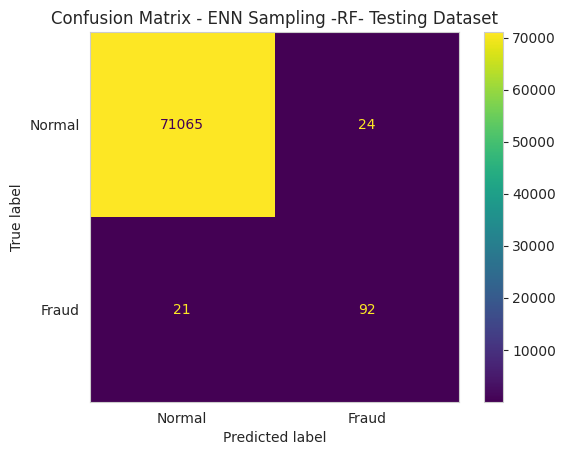

In [ ]:
confusion_matrix_enn_RF = confusion_matrix(y_test_enn,test_pred_enn_RF)

cm_display_enn_RF = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_enn_RF, display_labels = ['Normal', 'Fraud'])

cm_display_enn_RF.plot()
plt.title("Confusion Matrix - ENN Sampling -RF- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

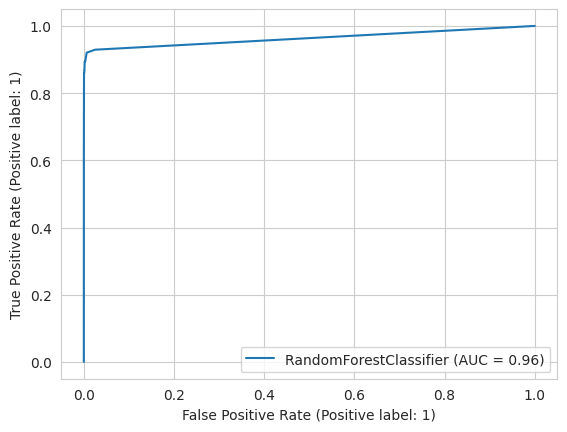

In [ ]:
Roc_display_enn_RF = RocCurveDisplay.from_estimator(Random_Forest_enn,X_test_enn,y_test_enn)

Class wise Accuracy

In [ ]:
pred_enn_test_RF = pd.DataFrame(y_test_enn)
pred_enn_test_RF['predicted'] = test_pred_enn_RF

pred_enn_test_RF

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_enn_test_cls0_RF = pred_enn_test_RF[pred_enn_test_RF['Class'] == 0]
pred_enn_test_cls1_RF = pred_enn_test_RF[pred_enn_test_RF['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_enn_RF = accuracy_score(pred_enn_test_cls0_RF['Class'],pred_enn_test_cls0_RF['predicted'])
test_precision_class0_enn_RF = precision_score(pred_enn_test_cls0_RF['Class'],pred_enn_test_cls0_RF['predicted'])
test_recall_class0_enn_RF = recall_score(pred_enn_test_cls0_RF['Class'],pred_enn_test_cls0_RF['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_enn_RF*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_enn_RF*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_enn_RF*100,2)," %")


Accuracy of Class 0:  99.97  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_enn_RF = accuracy_score(pred_enn_test_cls1_RF['Class'],pred_enn_test_cls1_RF['predicted'])
test_precision_class1_enn_RF = precision_score(pred_enn_test_cls1_RF['Class'],pred_enn_test_cls1_RF['predicted'])
test_recall_class1_enn_RF = recall_score(pred_enn_test_cls1_RF['Class'],pred_enn_test_cls1_RF['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_enn_RF*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_enn_RF*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_enn_RF*100,2)," %")


Accuracy of Class 1:  81.42  %
precision of Class 1:  100.0  %
recall of Class 1:  81.42  %


#### Xtreme Gradient Boosting Classifier (XGBClassifier) 

In [ ]:
import xgboost as xgb

In [ ]:
xgb_enn = xgb.XGBClassifier(objective="binary:logistic")

Training Dataset

In [ ]:
xgb_enn.fit(X_train_enn_resampled,y_train_enn_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

##### Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_enn_xgb = xgb_enn.predict(X_train_enn_resampled)
train_accuracy_enn_xgb = accuracy_score(y_train_enn_resampled,train_pred_enn_xgb)
train_precision_enn_xgb = precision_score(y_train_enn_resampled,train_pred_enn_xgb)
train_recall_enn_xgb = recall_score(y_train_enn_resampled,train_pred_enn_xgb)


print("Accuracy on Training Data is: ",round(train_accuracy_enn_xgb*100,2)," %")
print("precision on Training Data is: ",round(train_precision_enn_xgb*100,2)," %")
print("recall on Training Data is: ",round(train_recall_enn_xgb*100,2)," %")


Accuracy on Training Data is:  100.0  %
precision on Training Data is:  100.0  %
recall on Training Data is:  100.0  %


Classwise Accuracy

In [ ]:
pred_enn_train_xgb = pd.DataFrame(y_train_enn_resampled)
pred_enn_train_xgb['predicted'] = train_pred_enn_xgb
pred_enn_train_xgb

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
213450      1          1
213451      1          1
213452      1          1
213453      1          1
213454      1          1

[213455 rows x 2 columns]

In [ ]:
pred_enn_train_cls0_xgb = pred_enn_train_xgb[pred_enn_train_xgb['Class'] == 0]
pred_enn_train_cls1_xgb = pred_enn_train_xgb[pred_enn_train_xgb['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_enn_class0_xgb = accuracy_score(pred_enn_train_cls0_xgb['Class'],pred_enn_train_cls0_xgb['predicted'])
train_precision_enn_class0_xgb = precision_score(pred_enn_train_cls0_xgb['Class'],pred_enn_train_cls0_xgb['predicted'])
train_recall_enn_class0_xgb = recall_score(pred_enn_train_cls0_xgb['Class'],pred_enn_train_cls0_xgb['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_enn_class0_xgb*100,2)," %")
print("precision of Class 0: ",round(train_precision_enn_class0_xgb*100,2)," %")
print("recall of Class 0: ",round(train_recall_enn_class0_xgb*100,2)," %")


Accuracy of Class 0:  100.0  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_enn_class1_xgb = accuracy_score(pred_enn_train_cls1_xgb['Class'],pred_enn_train_cls1_xgb['predicted'])
train_precision_enn_class1_xgb = precision_score(pred_enn_train_cls1_xgb['Class'],pred_enn_train_cls1_xgb['predicted'])
train_recall_enn_class1_xgb = recall_score(pred_enn_train_cls1_xgb['Class'],pred_enn_train_cls1_xgb['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_enn_class1_xgb*100,2)," %")
print("precision of Class 1: ",round(train_precision_enn_class1_xgb*100,2)," %")
print("recall of Class 1: ",round(train_recall_enn_class1_xgb*100,2)," %")


Accuracy of Class 1:  100.0  %
precision of Class 1:  100.0  %
recall of Class 1:  100.0  %


On Testing Data

In [ ]:
test_pred_enn_xgb = xgb_enn.predict(X_test_enn)
test_accuracy1_enn_xgb = accuracy_score(y_test_enn,test_pred_enn_xgb)
test_precision1_enn_xgb = precision_score(y_test_enn,test_pred_enn_xgb)
test_recall1_enn_xgb = recall_score(y_test_enn,test_pred_enn_xgb)


print("Accuracy on Testing Data is: ",round(test_accuracy1_enn_xgb*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_enn_xgb*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_enn_xgb*100,2)," %")


Accuracy on Testing Data is:  99.94  %
precision on Testing Data is:  81.74  %
recall on Testing Data is:  83.19  %


Confusion Matrix

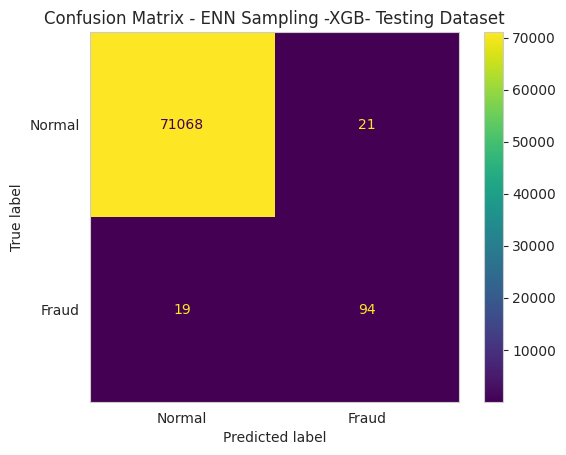

In [ ]:
confusion_matrix_enn_xgb = confusion_matrix(y_test_enn,test_pred_enn_xgb)

cm_display_enn_xgb = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_enn_xgb, display_labels = ['Normal', 'Fraud'])

cm_display_enn_xgb.plot()
plt.title("Confusion Matrix - ENN Sampling -XGB- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

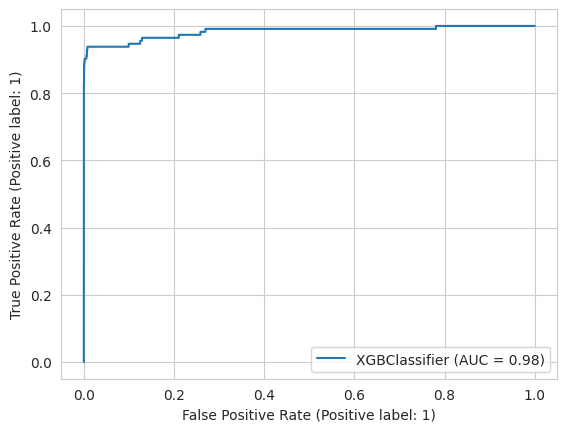

In [ ]:
Roc_display_enn_xgb = RocCurveDisplay.from_estimator(xgb_enn,X_test_enn,y_test_enn)

Class wise Accuracy

In [ ]:
pred_enn_test_xgb = pd.DataFrame(y_test_enn)
pred_enn_test_xgb['predicted'] = test_pred_enn_xgb

pred_enn_test_xgb

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_enn_test_cls0_xgb = pred_enn_test_xgb[pred_enn_test_xgb['Class'] == 0]
pred_enn_test_cls1_xgb = pred_enn_test_xgb[pred_enn_test_xgb['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_enn_xgb = accuracy_score(pred_enn_test_cls0_xgb['Class'],pred_enn_test_cls0_xgb['predicted'])
test_precision_class0_enn_xgb = precision_score(pred_enn_test_cls0_xgb['Class'],pred_enn_test_cls0_xgb['predicted'])
test_recall_class0_enn_xgb = recall_score(pred_enn_test_cls0_xgb['Class'],pred_enn_test_cls0_xgb['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_enn_xgb*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_enn_xgb*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_enn_xgb*100,2)," %")


Accuracy of Class 0:  99.97  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_enn_xgb = accuracy_score(pred_enn_test_cls1_xgb['Class'],pred_enn_test_cls1_xgb['predicted'])
test_precision_class1_enn_xgb = precision_score(pred_enn_test_cls1_xgb['Class'],pred_enn_test_cls1_xgb['predicted'])
test_recall_class1_enn_xgb = recall_score(pred_enn_test_cls1_xgb['Class'],pred_enn_test_cls1_xgb['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_enn_xgb*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_enn_xgb*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_enn_xgb*100,2)," %")


Accuracy of Class 1:  83.19  %
precision of Class 1:  100.0  %
recall of Class 1:  83.19  %


#### Support Vector Machine Classifier





In [ ]:
svc_enn = SVC()

Training Dataset

In [ ]:
svc_enn.fit(X_train_enn_resampled,y_train_enn_resampled)

SVC()

#####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_enn_svc = svc_enn.predict(X_train_enn_resampled)
train_accuracy_enn_svc = accuracy_score(y_train_enn_resampled,train_pred_enn_svc)
train_precision_enn_svc = precision_score(y_train_enn_resampled,train_pred_enn_svc)
train_recall_enn_svc = recall_score(y_train_enn_resampled,train_pred_enn_svc)

print("Accuracy on Training Data is: ",round(train_accuracy_enn_svc*100,2)," %")
print("precision on Training Data is: ",round(train_precision_enn_svc*100,2)," %")
print("recall on Training Data is: ",round(train_recall_enn_svc*100,2)," %")

Accuracy on Training Data is:  99.96  %
precision on Training Data is:  99.03  %
recall on Training Data is:  80.47  %


Classwise Accuracy

In [ ]:
pred_enn_train_svc = pd.DataFrame(y_train_enn_resampled)
pred_enn_train_svc['predicted'] = train_pred_enn_svc
pred_enn_train_svc

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
213450      1          1
213451      1          1
213452      1          0
213453      1          1
213454      1          1

[213455 rows x 2 columns]

In [ ]:
pred_enn_train_cls0_svc = pred_enn_train_svc[pred_enn_train_svc['Class'] == 0]
pred_enn_train_cls1_svc = pred_enn_train_svc[pred_enn_train_svc['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_enn_class0_svc = accuracy_score(pred_enn_train_cls0_svc['Class'],pred_enn_train_cls0_svc['predicted'])
train_precision_enn_class0_svc = precision_score(pred_enn_train_cls0_svc['Class'],pred_enn_train_cls0_svc['predicted'])
train_recall_enn_class0_svc = recall_score(pred_enn_train_cls0_svc['Class'],pred_enn_train_cls0_svc['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_enn_class0_svc*100,2)," %")
print("precision of Class 0: ",round(train_precision_enn_class0_svc*100,2)," %")
print("recall of Class 0: ",round(train_recall_enn_class0_svc*100,2)," %")

Accuracy of Class 0:  100.0  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_enn_class1_svc = accuracy_score(pred_enn_train_cls1_svc['Class'],pred_enn_train_cls1_svc['predicted'])
train_precision_enn_class1_svc = precision_score(pred_enn_train_cls1_svc['Class'],pred_enn_train_cls1_svc['predicted'])
train_recall_enn_class1_svc = recall_score(pred_enn_train_cls1_svc['Class'],pred_enn_train_cls1_svc['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_enn_class1_svc*100,2)," %")
print("precision of Class 1: ",round(train_precision_enn_class1_svc*100,2)," %")
print("recall of Class 1: ",round(train_recall_enn_class1_svc*100,2)," %")


Accuracy of Class 1:  80.47  %
precision of Class 1:  100.0  %
recall of Class 1:  80.47  %


On Testing Data

In [ ]:
test_pred_enn_svc = svc_enn.predict(X_test_enn)
test_accuracy1_enn_svc = accuracy_score(y_test_enn,test_pred_enn_svc)
test_precision1_enn_svc = precision_score(y_test_enn,test_pred_enn_svc)
test_recall1_enn_svc = recall_score(y_test_enn,test_pred_enn_svc)


print("Accuracy on Testing Data is: ",round(test_accuracy1_enn_svc*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_enn_svc*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_enn_svc*100,2)," %")


Accuracy on Testing Data is:  99.93  %
precision on Testing Data is:  81.0  %
recall on Testing Data is:  71.68  %


Confusion Matrix

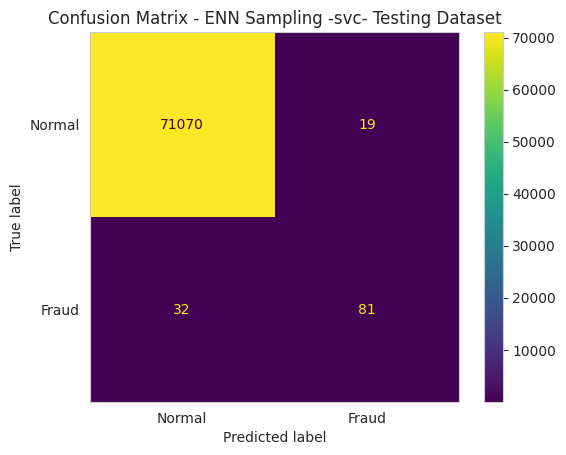

In [ ]:
confusion_matrix_enn_svc = confusion_matrix(y_test_enn,test_pred_enn_svc)

cm_display_enn_svc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_enn_svc, display_labels = ['Normal', 'Fraud'])

cm_display_enn_svc.plot()
plt.title("Confusion Matrix - ENN Sampling -svc- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

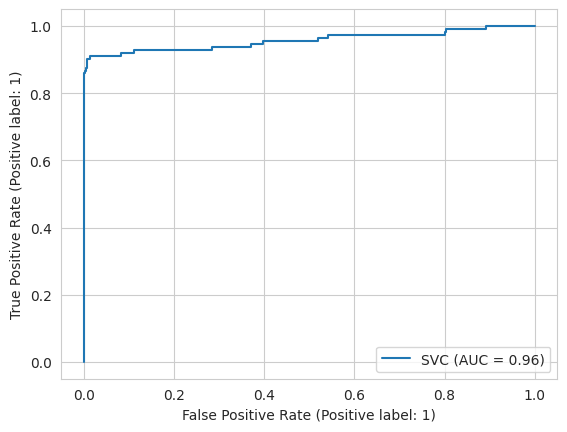

In [ ]:
Roc_display_enn_svc = RocCurveDisplay.from_estimator(svc_enn,X_test_enn,y_test_enn)

Class wise Accuracy

In [ ]:
pred_enn_test_svc = pd.DataFrame(y_test_enn)
pred_enn_test_svc['predicted'] = test_pred_enn_svc

pred_enn_test_svc

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_enn_test_cls0_svc = pred_enn_test_svc[pred_enn_test_svc['Class'] == 0]
pred_enn_test_cls1_svc = pred_enn_test_svc[pred_enn_test_svc['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_enn_svc = accuracy_score(pred_enn_test_cls0_svc['Class'],pred_enn_test_cls0_svc['predicted'])
test_precision_class0_enn_svc = precision_score(pred_enn_test_cls0_svc['Class'],pred_enn_test_cls0_svc['predicted'])
test_recall_class0_enn_svc = recall_score(pred_enn_test_cls0_svc['Class'],pred_enn_test_cls0_svc['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_enn_svc*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_enn_svc*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_enn_svc*100,2)," %")


Accuracy of Class 0:  99.97  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_enn_svc = accuracy_score(pred_enn_test_cls1_svc['Class'],pred_enn_test_cls1_svc['predicted'])
test_precision_class1_enn_svc = precision_score(pred_enn_test_cls1_svc['Class'],pred_enn_test_cls1_svc['predicted'])
test_recall_class1_enn_svc = recall_score(pred_enn_test_cls1_svc['Class'],pred_enn_test_cls1_svc['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_enn_svc*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_enn_svc*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_enn_svc*100,2)," %")


Accuracy of Class 1:  71.68  %
precision of Class 1:  100.0  %
recall of Class 1:  71.68  %


### Evaluation graphs

In [ ]:
Model = ["Logistic Regression","Random Forest","XGB Classifier","SVM Classifier"]

Accuracy Graph

In [ ]:
Acc_enn_train_cls0 = [train_accuracy_enn_class0_logistic,train_accuracy_enn_class0_RF,train_accuracy_enn_class0_xgb,train_accuracy_enn_class0_svc]
Acc_enn_test_cls0 = [test_accuracy_class0_enn_logistic,test_accuracy_class0_enn_RF,test_accuracy_class0_enn_xgb,test_accuracy_class0_enn_svc]
Acc_enn_train_cls1 = [train_accuracy_enn_class1_logistic,train_accuracy_enn_class1_RF,train_accuracy_enn_class1_xgb,train_accuracy_enn_class1_svc]
Acc_enn_test_cls1 = [test_accuracy_class1_enn_logistic,test_accuracy_class1_enn_RF,test_accuracy_class1_enn_xgb,test_accuracy_class1_enn_svc]

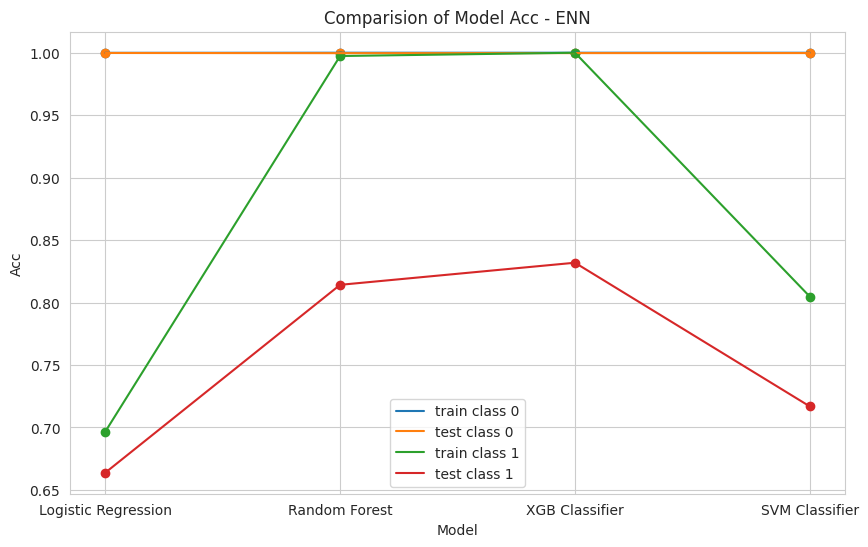

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Acc_enn_train_cls0, label = "train class 0")
plt.scatter(Model,Acc_enn_train_cls0)

plt.plot(Model,Acc_enn_test_cls0, label = "test class 0")
plt.scatter(Model,Acc_enn_test_cls0)

plt.plot(Model,Acc_enn_train_cls1, label = "train class 1")
plt.scatter(Model,Acc_enn_train_cls1)

plt.plot(Model,Acc_enn_test_cls1, label = "test class 1")
plt.scatter(Model,Acc_enn_test_cls1)

plt.ylabel("Acc")
plt.xlabel("Model")
plt.title("Comparision of Model Acc - ENN")
plt.legend()
plt.show()

Precision Graph

In [ ]:
Pre_enn_train_cls0 = [train_precision_enn_class0_logistic,train_precision_enn_class0_RF,train_precision_enn_class0_xgb,train_precision_enn_class0_svc]
Pre_enn_test_cls0 = [test_precision_class0_enn_logistic,test_precision_class0_enn_RF,test_precision_class0_enn_xgb,test_precision_class0_enn_svc]
Pre_enn_train_cls1 = [train_precision_enn_class1_logistic,train_precision_enn_class1_RF,train_precision_enn_class1_xgb,train_precision_enn_class1_svc]
Pre_enn_test_cls1 = [test_precision_class1_enn_logistic,test_precision_class1_enn_RF,test_precision_class1_enn_xgb,test_precision_class1_enn_svc]

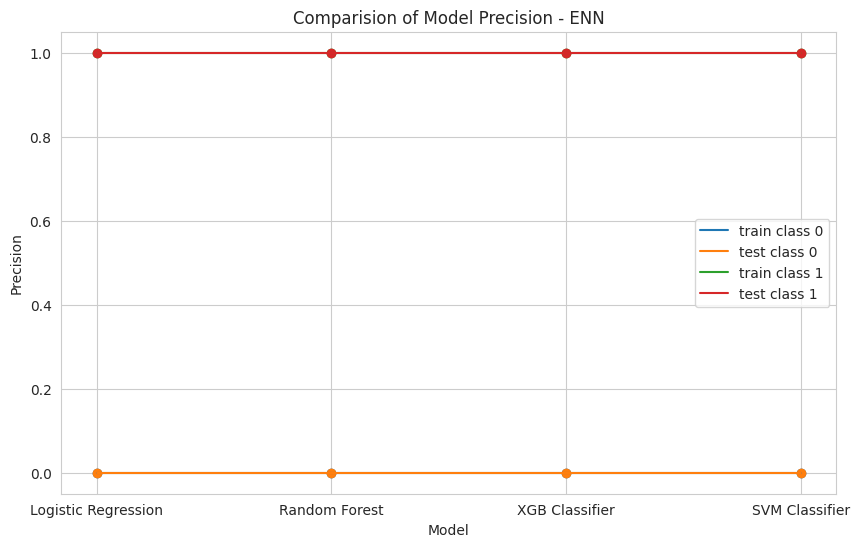

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Pre_enn_train_cls0, label = "train class 0")
plt.scatter(Model,Pre_enn_train_cls0)

plt.plot(Model,Pre_enn_test_cls0, label = "test class 0")
plt.scatter(Model,Pre_enn_test_cls0)

plt.plot(Model,Pre_enn_train_cls1, label = "train class 1")
plt.scatter(Model,Pre_enn_train_cls1)

plt.plot(Model,Pre_enn_test_cls1, label = "test class 1")
plt.scatter(Model,Pre_enn_test_cls1)

plt.ylabel("Precision")
plt.xlabel("Model")
plt.title("Comparision of Model Precision - ENN")
plt.legend()
plt.show()

Recall Graph

In [ ]:
Recall_enn_train_cls0 = [train_recall_enn_class0_logistic,train_recall_enn_class0_RF,train_recall_enn_class0_xgb,train_recall_enn_class0_svc]
Recall_enn_test_cls0 = [test_recall_class0_enn_logistic,test_recall_class0_enn_RF,test_recall_class0_enn_xgb,test_recall_class0_enn_svc]
Recall_enn_train_cls1 = [train_recall_enn_class1_logistic,train_recall_enn_class1_RF,train_recall_enn_class1_xgb,train_recall_enn_class1_svc]
Recall_enn_test_cls1 = [test_recall_class1_enn_logistic,test_recall_class1_enn_RF,test_recall_class1_enn_xgb,test_recall_class1_enn_svc]

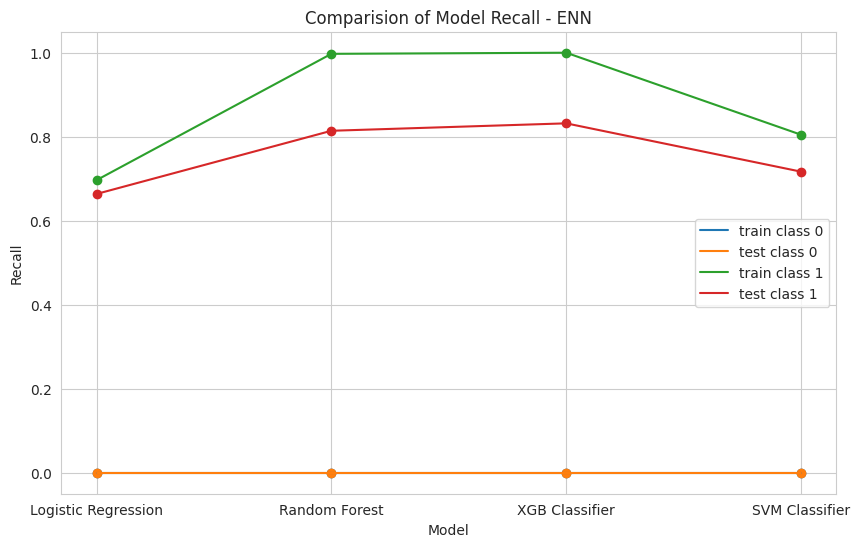

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Recall_enn_train_cls0, label = "train class 0")
plt.scatter(Model,Recall_enn_train_cls0)

plt.plot(Model,Recall_enn_test_cls0, label = "test class 0")
plt.scatter(Model,Recall_enn_test_cls0)

plt.plot(Model,Recall_enn_train_cls1, label = "train class 1")
plt.scatter(Model,Recall_enn_train_cls1)

plt.plot(Model,Recall_enn_test_cls1, label = "test class 1")
plt.scatter(Model,Recall_enn_test_cls1)

plt.ylabel("Recall")
plt.xlabel("Model")
plt.title("Comparision of Model Recall - ENN")
plt.legend()
plt.show()

# Over Sampling

## Random Over-Sampling

In [ ]:
X_over = credit_df.drop("Class", axis="columns")
y_over = credit_df["Class"]

###Spliting into Train and Test Data

In [ ]:
X_train_over,X_test_over,y_train_over,y_test_over = train_test_split(X_over, y_over , test_size = 0.25,random_state = 42)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
over = RandomOverSampler(random_state = 42 )
X_train_over_resampled, y_train_over_resampled = over.fit_resample(X_train_over, y_train_over)

In [ ]:
X_train_over_resampled

Amount_Scaled  Time_Scaled         V1         V2         V3  \
0            0.229442    -0.293131  -1.648591   1.228130   1.370169   
1            0.547754    -0.458699  -0.234775  -0.493269   1.236728   
2            1.242926    -0.623985   1.134626  -0.774460  -0.163390   
3           -0.167680    -0.049777   0.069514   1.017753   1.033117   
4            0.000000    -0.533253  -0.199441   0.610092  -0.114437   
...               ...          ...        ...        ...        ...   
426447      -0.292042     0.762344  -4.280584   1.421100  -3.908229   
426448      -0.201355     0.210682  -4.221221   2.871121  -5.888716   
426449      -0.293440    -0.743348 -17.467710  10.114816 -24.202142   
426450       0.164326     0.116695   1.707857   0.024881  -0.488140   
426451      -0.178719     0.047522   1.917827   0.951967  -2.059206   

               V4         V5        V6         V7        V8  ...       V19  \
0       -1.735542  -0.029455 -0.484129   0.918645 -0.438750  ... -0.331603   
1       -2.338793  -1.176733  0.885733  -1.960981 -2.363412  ... -1.635634   
2       -0.533358  -0.604555 -0.244482  -0.212682  0.040782  ... -0.519459   
3        1.384376   0.223233 -0.310845   0.597287 -0.127658  ...  1.561447   
4        0.256565   2.290752  4.008475  -0.123530  1.038374  ...  1.375281   
...           ...        ...       ...        ...       ...  ...       ...   
426447   2.942946  -0.076205 -2.002526  -2.874155 -0.856005  ...  0.685511   
426448   6.890952  -3.404894 -1.154394  -7.739928  2.851363  ...  0.510570   
426449  11.805469 -10.198046 -2.579938 -17.656788  2.256902  ...  0.550519   
426450   3.787548   1.139451  2.914673  -0.743358  0.699136  ... -1.912563   
426451   3.833998   1.668192  0.769826   0.232463  0.107941  ... -1.150627   

             V20       V21       V22       V23       V24       V25       V26  \
0       0.384201 -0.218076 -0.203458 -0.213015  0.011372 -0.304481  0.632063   
1       0.364679 -1.495358 -0.083066  0.074612 -0.347329  0.541900 -0.433294   
2      -0.396476 -0.684454 -1.855269  0.171997 -0.387783 -0.062985  0.245118   
3       0.148760  0.097023  0.369957 -0.219266 -0.124941 -0.049749 -0.112946   
4       0.292972 -0.019733  0.165463 -0.080978  1.020656 -0.300730 -0.269595   
...          ...       ...       ...       ...       ...       ...       ...   
426447 -0.198963 -0.140062 -0.907720 -0.680108 -0.349170  0.056276 -1.149923   
426448 -0.227882  1.620591  1.567947 -0.578007 -0.059045 -1.829169 -0.072429   
426449  1.001519 -2.328024  0.940830  1.296817 -1.055104  0.111792  0.679695   
426450 -0.368014  0.010865  0.548258  0.091218 -1.007959 -0.082183  0.179709   
426451 -0.115922  0.015255  0.239994 -0.111916 -0.380576  0.370995  0.189117   

             V27       V28  
0      -0.262968 -0.099863  
1       0.089293  0.212029  
2      -0.061178  0.012180  
3       0.114440  0.066101  
4       0.481769  0.254114  
...          ...       ...  
426447 -1.809886  0.723051  
426448  0.136734 -0.599848  
426449  2.093541 -1.425491  
426450  0.007738 -0.068841  
426451 -0.005823 -0.012105  

[426452 rows x 30 columns]

In [ ]:
y_train_over.value_counts()

0    213226
1       379
Name: Class, dtype: int64

###Model Training

####Logistic Regression Model

In [ ]:
Logistic_Regression_over = LogisticRegression()

Training Dataset

In [ ]:
Logistic_Regression_over.fit(X_train_over_resampled,y_train_over_resampled)

LogisticRegression()

#####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_over_logistic = Logistic_Regression_over.predict(X_train_over_resampled)
train_accuracy_over_logistic = accuracy_score(y_train_over_resampled,train_pred_over_logistic)
train_precision_over_logistic = precision_score(y_train_over_resampled,train_pred_over_logistic)
train_recall_over_logistic = recall_score(y_train_over_resampled,train_pred_over_logistic)

print("Accuracy on Training Data is: ",round(train_accuracy_over_logistic*100,2)," %")
print("precision on Training Data is: ",round(train_precision_over_logistic*100,2)," %")
print("recall on Training Data is: ",round(train_recall_over_logistic*100,2)," %")

Accuracy on Training Data is:  94.72  %
precision on Training Data is:  97.47  %
recall on Training Data is:  91.82  %


Classwise Accuracy

In [ ]:
pred_over_train_logistic = pd.DataFrame(y_train_over_resampled)
pred_over_train_logistic['predicted'] = train_pred_over_logistic
pred_over_train_logistic

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
426447      1          1
426448      1          1
426449      1          1
426450      1          0
426451      1          1

[426452 rows x 2 columns]

In [ ]:
pred_over_train_cls0_logistic = pred_over_train_logistic[pred_over_train_logistic['Class'] == 0]
pred_over_train_cls1_logistic = pred_over_train_logistic[pred_over_train_logistic['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_over_class0_logistic = accuracy_score(pred_over_train_cls0_logistic['Class'],pred_over_train_cls0_logistic['predicted'])
train_precision_over_class0_logistic = precision_score(pred_over_train_cls0_logistic['Class'],pred_over_train_cls0_logistic['predicted'])
train_recall_over_class0_logistic = recall_score(pred_over_train_cls0_logistic['Class'],pred_over_train_cls0_logistic['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_over_class0_logistic*100,2)," %")
print("precision of Class 0: ",round(train_precision_over_class0_logistic*100,2)," %")
print("recall of Class 0: ",round(train_recall_over_class0_logistic*100,2)," %")

Accuracy of Class 0:  97.61  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_over_class1_logistic = accuracy_score(pred_over_train_cls1_logistic['Class'],pred_over_train_cls1_logistic['predicted'])
train_precision_over_class1_logistic = precision_score(pred_over_train_cls1_logistic['Class'],pred_over_train_cls1_logistic['predicted'])
train_recall_over_class1_logistic = recall_score(pred_over_train_cls1_logistic['Class'],pred_over_train_cls1_logistic['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_over_class1_logistic*100,2)," %")
print("precision of Class 1: ",round(train_precision_over_class1_logistic*100,2)," %")
print("recall of Class 1: ",round(train_recall_over_class1_logistic*100,2)," %")


Accuracy of Class 1:  91.82  %
precision of Class 1:  100.0  %
recall of Class 1:  91.82  %


On Testing Data

In [ ]:
test_pred_over_logistic = Logistic_Regression_over.predict(X_test_over)
test_accuracy1_over_logistic = accuracy_score(y_test_over,test_pred_over_logistic)
test_precision1_over_logistic = precision_score(y_test_over,test_pred_over_logistic)
test_recall1_over_logistic = recall_score(y_test_over,test_pred_over_logistic)


print("Accuracy on Testing Data is: ",round(test_accuracy1_over_logistic*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_over_logistic*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_over_logistic*100,2)," %")


Accuracy on Testing Data is:  97.57  %
precision on Testing Data is:  5.69  %
recall on Testing Data is:  92.04  %


Confusion Matrix

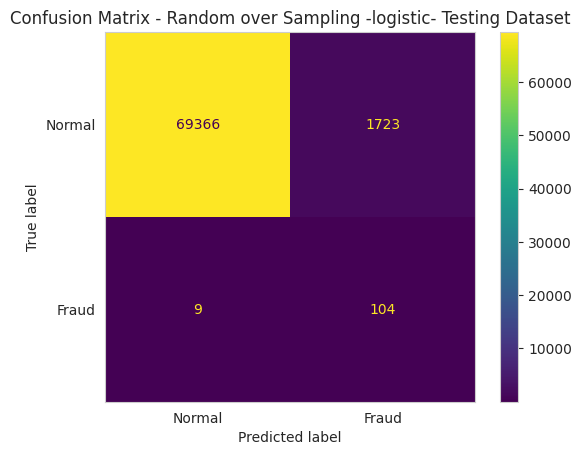

In [ ]:
confusion_matrix_over_logistic = confusion_matrix(y_test_over,test_pred_over_logistic)

cm_display_over_logistic = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_over_logistic, display_labels = ['Normal', 'Fraud'])

cm_display_over_logistic.plot()
plt.title("Confusion Matrix - Random over Sampling -logistic- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

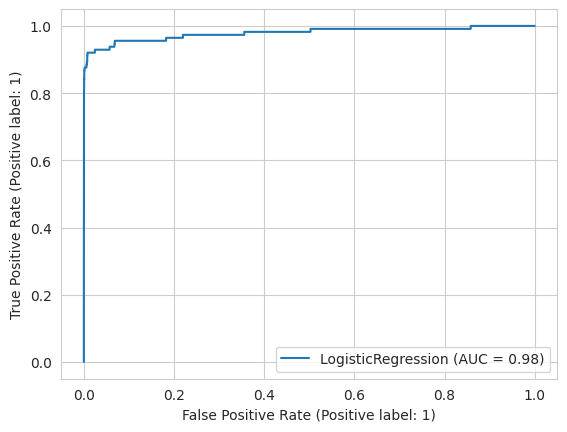

In [ ]:
Roc_display_over_logistic = RocCurveDisplay.from_estimator(Logistic_Regression_over,X_test_over,y_test_over)

Class wise Accuracy

In [ ]:
pred_over_test_logistic = pd.DataFrame(y_test_over)
pred_over_test_logistic['predicted'] = test_pred_over_logistic

pred_over_test_logistic

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_over_test_cls0_logistic = pred_over_test_logistic[pred_over_test_logistic['Class'] == 0]
pred_over_test_cls1_logistic = pred_over_test_logistic[pred_over_test_logistic['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_over_logistic = accuracy_score(pred_over_test_cls0_logistic['Class'],pred_over_test_cls0_logistic['predicted'])
test_precision_class0_over_logistic = precision_score(pred_over_test_cls0_logistic['Class'],pred_over_test_cls0_logistic['predicted'])
test_recall_class0_over_logistic = recall_score(pred_over_test_cls0_logistic['Class'],pred_over_test_cls0_logistic['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_over_logistic*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_over_logistic*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_over_logistic*100,2)," %")


Accuracy of Class 0:  97.58  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_over_logistic = accuracy_score(pred_over_test_cls1_logistic['Class'],pred_over_test_cls1_logistic['predicted'])
test_precision_class1_over_logistic = precision_score(pred_over_test_cls1_logistic['Class'],pred_over_test_cls1_logistic['predicted'])
test_recall_class1_over_logistic = recall_score(pred_over_test_cls1_logistic['Class'],pred_over_test_cls1_logistic['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_over_logistic*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_over_logistic*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_over_logistic*100,2)," %")


Accuracy of Class 1:  92.04  %
precision of Class 1:  100.0  %
recall of Class 1:  92.04  %


#### Random Forest Classifier

In [ ]:
Random_Forest_over = RandomForestClassifier()

Training Dataset

In [ ]:
Random_Forest_over.fit(X_train_over_resampled,y_train_over_resampled)

RandomForestClassifier()

#####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_over_RF = Random_Forest_over.predict(X_train_over_resampled)
train_accuracy_over_RF = accuracy_score(y_train_over_resampled,train_pred_over_RF)
train_precision_over_RF = precision_score(y_train_over_resampled,train_pred_over_RF)
train_recall_over_RF = recall_score(y_train_over_resampled,train_pred_over_RF)


print("Accuracy on Training Data is: ",round(train_accuracy_over_RF*100,2)," %")
print("precision on Training Data is: ",round(train_precision_over_RF*100,2)," %")
print("recall on Training Data is: ",round(train_recall_over_RF*100,2)," %")


Accuracy on Training Data is:  100.0  %
precision on Training Data is:  100.0  %
recall on Training Data is:  100.0  %


Classwise Accuracy

In [ ]:
pred_over_train_RF = pd.DataFrame(y_train_over_resampled)
pred_over_train_RF['predicted'] = train_pred_over_RF
pred_over_train_RF

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
426447      1          1
426448      1          1
426449      1          1
426450      1          1
426451      1          1

[426452 rows x 2 columns]

In [ ]:
pred_over_train_cls0_RF = pred_over_train_RF[pred_over_train_RF['Class'] == 0]
pred_over_train_cls1_RF = pred_over_train_RF[pred_over_train_RF['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_over_class0_RF = accuracy_score(pred_over_train_cls0_RF['Class'],pred_over_train_cls0_RF['predicted'])
train_precision_over_class0_RF = precision_score(pred_over_train_cls0_RF['Class'],pred_over_train_cls0_RF['predicted'])
train_recall_over_class0_RF = recall_score(pred_over_train_cls0_RF['Class'],pred_over_train_cls0_RF['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_over_class0_RF*100,2)," %")
print("precision of Class 0: ",round(train_precision_over_class0_RF*100,2)," %")
print("recall of Class 0: ",round(train_recall_over_class0_RF*100,2)," %")


Accuracy of Class 0:  100.0  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_over_class1_RF = accuracy_score(pred_over_train_cls1_RF['Class'],pred_over_train_cls1_RF['predicted'])
train_precision_over_class1_RF = precision_score(pred_over_train_cls1_RF['Class'],pred_over_train_cls1_RF['predicted'])
train_recall_over_class1_RF = recall_score(pred_over_train_cls1_RF['Class'],pred_over_train_cls1_RF['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_over_class1_RF*100,2)," %")
print("precision of Class 1: ",round(train_precision_over_class1_RF*100,2)," %")
print("recall of Class 1: ",round(train_recall_over_class1_RF*100,2)," %")


Accuracy of Class 1:  100.0  %
precision of Class 1:  100.0  %
recall of Class 1:  100.0  %


On Testing Data

In [ ]:
test_pred_over_RF = Random_Forest_over.predict(X_test_over)
test_accuracy1_over_RF = accuracy_score(y_test_over,test_pred_over_RF)
test_precision1_over_RF = precision_score(y_test_over,test_pred_over_RF)
test_recall1_over_RF = recall_score(y_test_over,test_pred_over_RF)


print("Accuracy on Testing Data is: ",round(test_accuracy1_over_RF*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_over_RF*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_over_RF*100,2)," %")


Accuracy on Testing Data is:  99.96  %
precision on Testing Data is:  93.68  %
precision on Testing Data is:  93.68  %


Confusion Matrix

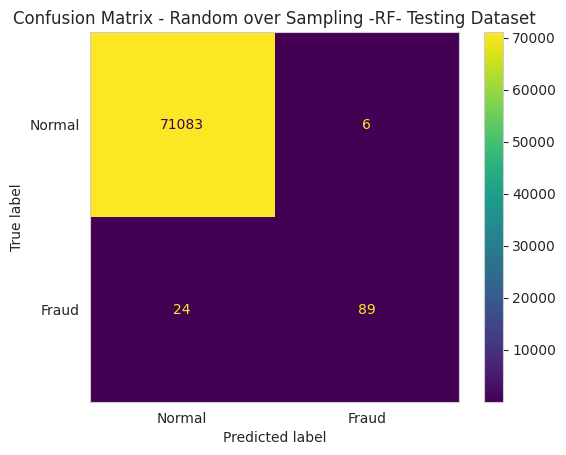

In [ ]:
confusion_matrix_over_RF = confusion_matrix(y_test_over,test_pred_over_RF)

cm_display_over_RF = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_over_RF, display_labels = ['Normal', 'Fraud'])

cm_display_over_RF.plot()
plt.title("Confusion Matrix - Random over Sampling -RF- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

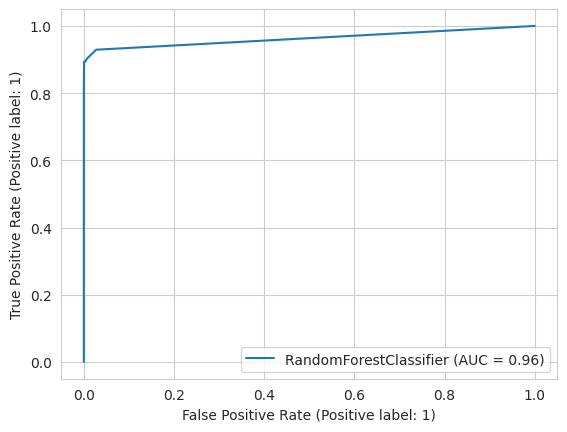

In [ ]:
Roc_display_over_RF = RocCurveDisplay.from_estimator(Random_Forest_over,X_test_over,y_test_over)

Class wise Accuracy

In [ ]:
pred_over_test_RF = pd.DataFrame(y_test_over)
pred_over_test_RF['predicted'] = test_pred_over_RF

pred_over_test_RF

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_over_test_cls0_RF = pred_over_test_RF[pred_over_test_RF['Class'] == 0]
pred_over_test_cls1_RF = pred_over_test_RF[pred_over_test_RF['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_over_RF = accuracy_score(pred_over_test_cls0_RF['Class'],pred_over_test_cls0_RF['predicted'])
test_precision_class0_over_RF = precision_score(pred_over_test_cls0_RF['Class'],pred_over_test_cls0_RF['predicted'])
test_recall_class0_over_RF = recall_score(pred_over_test_cls0_RF['Class'],pred_over_test_cls0_RF['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_over_RF*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_over_RF*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_over_RF*100,2)," %")


Accuracy of Class 0:  99.99  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_over_RF = accuracy_score(pred_over_test_cls1_RF['Class'],pred_over_test_cls1_RF['predicted'])
test_precision_class1_over_RF = precision_score(pred_over_test_cls1_RF['Class'],pred_over_test_cls1_RF['predicted'])
test_recall_class1_over_RF = recall_score(pred_over_test_cls1_RF['Class'],pred_over_test_cls1_RF['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_over_RF*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_over_RF*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_over_RF*100,2)," %")


Accuracy of Class 1:  78.76  %
precision of Class 1:  100.0  %
recall of Class 1:  78.76  %


#### Xtreme Gradient Boosting Classifier (XGBClassifier) 

In [ ]:
import xgboost as xgb

In [ ]:
xgb_over = xgb.XGBClassifier(objective="binary:logistic")

Training Dataset

In [ ]:
xgb_over.fit(X_train_over_resampled,y_train_over_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

##### Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_over_xgb = xgb_over.predict(X_train_over_resampled)
train_accuracy_over_xgb = accuracy_score(y_train_over_resampled,train_pred_over_xgb)
train_precision_over_xgb = precision_score(y_train_over_resampled,train_pred_over_xgb)
train_recall_over_xgb = recall_score(y_train_over_resampled,train_pred_over_xgb)


print("Accuracy on Training Data is: ",round(train_accuracy_over_xgb*100,2)," %")
print("precision on Training Data is: ",round(train_precision_over_xgb*100,2)," %")
print("recall on Training Data is: ",round(train_recall_over_xgb*100,2)," %")


Accuracy on Training Data is:  100.0  %
precision on Training Data is:  100.0  %
recall on Training Data is:  100.0  %


Classwise Accuracy

In [ ]:
pred_over_train_xgb = pd.DataFrame(y_train_over_resampled)
pred_over_train_xgb['predicted'] = train_pred_over_xgb
pred_over_train_xgb

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
426447      1          1
426448      1          1
426449      1          1
426450      1          1
426451      1          1

[426452 rows x 2 columns]

In [ ]:
pred_over_train_cls0_xgb = pred_over_train_xgb[pred_over_train_xgb['Class'] == 0]
pred_over_train_cls1_xgb = pred_over_train_xgb[pred_over_train_xgb['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_over_class0_xgb = accuracy_score(pred_over_train_cls0_xgb['Class'],pred_over_train_cls0_xgb['predicted'])
train_precision_over_class0_xgb = precision_score(pred_over_train_cls0_xgb['Class'],pred_over_train_cls0_xgb['predicted'])
train_recall_over_class0_xgb = recall_score(pred_over_train_cls0_xgb['Class'],pred_over_train_cls0_xgb['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_over_class0_xgb*100,2)," %")
print("precision of Class 0: ",round(train_precision_over_class0_xgb*100,2)," %")
print("recall of Class 0: ",round(train_recall_over_class0_xgb*100,2)," %")


Accuracy of Class 0:  100.0  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_over_class1_xgb = accuracy_score(pred_over_train_cls1_xgb['Class'],pred_over_train_cls1_xgb['predicted'])
train_precision_over_class1_xgb = precision_score(pred_over_train_cls1_xgb['Class'],pred_over_train_cls1_xgb['predicted'])
train_recall_over_class1_xgb = recall_score(pred_over_train_cls1_xgb['Class'],pred_over_train_cls1_xgb['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_over_class1_xgb*100,2)," %")
print("precision of Class 1: ",round(train_precision_over_class1_xgb*100,2)," %")
print("recall of Class 1: ",round(train_recall_over_class1_xgb*100,2)," %")


Accuracy of Class 1:  100.0  %
precision of Class 1:  100.0  %
recall of Class 1:  100.0  %


On Testing Data

In [ ]:
test_pred_over_xgb = xgb_over.predict(X_test_over)
test_accuracy1_over_xgb = accuracy_score(y_test_over,test_pred_over_xgb)
test_precision1_over_xgb = precision_score(y_test_over,test_pred_over_xgb)
test_recall1_over_xgb = recall_score(y_test_over,test_pred_over_xgb)


print("Accuracy on Testing Data is: ",round(test_accuracy1_over_xgb*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_over_xgb*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_over_xgb*100,2)," %")


Accuracy on Testing Data is:  99.96  %
precision on Testing Data is:  90.29  %
recall on Testing Data is:  82.3  %


Confusion Matrix

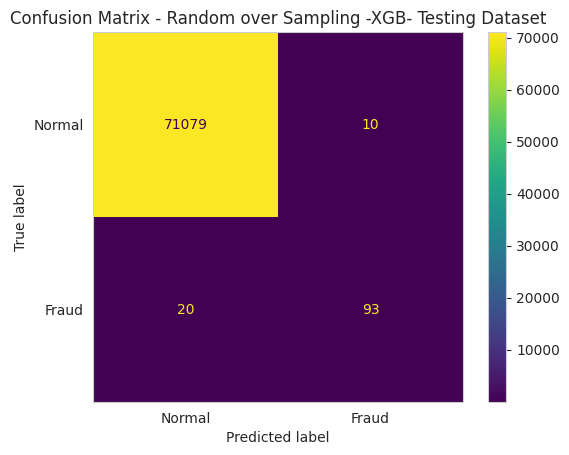

In [ ]:
confusion_matrix_over_xgb = confusion_matrix(y_test_over,test_pred_over_xgb)

cm_display_over_xgb = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_over_xgb, display_labels = ['Normal', 'Fraud'])

cm_display_over_xgb.plot()
plt.title("Confusion Matrix - Random over Sampling -XGB- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

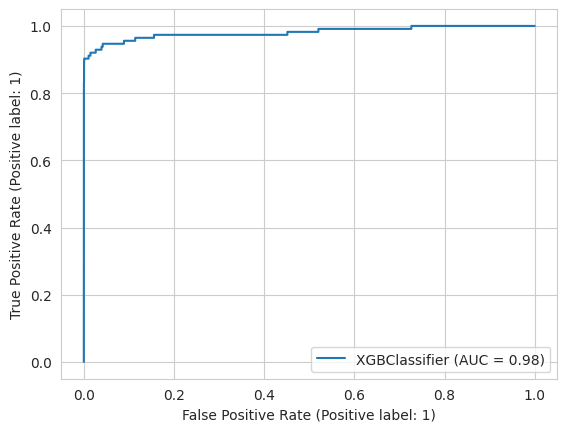

In [ ]:
Roc_display_over_xgb = RocCurveDisplay.from_estimator(xgb_over,X_test_over,y_test_over)

Class wise Accuracy

In [ ]:
pred_over_test_xgb = pd.DataFrame(y_test_over)
pred_over_test_xgb['predicted'] = test_pred_over_xgb

pred_over_test_xgb

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_over_test_cls0_xgb = pred_over_test_xgb[pred_over_test_xgb['Class'] == 0]
pred_over_test_cls1_xgb = pred_over_test_xgb[pred_over_test_xgb['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_over_xgb = accuracy_score(pred_over_test_cls0_xgb['Class'],pred_over_test_cls0_xgb['predicted'])
test_precision_class0_over_xgb = precision_score(pred_over_test_cls0_xgb['Class'],pred_over_test_cls0_xgb['predicted'])
test_recall_class0_over_xgb = recall_score(pred_over_test_cls0_xgb['Class'],pred_over_test_cls0_xgb['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_over_xgb*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_over_xgb*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_over_xgb*100,2)," %")


Accuracy of Class 0:  99.99  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_over_xgb = accuracy_score(pred_over_test_cls1_xgb['Class'],pred_over_test_cls1_xgb['predicted'])
test_precision_class1_over_xgb = precision_score(pred_over_test_cls1_xgb['Class'],pred_over_test_cls1_xgb['predicted'])
test_recall_class1_over_xgb = recall_score(pred_over_test_cls1_xgb['Class'],pred_over_test_cls1_xgb['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_over_xgb*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_over_xgb*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_over_xgb*100,2)," %")


Accuracy of Class 1:  82.3  %
precision of Class 1:  100.0  %
recall of Class 1:  82.3  %


#### Support Vector Machine Classifier





In [ ]:
svc_over = SVC()

Training Dataset

In [ ]:
svc_over.fit(X_train_over_resampled,y_train_over_resampled)

SVC()

#####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_over_svc = svc_over.predict(X_train_over_resampled)
train_accuracy_over_svc = accuracy_score(y_train_over_resampled,train_pred_over_svc)
train_precision_over_svc = precision_score(y_train_over_resampled,train_pred_over_svc)
train_recall_over_svc = recall_score(y_train_over_resampled,train_pred_over_svc)

print("Accuracy on Training Data is: ",round(train_accuracy_over_svc*100,2)," %")
print("precision on Training Data is: ",round(train_precision_over_svc*100,2)," %")
print("recall on Training Data is: ",round(train_recall_over_svc*100,2)," %")

Accuracy on Training Data is:  97.51  %
precision on Training Data is:  98.72  %
recall on Training Data is:  96.27  %


Classwise Accuracy

In [ ]:
pred_over_train_svc = pd.DataFrame(y_train_over_resampled)
pred_over_train_svc['predicted'] = train_pred_over_svc
pred_over_train_svc

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
426447      1          1
426448      1          1
426449      1          1
426450      1          1
426451      1          1

[426452 rows x 2 columns]

In [ ]:
pred_over_train_cls0_svc = pred_over_train_svc[pred_over_train_svc['Class'] == 0]
pred_over_train_cls1_svc = pred_over_train_svc[pred_over_train_svc['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_over_class0_svc = accuracy_score(pred_over_train_cls0_svc['Class'],pred_over_train_cls0_svc['predicted'])
train_precision_over_class0_svc = precision_score(pred_over_train_cls0_svc['Class'],pred_over_train_cls0_svc['predicted'])
train_recall_over_class0_svc = recall_score(pred_over_train_cls0_svc['Class'],pred_over_train_cls0_svc['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_over_class0_svc*100,2)," %")
print("precision of Class 0: ",round(train_precision_over_class0_svc*100,2)," %")
print("recall of Class 0: ",round(train_recall_over_class0_svc*100,2)," %")

Accuracy of Class 0:  98.75  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_over_class1_svc = accuracy_score(pred_over_train_cls1_svc['Class'],pred_over_train_cls1_svc['predicted'])
train_precision_over_class1_svc = precision_score(pred_over_train_cls1_svc['Class'],pred_over_train_cls1_svc['predicted'])
train_recall_over_class1_svc = recall_score(pred_over_train_cls1_svc['Class'],pred_over_train_cls1_svc['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_over_class1_svc*100,2)," %")
print("precision of Class 1: ",round(train_precision_over_class1_svc*100,2)," %")
print("recall of Class 1: ",round(train_recall_over_class1_svc*100,2)," %")


Accuracy of Class 1:  96.27  %
precision of Class 1:  100.0  %
recall of Class 1:  96.27  %


On Testing Data

In [ ]:
test_pred_over_svc = svc_over.predict(X_test_over)
test_accuracy1_over_svc = accuracy_score(y_test_over,test_pred_over_svc)
test_precision1_over_svc = precision_score(y_test_over,test_pred_over_svc)
test_recall1_over_svc = recall_score(y_test_over,test_pred_over_svc)


print("Accuracy on Testing Data is: ",round(test_accuracy1_over_svc*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_over_svc*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_over_svc*100,2)," %")


Accuracy on Testing Data is:  98.74  %
precision on Testing Data is:  9.87  %
recall on Testing Data is:  84.96  %


Confusion Matrix

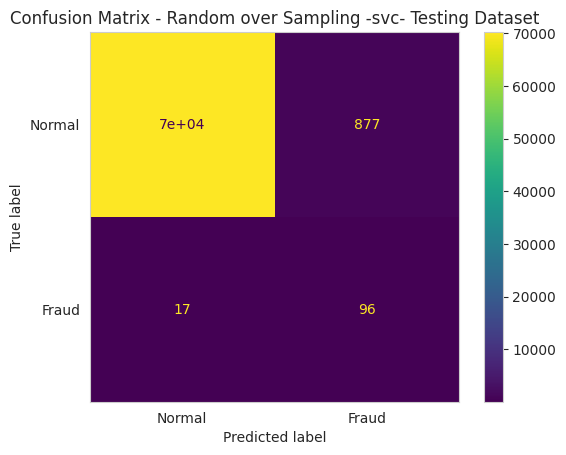

In [ ]:
confusion_matrix_over_svc = confusion_matrix(y_test_over,test_pred_over_svc)

cm_display_over_svc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_over_svc, display_labels = ['Normal', 'Fraud'])

cm_display_over_svc.plot()
plt.title("Confusion Matrix - Random over Sampling -svc- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

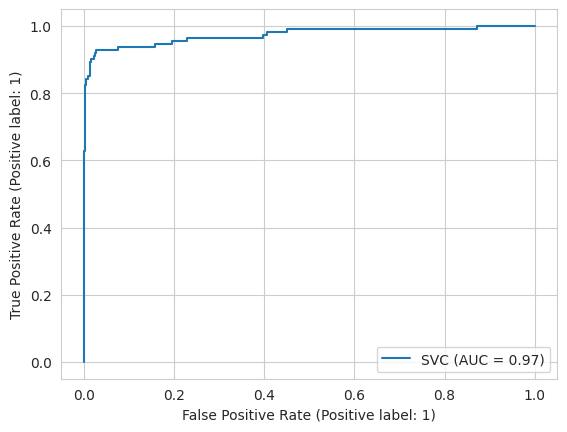

In [ ]:
Roc_display_over_svc = RocCurveDisplay.from_estimator(svc_over,X_test_over,y_test_over)

Class wise Accuracy

In [ ]:
pred_over_test_svc = pd.DataFrame(y_test_over)
pred_over_test_svc['predicted'] = test_pred_over_svc

pred_over_test_svc

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_over_test_cls0_svc = pred_over_test_svc[pred_over_test_svc['Class'] == 0]
pred_over_test_cls1_svc = pred_over_test_svc[pred_over_test_svc['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_over_svc = accuracy_score(pred_over_test_cls0_svc['Class'],pred_over_test_cls0_svc['predicted'])
test_precision_class0_over_svc = precision_score(pred_over_test_cls0_svc['Class'],pred_over_test_cls0_svc['predicted'])
test_recall_class0_over_svc = recall_score(pred_over_test_cls0_svc['Class'],pred_over_test_cls0_svc['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_over_svc*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_over_svc*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_over_svc*100,2)," %")


Accuracy of Class 0:  98.77  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_over_svc = accuracy_score(pred_over_test_cls1_svc['Class'],pred_over_test_cls1_svc['predicted'])
test_precision_class1_over_svc = precision_score(pred_over_test_cls1_svc['Class'],pred_over_test_cls1_svc['predicted'])
test_recall_class1_over_svc = recall_score(pred_over_test_cls1_svc['Class'],pred_over_test_cls1_svc['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_over_svc*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_over_svc*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_over_svc*100,2)," %")


Accuracy of Class 1:  84.96  %
precision of Class 1:  100.0  %
recall of Class 1:  84.96  %


### Evaluation graphs

In [ ]:
Model = ["Logistic Regression","Random Forest","XGB Classifier","SVM Classifier"]

Accuracy Graph

In [ ]:
Acc_over_train_cls0 = [train_accuracy_over_class0_logistic,train_accuracy_over_class0_RF,train_accuracy_over_class0_xgb,train_accuracy_over_class0_svc]
Acc_over_test_cls0 = [test_accuracy_class0_over_logistic,test_accuracy_class0_over_RF,test_accuracy_class0_over_xgb,test_accuracy_class0_over_svc]
Acc_over_train_cls1 = [train_accuracy_over_class1_logistic,train_accuracy_over_class1_RF,train_accuracy_over_class1_xgb,train_accuracy_over_class1_svc]
Acc_over_test_cls1 = [test_accuracy_class1_over_logistic,test_accuracy_class1_over_RF,test_accuracy_class1_over_xgb,test_accuracy_class1_over_svc]

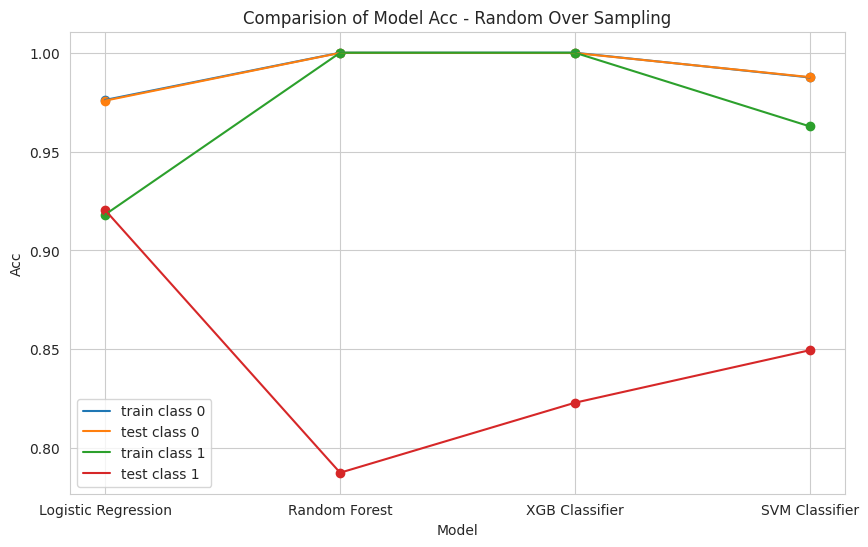

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Acc_over_train_cls0, label = "train class 0")
plt.scatter(Model,Acc_over_train_cls0)

plt.plot(Model,Acc_over_test_cls0, label = "test class 0")
plt.scatter(Model,Acc_over_test_cls0)

plt.plot(Model,Acc_over_train_cls1, label = "train class 1")
plt.scatter(Model,Acc_over_train_cls1)

plt.plot(Model,Acc_over_test_cls1, label = "test class 1")
plt.scatter(Model,Acc_over_test_cls1)

plt.ylabel("Acc")
plt.xlabel("Model")
plt.title("Comparision of Model Acc - Random Over Sampling")
plt.legend()
plt.show()

Precision Graph

In [ ]:
Pre_over_train_cls0 = [train_precision_over_class0_logistic,train_precision_over_class0_RF,train_precision_over_class0_xgb,train_precision_over_class0_svc]
Pre_over_test_cls0 = [test_precision_class0_over_logistic,test_precision_class0_over_RF,test_precision_class0_over_xgb,test_precision_class0_over_svc]
Pre_over_train_cls1 = [train_precision_over_class1_logistic,train_precision_over_class1_RF,train_precision_over_class1_xgb,train_precision_over_class1_svc]
Pre_over_test_cls1 = [test_precision_class1_over_logistic,test_precision_class1_over_RF,test_precision_class1_over_xgb,test_precision_class1_over_svc]

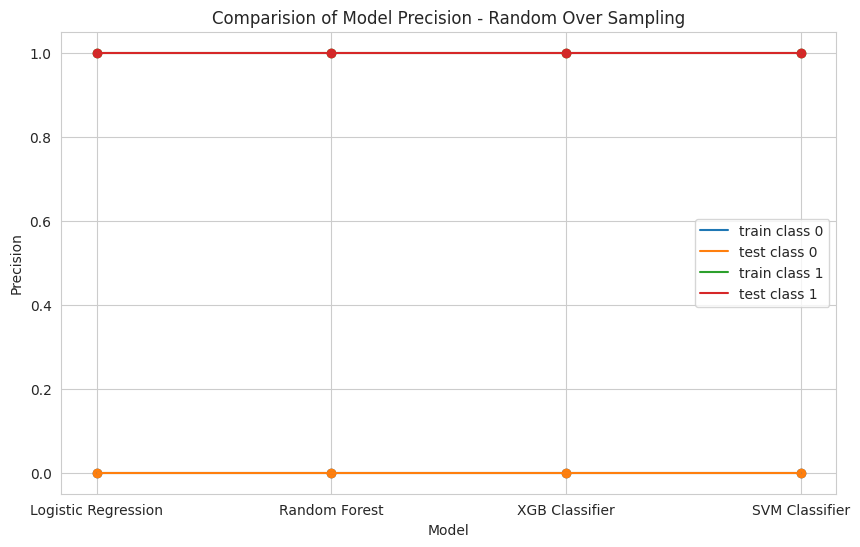

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Pre_over_train_cls0, label = "train class 0")
plt.scatter(Model,Pre_over_train_cls0)

plt.plot(Model,Pre_over_test_cls0, label = "test class 0")
plt.scatter(Model,Pre_over_test_cls0)

plt.plot(Model,Pre_over_train_cls1, label = "train class 1")
plt.scatter(Model,Pre_over_train_cls1)

plt.plot(Model,Pre_over_test_cls1, label = "test class 1")
plt.scatter(Model,Pre_over_test_cls1)

plt.ylabel("Precision")
plt.xlabel("Model")
plt.title("Comparision of Model Precision - Random Over Sampling")
plt.legend()
plt.show()

Recall Graph

In [ ]:
Recall_over_train_cls0 = [train_recall_over_class0_logistic,train_recall_over_class0_RF,train_recall_over_class0_xgb,train_recall_over_class0_svc]
Recall_over_test_cls0 = [test_recall_class0_over_logistic,test_recall_class0_over_RF,test_recall_class0_over_xgb,test_recall_class0_over_svc]
Recall_over_train_cls1 = [train_recall_over_class1_logistic,train_recall_over_class1_RF,train_recall_over_class1_xgb,train_recall_over_class1_svc]
Recall_over_test_cls1 = [test_recall_class1_over_logistic,test_recall_class1_over_RF,test_recall_class1_over_xgb,test_recall_class1_over_svc]

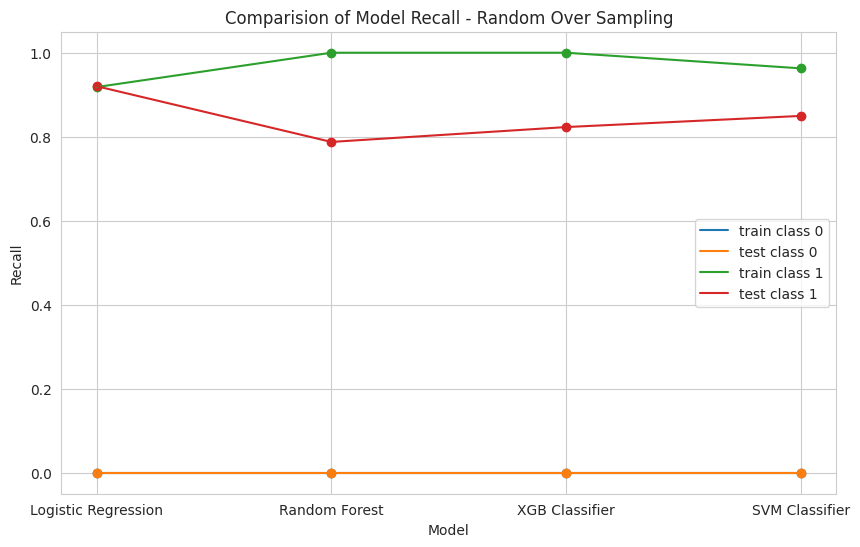

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Recall_over_train_cls0, label = "train class 0")
plt.scatter(Model,Recall_over_train_cls0)

plt.plot(Model,Recall_over_test_cls0, label = "test class 0")
plt.scatter(Model,Recall_over_test_cls0)

plt.plot(Model,Recall_over_train_cls1, label = "train class 1")
plt.scatter(Model,Recall_over_train_cls1)

plt.plot(Model,Recall_over_test_cls1, label = "test class 1")
plt.scatter(Model,Recall_over_test_cls1)

plt.ylabel("Recall")
plt.xlabel("Model")
plt.title("Comparision of Model Recall - Random Over Sampling")
plt.legend()
plt.show()

## SMOTE - Synthetic Minority Over-sampling Technique

In [ ]:
X_smote = credit_df.drop("Class", axis="columns")
y_smote = credit_df["Class"]

###Spliting into Train and Test Data

In [ ]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote, y_smote , test_size = 0.25,random_state = 42)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state = 42 )
X_train_smote_resampled, y_train_smote_resampled = smote.fit_resample(X_train_smote, y_train_smote)

In [ ]:
X_train_smote_resampled

Amount_Scaled  Time_Scaled        V1        V2        V3        V4  \
0            0.229442    -0.293131 -1.648591  1.228130  1.370169 -1.735542   
1            0.547754    -0.458699 -0.234775 -0.493269  1.236728 -2.338793   
2            1.242926    -0.623985  1.134626 -0.774460 -0.163390 -0.533358   
3           -0.167680    -0.049777  0.069514  1.017753  1.033117  1.384376   
4            0.000000    -0.533253 -0.199441  0.610092 -0.114437  0.256565   
...               ...          ...       ...       ...       ...       ...   
426447       1.158370    -0.104515 -4.399400  3.199620 -4.865551  4.025221   
426448      -0.304101     0.625838  0.744948  3.392737 -6.011281  5.836315   
426449      -0.082351     0.214582  1.830229  0.362106 -0.379728  3.895474   
426450      -0.266042    -0.306621  0.336538  1.820070 -2.571036  3.439066   
426451       1.043226    -0.329631 -8.236401  2.747934 -7.806860  6.598550   

              V5        V6        V7        V8  ...       V19       V20  \
0      -0.029455 -0.484129  0.918645 -0.438750  ... -0.331603  0.384201   
1      -1.176733  0.885733 -1.960981 -2.363412  ... -1.635634  0.364679   
2      -0.604555 -0.244482 -0.212682  0.040782  ... -0.519459 -0.396476   
3       0.223233 -0.310845  0.597287 -0.127658  ...  1.561447  0.148760   
4       2.290752  4.008475 -0.123530  1.038374  ...  1.375281  0.292972   
...          ...       ...       ...       ...  ...       ...       ...   
426447 -3.514641 -1.791849 -4.945036  1.837274  ...  2.015158  0.327371   
426448  1.609077 -1.772445 -0.988565  0.457815  ... -1.026015  0.347824   
426449  0.695744  1.290445 -0.354359  0.229528  ... -1.789408 -0.355317   
426450 -0.748656 -1.227233 -2.124525  0.567179  ... -0.108083  0.298887   
426451 -5.383040 -0.342528 -9.072851  1.392083  ...  2.022969 -0.554652   

             V21       V22       V23       V24       V25       V26       V27  \
0      -0.218076 -0.203458 -0.213015  0.011372 -0.304481  0.632063 -0.262968   
1      -1.495358 -0.083066  0.074612 -0.347329  0.541900 -0.433294  0.089293   
2      -0.684454 -1.855269  0.171997 -0.387783 -0.062985  0.245118 -0.061178   
3       0.097023  0.369957 -0.219266 -0.124941 -0.049749 -0.112946  0.114440   
4      -0.019733  0.165463 -0.080978  1.020656 -0.300730 -0.269595  0.481769   
...          ...       ...       ...       ...       ...       ...       ...   
426447  1.144297  0.327644 -0.213067  0.172842 -0.036296 -0.233090  0.387298   
426448  0.152228 -0.792318 -0.132478 -0.359929  0.228149  0.216943  0.455950   
426449 -0.088539  0.149906  0.160602 -0.581516 -0.111556  0.012840 -0.023417   
426450  0.368643 -0.381567 -0.184123 -0.158542  0.726614 -0.019362  0.560470   
426451  0.012248  0.802923  0.215435 -0.427165 -0.147023  0.258931  0.247746   

             V28  
0      -0.099863  
1       0.212029  
2       0.012180  
3       0.066101  
4       0.254114  
...          ...  
426447  0.828801  
426448  0.292131  
426449 -0.059271  
426450  0.314052  
426451 -0.125058  

[426452 rows x 30 columns]

In [ ]:
y_train_smote.value_counts()

0    213226
1       379
Name: Class, dtype: int64

###Model Training

####Logistic Regression Model

In [ ]:
Logistic_Regression_smote = LogisticRegression()

Training Dataset

In [ ]:
Logistic_Regression_smote.fit(X_train_smote_resampled,y_train_smote_resampled)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

#####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_smote_logistic = Logistic_Regression_smote.predict(X_train_smote_resampled)
train_accuracy_smote_logistic = accuracy_score(y_train_smote_resampled,train_pred_smote_logistic)
train_precision_smote_logistic = precision_score(y_train_smote_resampled,train_pred_smote_logistic)
train_recall_smote_logistic = recall_score(y_train_smote_resampled,train_pred_smote_logistic)

print("Accuracy on Training Data is: ",round(train_accuracy_smote_logistic*100,2)," %")
print("precision on Training Data is: ",round(train_precision_smote_logistic*100,2)," %")
print("recall on Training Data is: ",round(train_recall_smote_logistic*100,2)," %")

Accuracy on Training Data is:  94.87  %
precision on Training Data is:  97.32  %
recall on Training Data is:  92.27  %


Classwise Accuracy

In [ ]:
pred_smote_train_logistic = pd.DataFrame(y_train_smote_resampled)
pred_smote_train_logistic['predicted'] = train_pred_smote_logistic
pred_smote_train_logistic

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
426447      1          1
426448      1          1
426449      1          0
426450      1          1
426451      1          1

[426452 rows x 2 columns]

In [ ]:
pred_smote_train_cls0_logistic = pred_smote_train_logistic[pred_smote_train_logistic['Class'] == 0]
pred_smote_train_cls1_logistic = pred_smote_train_logistic[pred_smote_train_logistic['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_smote_class0_logistic = accuracy_score(pred_smote_train_cls0_logistic['Class'],pred_smote_train_cls0_logistic['predicted'])
train_precision_smote_class0_logistic = precision_score(pred_smote_train_cls0_logistic['Class'],pred_smote_train_cls0_logistic['predicted'])
train_recall_smote_class0_logistic = recall_score(pred_smote_train_cls0_logistic['Class'],pred_smote_train_cls0_logistic['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_smote_class0_logistic*100,2)," %")
print("precision of Class 0: ",round(train_precision_smote_class0_logistic*100,2)," %")
print("recall of Class 0: ",round(train_recall_smote_class0_logistic*100,2)," %")

Accuracy of Class 0:  97.46  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_smote_class1_logistic = accuracy_score(pred_smote_train_cls1_logistic['Class'],pred_smote_train_cls1_logistic['predicted'])
train_precision_smote_class1_logistic = precision_score(pred_smote_train_cls1_logistic['Class'],pred_smote_train_cls1_logistic['predicted'])
train_recall_smote_class1_logistic = recall_score(pred_smote_train_cls1_logistic['Class'],pred_smote_train_cls1_logistic['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_smote_class1_logistic*100,2)," %")
print("precision of Class 1: ",round(train_precision_smote_class1_logistic*100,2)," %")
print("recall of Class 1: ",round(train_recall_smote_class1_logistic*100,2)," %")


Accuracy of Class 1:  92.27  %
precision of Class 1:  100.0  %
recall of Class 1:  92.27  %


On Testing Data

In [ ]:
test_pred_smote_logistic = Logistic_Regression_smote.predict(X_test_smote)
test_accuracy1_smote_logistic = accuracy_score(y_test_smote,test_pred_smote_logistic)
test_precision1_smote_logistic = precision_score(y_test_smote,test_pred_smote_logistic)
test_recall1_smote_logistic = recall_score(y_test_smote,test_pred_smote_logistic)


print("Accuracy on Testing Data is: ",round(test_accuracy1_smote_logistic*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_smote_logistic*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_smote_logistic*100,2)," %")


Accuracy on Testing Data is:  97.42  %
precision on Testing Data is:  5.43  %
recall on Testing Data is:  92.92  %


Confusion Matrix

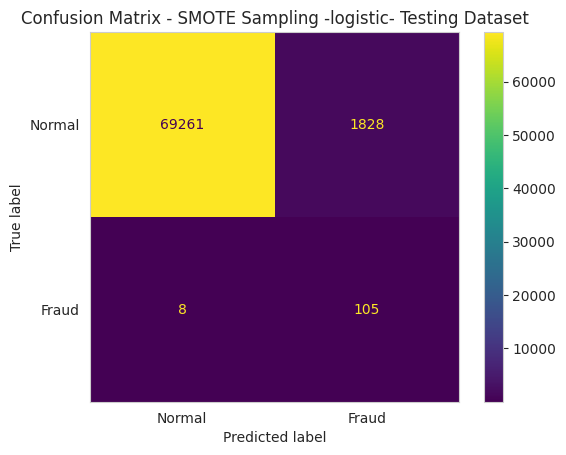

In [ ]:
confusion_matrix_smote_logistic = confusion_matrix(y_test_smote,test_pred_smote_logistic)

cm_display_smote_logistic = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_smote_logistic, display_labels = ['Normal', 'Fraud'])

cm_display_smote_logistic.plot()
plt.title("Confusion Matrix - SMOTE Sampling -logistic- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

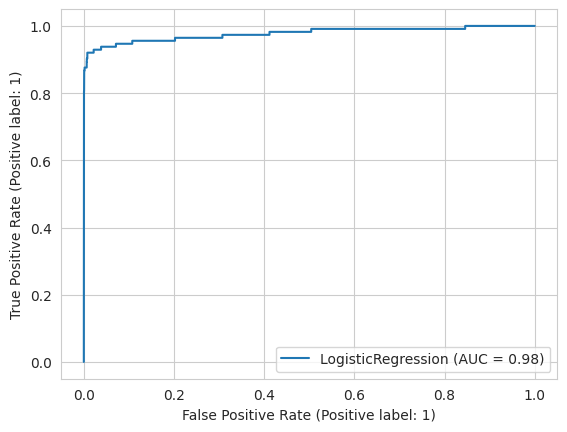

In [ ]:
Roc_display_smote_logistic = RocCurveDisplay.from_estimator(Logistic_Regression_smote,X_test_smote,y_test_smote)

Class wise Accuracy

In [ ]:
pred_smote_test_logistic = pd.DataFrame(y_test_smote)
pred_smote_test_logistic['predicted'] = test_pred_smote_logistic

pred_smote_test_logistic

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_smote_test_cls0_logistic = pred_smote_test_logistic[pred_smote_test_logistic['Class'] == 0]
pred_smote_test_cls1_logistic = pred_smote_test_logistic[pred_smote_test_logistic['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_smote_logistic = accuracy_score(pred_smote_test_cls0_logistic['Class'],pred_smote_test_cls0_logistic['predicted'])
test_precision_class0_smote_logistic = precision_score(pred_smote_test_cls0_logistic['Class'],pred_smote_test_cls0_logistic['predicted'])
test_recall_class0_smote_logistic = recall_score(pred_smote_test_cls0_logistic['Class'],pred_smote_test_cls0_logistic['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_smote_logistic*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_smote_logistic*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_smote_logistic*100,2)," %")


Accuracy of Class 0:  97.43  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_smote_logistic = accuracy_score(pred_smote_test_cls1_logistic['Class'],pred_smote_test_cls1_logistic['predicted'])
test_precision_class1_smote_logistic = precision_score(pred_smote_test_cls1_logistic['Class'],pred_smote_test_cls1_logistic['predicted'])
test_recall_class1_smote_logistic = recall_score(pred_smote_test_cls1_logistic['Class'],pred_smote_test_cls1_logistic['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_smote_logistic*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_smote_logistic*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_smote_logistic*100,2)," %")


Accuracy of Class 1:  92.92  %
precision of Class 1:  100.0  %
recall of Class 1:  92.92  %


#### Random Forest Classifier

In [ ]:
Random_Forest_smote = RandomForestClassifier()

Training Dataset

In [ ]:
Random_Forest_smote.fit(X_train_smote_resampled,y_train_smote_resampled)

RandomForestClassifier()

#####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_smote_RF = Random_Forest_smote.predict(X_train_smote_resampled)
train_accuracy_smote_RF = accuracy_score(y_train_smote_resampled,train_pred_smote_RF)
train_precision_smote_RF = precision_score(y_train_smote_resampled,train_pred_smote_RF)
train_recall_smote_RF = recall_score(y_train_smote_resampled,train_pred_smote_RF)


print("Accuracy on Training Data is: ",round(train_accuracy_smote_RF*100,2)," %")
print("precision on Training Data is: ",round(train_precision_smote_RF*100,2)," %")
print("recall on Training Data is: ",round(train_recall_smote_RF*100,2)," %")


Accuracy on Training Data is:  100.0  %
precision on Training Data is:  100.0  %
recall on Training Data is:  100.0  %


Classwise Accuracy

In [ ]:
pred_smote_train_RF = pd.DataFrame(y_train_smote_resampled)
pred_smote_train_RF['predicted'] = train_pred_smote_RF
pred_smote_train_RF

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
426447      1          1
426448      1          1
426449      1          1
426450      1          1
426451      1          1

[426452 rows x 2 columns]

In [ ]:
pred_smote_train_cls0_RF = pred_smote_train_RF[pred_smote_train_RF['Class'] == 0]
pred_smote_train_cls1_RF = pred_smote_train_RF[pred_smote_train_RF['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_smote_class0_RF = accuracy_score(pred_smote_train_cls0_RF['Class'],pred_smote_train_cls0_RF['predicted'])
train_precision_smote_class0_RF = precision_score(pred_smote_train_cls0_RF['Class'],pred_smote_train_cls0_RF['predicted'])
train_recall_smote_class0_RF = recall_score(pred_smote_train_cls0_RF['Class'],pred_smote_train_cls0_RF['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_smote_class0_RF*100,2)," %")
print("precision of Class 0: ",round(train_precision_smote_class0_RF*100,2)," %")
print("recall of Class 0: ",round(train_recall_smote_class0_RF*100,2)," %")


Accuracy of Class 0:  100.0  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_smote_class1_RF = accuracy_score(pred_smote_train_cls1_RF['Class'],pred_smote_train_cls1_RF['predicted'])
train_precision_smote_class1_RF = precision_score(pred_smote_train_cls1_RF['Class'],pred_smote_train_cls1_RF['predicted'])
train_recall_smote_class1_RF = recall_score(pred_smote_train_cls1_RF['Class'],pred_smote_train_cls1_RF['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_smote_class1_RF*100,2)," %")
print("precision of Class 1: ",round(train_precision_smote_class1_RF*100,2)," %")
print("recall of Class 1: ",round(train_recall_smote_class1_RF*100,2)," %")


Accuracy of Class 1:  100.0  %
precision of Class 1:  100.0  %
recall of Class 1:  100.0  %


On Testing Data

In [ ]:
test_pred_smote_RF = Random_Forest_smote.predict(X_test_smote)
test_accuracy1_smote_RF = accuracy_score(y_test_smote,test_pred_smote_RF)
test_precision1_smote_RF = precision_score(y_test_smote,test_pred_smote_RF)
test_recall1_smote_RF = recall_score(y_test_smote,test_pred_smote_RF)


print("Accuracy on Testing Data is: ",round(test_accuracy1_smote_RF*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_smote_RF*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_smote_RF*100,2)," %")


Accuracy on Testing Data is:  99.95  %
precision on Testing Data is:  82.91  %
precision on Testing Data is:  82.91  %


Confusion Matrix

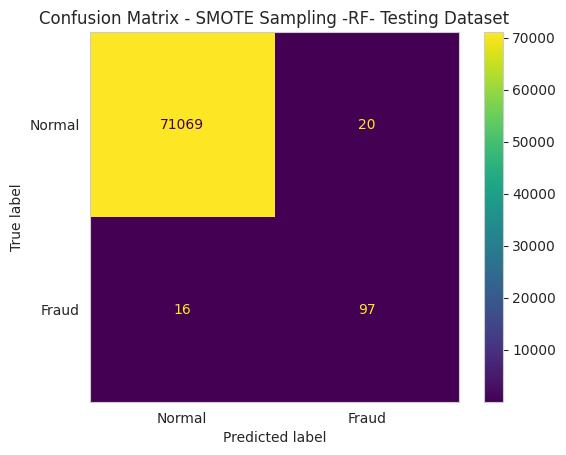

In [ ]:
confusion_matrix_smote_RF = confusion_matrix(y_test_smote,test_pred_smote_RF)

cm_display_smote_RF = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_smote_RF, display_labels = ['Normal', 'Fraud'])

cm_display_smote_RF.plot()
plt.title("Confusion Matrix - SMOTE Sampling -RF- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

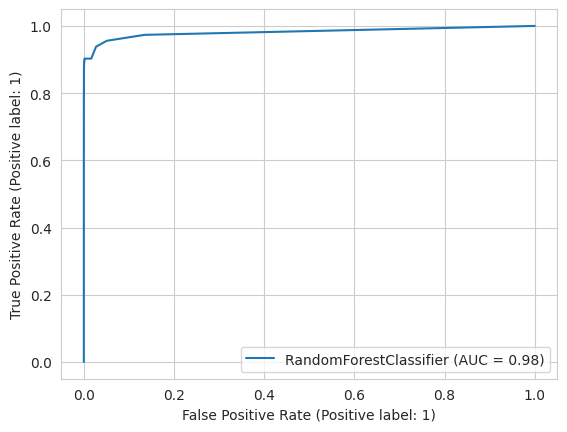

In [ ]:
Roc_display_smote_RF = RocCurveDisplay.from_estimator(Random_Forest_smote,X_test_smote,y_test_smote)

Class wise Accuracy

In [ ]:
pred_smote_test_RF = pd.DataFrame(y_test_smote)
pred_smote_test_RF['predicted'] = test_pred_smote_RF

pred_smote_test_RF

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_smote_test_cls0_RF = pred_smote_test_RF[pred_smote_test_RF['Class'] == 0]
pred_smote_test_cls1_RF = pred_smote_test_RF[pred_smote_test_RF['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_smote_RF = accuracy_score(pred_smote_test_cls0_RF['Class'],pred_smote_test_cls0_RF['predicted'])
test_precision_class0_smote_RF = precision_score(pred_smote_test_cls0_RF['Class'],pred_smote_test_cls0_RF['predicted'])
test_recall_class0_smote_RF = recall_score(pred_smote_test_cls0_RF['Class'],pred_smote_test_cls0_RF['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_smote_RF*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_smote_RF*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_smote_RF*100,2)," %")


Accuracy of Class 0:  99.97  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_smote_RF = accuracy_score(pred_smote_test_cls1_RF['Class'],pred_smote_test_cls1_RF['predicted'])
test_precision_class1_smote_RF = precision_score(pred_smote_test_cls1_RF['Class'],pred_smote_test_cls1_RF['predicted'])
test_recall_class1_smote_RF = recall_score(pred_smote_test_cls1_RF['Class'],pred_smote_test_cls1_RF['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_smote_RF*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_smote_RF*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_smote_RF*100,2)," %")


Accuracy of Class 1:  85.84  %
precision of Class 1:  100.0  %
recall of Class 1:  85.84  %


#### Xtreme Gradient Boosting Classifier (XGBClassifier) 

In [ ]:
import xgboost as xgb

In [ ]:
xgb_smote = xgb.XGBClassifier(objective="binary:logistic")

Training Dataset

In [ ]:
xgb_smote.fit(X_train_smote_resampled,y_train_smote_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

##### Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_smote_xgb = xgb_smote.predict(X_train_smote_resampled)
train_accuracy_smote_xgb = accuracy_score(y_train_smote_resampled,train_pred_smote_xgb)
train_precision_smote_xgb = precision_score(y_train_smote_resampled,train_pred_smote_xgb)
train_recall_smote_xgb = recall_score(y_train_smote_resampled,train_pred_smote_xgb)


print("Accuracy on Training Data is: ",round(train_accuracy_smote_xgb*100,2)," %")
print("precision on Training Data is: ",round(train_precision_smote_xgb*100,2)," %")
print("recall on Training Data is: ",round(train_recall_smote_xgb*100,2)," %")


Accuracy on Training Data is:  100.0  %
precision on Training Data is:  100.0  %
recall on Training Data is:  100.0  %


Classwise Accuracy

In [ ]:
pred_smote_train_xgb = pd.DataFrame(y_train_smote_resampled)
pred_smote_train_xgb['predicted'] = train_pred_smote_xgb
pred_smote_train_xgb

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
426447      1          1
426448      1          1
426449      1          1
426450      1          1
426451      1          1

[426452 rows x 2 columns]

In [ ]:
pred_smote_train_cls0_xgb = pred_smote_train_xgb[pred_smote_train_xgb['Class'] == 0]
pred_smote_train_cls1_xgb = pred_smote_train_xgb[pred_smote_train_xgb['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_smote_class0_xgb = accuracy_score(pred_smote_train_cls0_xgb['Class'],pred_smote_train_cls0_xgb['predicted'])
train_precision_smote_class0_xgb = precision_score(pred_smote_train_cls0_xgb['Class'],pred_smote_train_cls0_xgb['predicted'])
train_recall_smote_class0_xgb = recall_score(pred_smote_train_cls0_xgb['Class'],pred_smote_train_cls0_xgb['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_smote_class0_xgb*100,2)," %")
print("precision of Class 0: ",round(train_precision_smote_class0_xgb*100,2)," %")
print("recall of Class 0: ",round(train_recall_smote_class0_xgb*100,2)," %")


Accuracy of Class 0:  100.0  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_smote_class1_xgb = accuracy_score(pred_smote_train_cls1_xgb['Class'],pred_smote_train_cls1_xgb['predicted'])
train_precision_smote_class1_xgb = precision_score(pred_smote_train_cls1_xgb['Class'],pred_smote_train_cls1_xgb['predicted'])
train_recall_smote_class1_xgb = recall_score(pred_smote_train_cls1_xgb['Class'],pred_smote_train_cls1_xgb['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_smote_class1_xgb*100,2)," %")
print("precision of Class 1: ",round(train_precision_smote_class1_xgb*100,2)," %")
print("recall of Class 1: ",round(train_recall_smote_class1_xgb*100,2)," %")


Accuracy of Class 1:  100.0  %
precision of Class 1:  100.0  %
recall of Class 1:  100.0  %


On Testing Data

In [ ]:
test_pred_smote_xgb = xgb_smote.predict(X_test_smote)
test_accuracy1_smote_xgb = accuracy_score(y_test_smote,test_pred_smote_xgb)
test_precision1_smote_xgb = precision_score(y_test_smote,test_pred_smote_xgb)
test_recall1_smote_xgb = recall_score(y_test_smote,test_pred_smote_xgb)


print("Accuracy on Testing Data is: ",round(test_accuracy1_smote_xgb*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_smote_xgb*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_smote_xgb*100,2)," %")


Accuracy on Testing Data is:  99.93  %
precision on Testing Data is:  72.93  %
recall on Testing Data is:  85.84  %


Confusion Matrix

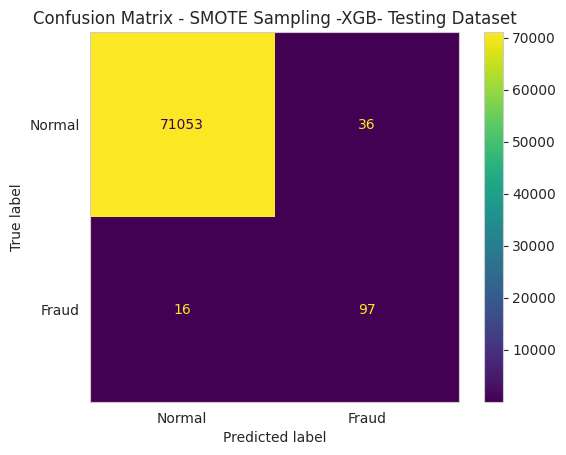

In [ ]:
confusion_matrix_smote_xgb = confusion_matrix(y_test_smote,test_pred_smote_xgb)

cm_display_smote_xgb = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_smote_xgb, display_labels = ['Normal', 'Fraud'])

cm_display_smote_xgb.plot()
plt.title("Confusion Matrix - SMOTE Sampling -XGB- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

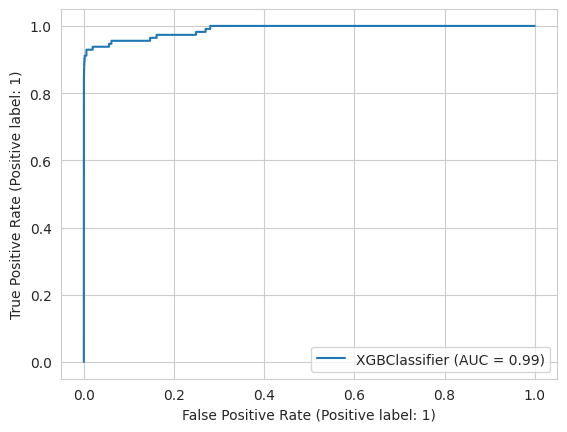

In [ ]:
Roc_display_smote_xgb = RocCurveDisplay.from_estimator(xgb_smote,X_test_smote,y_test_smote)

Class wise Accuracy

In [ ]:
pred_smote_test_xgb = pd.DataFrame(y_test_smote)
pred_smote_test_xgb['predicted'] = test_pred_smote_xgb

pred_smote_test_xgb

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_smote_test_cls0_xgb = pred_smote_test_xgb[pred_smote_test_xgb['Class'] == 0]
pred_smote_test_cls1_xgb = pred_smote_test_xgb[pred_smote_test_xgb['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_smote_xgb = accuracy_score(pred_smote_test_cls0_xgb['Class'],pred_smote_test_cls0_xgb['predicted'])
test_precision_class0_smote_xgb = precision_score(pred_smote_test_cls0_xgb['Class'],pred_smote_test_cls0_xgb['predicted'])
test_recall_class0_smote_xgb = recall_score(pred_smote_test_cls0_xgb['Class'],pred_smote_test_cls0_xgb['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_smote_xgb*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_smote_xgb*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_smote_xgb*100,2)," %")


Accuracy of Class 0:  99.95  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_smote_xgb = accuracy_score(pred_smote_test_cls1_xgb['Class'],pred_smote_test_cls1_xgb['predicted'])
test_precision_class1_smote_xgb = precision_score(pred_smote_test_cls1_xgb['Class'],pred_smote_test_cls1_xgb['predicted'])
test_recall_class1_smote_xgb = recall_score(pred_smote_test_cls1_xgb['Class'],pred_smote_test_cls1_xgb['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_smote_xgb*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_smote_xgb*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_smote_xgb*100,2)," %")


Accuracy of Class 1:  85.84  %
precision of Class 1:  100.0  %
recall of Class 1:  85.84  %


#### Support Vector Machine Classifier





In [ ]:
svc_smote = SVC()

Training Dataset

In [ ]:
svc_smote.fit(X_train_smote_resampled,y_train_smote_resampled)

SVC()

#####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_smote_svc = svc_smote.predict(X_train_smote_resampled)
train_accuracy_smote_svc = accuracy_score(y_train_smote_resampled,train_pred_smote_svc)
train_precision_smote_svc = precision_score(y_train_smote_resampled,train_pred_smote_svc)
train_recall_smote_svc = recall_score(y_train_smote_resampled,train_pred_smote_svc)

print("Accuracy on Training Data is: ",round(train_accuracy_smote_svc*100,2)," %")
print("precision on Training Data is: ",round(train_precision_smote_svc*100,2)," %")
print("recall on Training Data is: ",round(train_recall_smote_svc*100,2)," %")

Accuracy on Training Data is:  98.25  %
precision on Training Data is:  98.39  %
recall on Training Data is:  98.1  %


Classwise Accuracy

In [ ]:
pred_smote_train_svc = pd.DataFrame(y_train_smote_resampled)
pred_smote_train_svc['predicted'] = train_pred_smote_svc
pred_smote_train_svc

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
426447      1          1
426448      1          1
426449      1          1
426450      1          1
426451      1          1

[426452 rows x 2 columns]

In [ ]:
pred_smote_train_cls0_svc = pred_smote_train_svc[pred_smote_train_svc['Class'] == 0]
pred_smote_train_cls1_svc = pred_smote_train_svc[pred_smote_train_svc['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_smote_class0_svc = accuracy_score(pred_smote_train_cls0_svc['Class'],pred_smote_train_cls0_svc['predicted'])
train_precision_smote_class0_svc = precision_score(pred_smote_train_cls0_svc['Class'],pred_smote_train_cls0_svc['predicted'])
train_recall_smote_class0_svc = recall_score(pred_smote_train_cls0_svc['Class'],pred_smote_train_cls0_svc['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_smote_class0_svc*100,2)," %")
print("precision of Class 0: ",round(train_precision_smote_class0_svc*100,2)," %")
print("recall of Class 0: ",round(train_recall_smote_class0_svc*100,2)," %")

Accuracy of Class 0:  98.39  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_smote_class1_svc = accuracy_score(pred_smote_train_cls1_svc['Class'],pred_smote_train_cls1_svc['predicted'])
train_precision_smote_class1_svc = precision_score(pred_smote_train_cls1_svc['Class'],pred_smote_train_cls1_svc['predicted'])
train_recall_smote_class1_svc = recall_score(pred_smote_train_cls1_svc['Class'],pred_smote_train_cls1_svc['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_smote_class1_svc*100,2)," %")
print("precision of Class 1: ",round(train_precision_smote_class1_svc*100,2)," %")
print("recall of Class 1: ",round(train_recall_smote_class1_svc*100,2)," %")


Accuracy of Class 1:  98.1  %
precision of Class 1:  100.0  %
recall of Class 1:  98.1  %


On Testing Data

In [ ]:
test_pred_smote_svc = svc_smote.predict(X_test_smote)
test_accuracy1_smote_svc = accuracy_score(y_test_smote,test_pred_smote_svc)
test_precision1_smote_svc = precision_score(y_test_smote,test_pred_smote_svc)
test_recall1_smote_svc = recall_score(y_test_smote,test_pred_smote_svc)


print("Accuracy on Testing Data is: ",round(test_accuracy1_smote_svc*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_smote_svc*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_smote_svc*100,2)," %")


Accuracy on Testing Data is:  98.34  %
precision on Testing Data is:  7.83  %
recall on Testing Data is:  87.61  %


Confusion Matrix

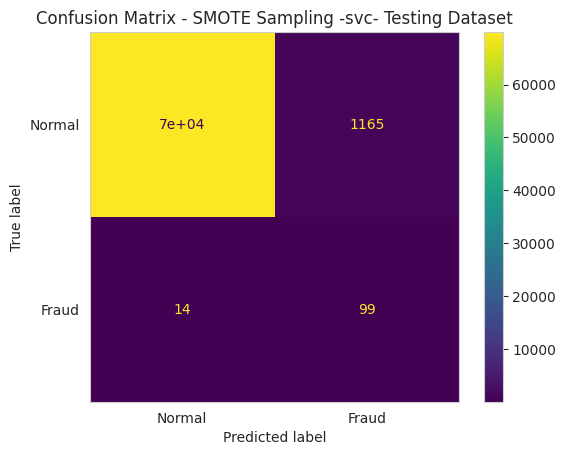

In [ ]:
confusion_matrix_smote_svc = confusion_matrix(y_test_smote,test_pred_smote_svc)

cm_display_smote_svc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_smote_svc, display_labels = ['Normal', 'Fraud'])

cm_display_smote_svc.plot()
plt.title("Confusion Matrix - SMOTE Sampling -svc- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

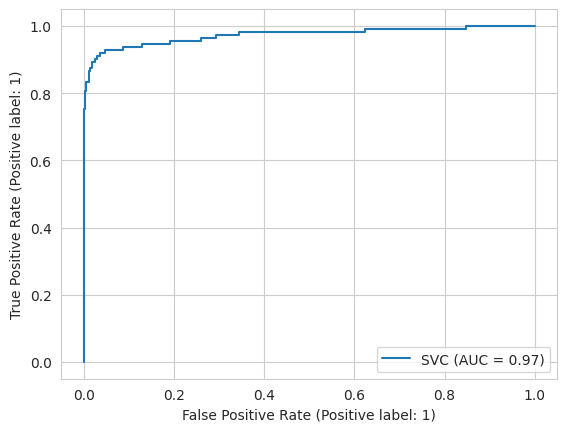

In [ ]:
Roc_display_smote_svc = RocCurveDisplay.from_estimator(svc_smote,X_test_smote,y_test_smote)

Class wise Accuracy

In [ ]:
pred_smote_test_svc = pd.DataFrame(y_test_smote)
pred_smote_test_svc['predicted'] = test_pred_smote_svc

pred_smote_test_svc

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_smote_test_cls0_svc = pred_smote_test_svc[pred_smote_test_svc['Class'] == 0]
pred_smote_test_cls1_svc = pred_smote_test_svc[pred_smote_test_svc['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_smote_svc = accuracy_score(pred_smote_test_cls0_svc['Class'],pred_smote_test_cls0_svc['predicted'])
test_precision_class0_smote_svc = precision_score(pred_smote_test_cls0_svc['Class'],pred_smote_test_cls0_svc['predicted'])
test_recall_class0_smote_svc = recall_score(pred_smote_test_cls0_svc['Class'],pred_smote_test_cls0_svc['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_smote_svc*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_smote_svc*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_smote_svc*100,2)," %")


Accuracy of Class 0:  98.36  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_smote_svc = accuracy_score(pred_smote_test_cls1_svc['Class'],pred_smote_test_cls1_svc['predicted'])
test_precision_class1_smote_svc = precision_score(pred_smote_test_cls1_svc['Class'],pred_smote_test_cls1_svc['predicted'])
test_recall_class1_smote_svc = recall_score(pred_smote_test_cls1_svc['Class'],pred_smote_test_cls1_svc['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_smote_svc*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_smote_svc*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_smote_svc*100,2)," %")


Accuracy of Class 1:  87.61  %
precision of Class 1:  100.0  %
recall of Class 1:  87.61  %


### Evaluation graphs

In [ ]:
Model = ["Logistic Regression","Random Forest","XGB Classifier","SVM Classifier"]

Accuracy Graph

In [ ]:
Acc_smote_train_cls0 = [train_accuracy_smote_class0_logistic,train_accuracy_smote_class0_RF,train_accuracy_smote_class0_xgb,train_accuracy_smote_class0_svc]
Acc_smote_test_cls0 = [test_accuracy_class0_smote_logistic,test_accuracy_class0_smote_RF,test_accuracy_class0_smote_xgb,test_accuracy_class0_smote_svc]
Acc_smote_train_cls1 = [train_accuracy_smote_class1_logistic,train_accuracy_smote_class1_RF,train_accuracy_smote_class1_xgb,train_accuracy_smote_class1_svc]
Acc_smote_test_cls1 = [test_accuracy_class1_smote_logistic,test_accuracy_class1_smote_RF,test_accuracy_class1_smote_xgb,test_accuracy_class1_smote_svc]

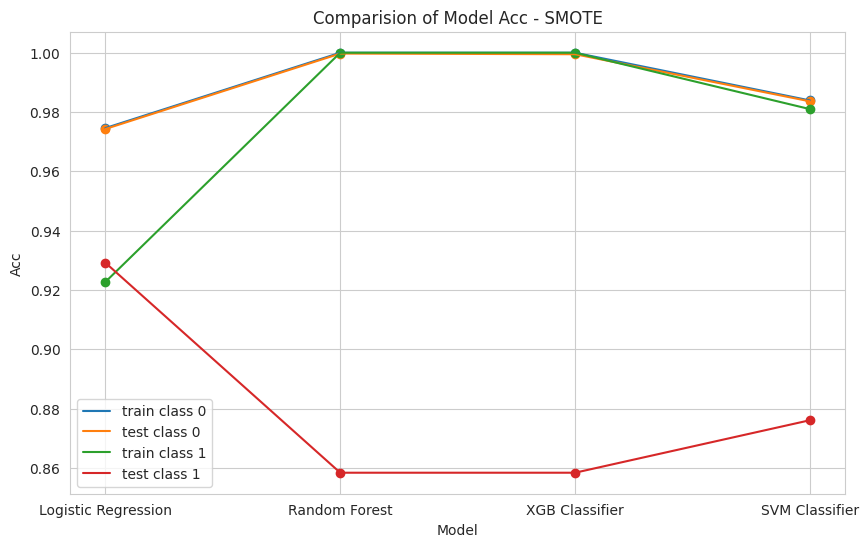

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Acc_smote_train_cls0, label = "train class 0")
plt.scatter(Model,Acc_smote_train_cls0)

plt.plot(Model,Acc_smote_test_cls0, label = "test class 0")
plt.scatter(Model,Acc_smote_test_cls0)

plt.plot(Model,Acc_smote_train_cls1, label = "train class 1")
plt.scatter(Model,Acc_smote_train_cls1)

plt.plot(Model,Acc_smote_test_cls1, label = "test class 1")
plt.scatter(Model,Acc_smote_test_cls1)

plt.ylabel("Acc")
plt.xlabel("Model")
plt.title("Comparision of Model Acc - SMOTE")
plt.legend()
plt.show()

Precision Graph

In [ ]:
Pre_smote_train_cls0 = [train_precision_smote_class0_logistic,train_precision_smote_class0_RF,train_precision_smote_class0_xgb,train_precision_smote_class0_svc]
Pre_smote_test_cls0 = [test_precision_class0_smote_logistic,test_precision_class0_smote_RF,test_precision_class0_smote_xgb,test_precision_class0_smote_svc]
Pre_smote_train_cls1 = [train_precision_smote_class1_logistic,train_precision_smote_class1_RF,train_precision_smote_class1_xgb,train_precision_smote_class1_svc]
Pre_smote_test_cls1 = [test_precision_class1_smote_logistic,test_precision_class1_smote_RF,test_precision_class1_smote_xgb,test_precision_class1_smote_svc]

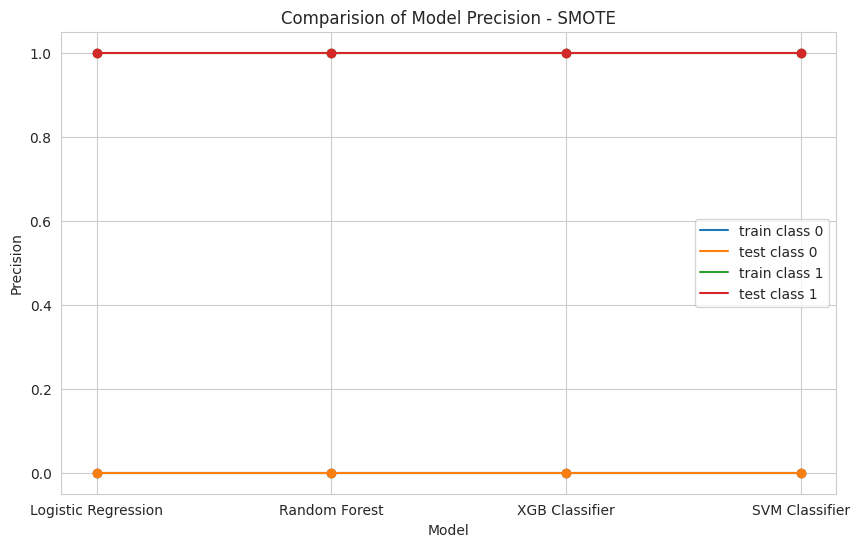

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Pre_smote_train_cls0, label = "train class 0")
plt.scatter(Model,Pre_smote_train_cls0)

plt.plot(Model,Pre_smote_test_cls0, label = "test class 0")
plt.scatter(Model,Pre_smote_test_cls0)

plt.plot(Model,Pre_smote_train_cls1, label = "train class 1")
plt.scatter(Model,Pre_smote_train_cls1)

plt.plot(Model,Pre_smote_test_cls1, label = "test class 1")
plt.scatter(Model,Pre_smote_test_cls1)

plt.ylabel("Precision")
plt.xlabel("Model")
plt.title("Comparision of Model Precision - SMOTE")
plt.legend()
plt.show()

Recall Graph

In [ ]:
Recall_smote_train_cls0 = [train_recall_smote_class0_logistic,train_recall_smote_class0_RF,train_recall_smote_class0_xgb,train_recall_smote_class0_svc]
Recall_smote_test_cls0 = [test_recall_class0_smote_logistic,test_recall_class0_smote_RF,test_recall_class0_smote_xgb,test_recall_class0_smote_svc]
Recall_smote_train_cls1 = [train_recall_smote_class1_logistic,train_recall_smote_class1_RF,train_recall_smote_class1_xgb,train_recall_smote_class1_svc]
Recall_smote_test_cls1 = [test_recall_class1_smote_logistic,test_recall_class1_smote_RF,test_recall_class1_smote_xgb,test_recall_class1_smote_svc]

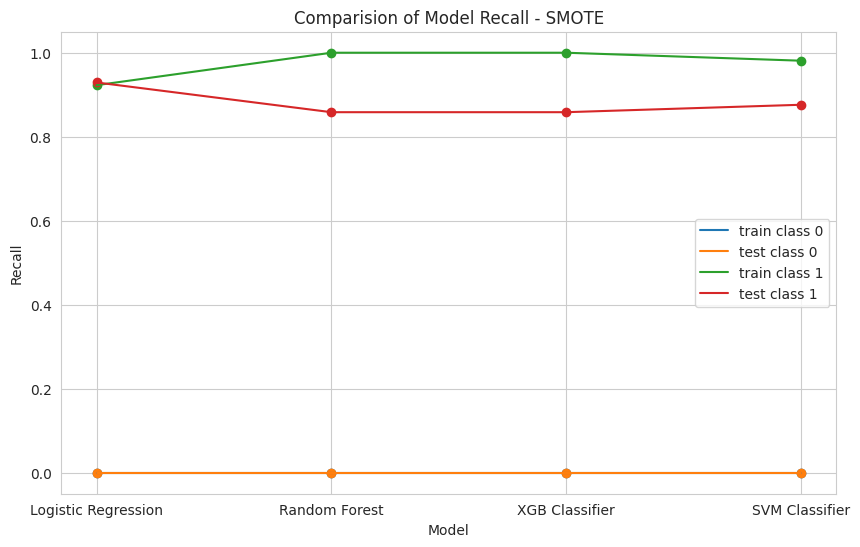

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Recall_smote_train_cls0, label = "train class 0")
plt.scatter(Model,Recall_smote_train_cls0)

plt.plot(Model,Recall_smote_test_cls0, label = "test class 0")
plt.scatter(Model,Recall_smote_test_cls0)

plt.plot(Model,Recall_smote_train_cls1, label = "train class 1")
plt.scatter(Model,Recall_smote_train_cls1)

plt.plot(Model,Recall_smote_test_cls1, label = "test class 1")
plt.scatter(Model,Recall_smote_test_cls1)

plt.ylabel("Recall")
plt.xlabel("Model")
plt.title("Comparision of Model Recall - SMOTE")
plt.legend()
plt.show()

# Combining Under-Sampling And Over-Sampling

## SMOTEENN technique

---

SMOTE + ENN

---

SMOTE (Synthetic Minority Over-sampling Technique) and Edited Nearest Neighbors (ENN)

In [ ]:
X_smote_enn = credit_df.drop("Class", axis="columns")
y_smote_enn = credit_df["Class"]

###Spliting into Train and Test Data

In [ ]:
X_train_smote_enn,X_test_smote_enn,y_train_smote_enn,y_test_smote_enn = train_test_split(X_smote_enn, y_smote_enn , test_size = 0.25,random_state = 42)

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
smote_enn = SMOTEENN(random_state = 42 )
X_train_smote_enn_resampled, y_train_smote_enn_resampled = smote_enn.fit_resample(X_train_smote_enn, y_train_smote_enn)

In [ ]:
X_train_smote_resampled

Amount_Scaled  Time_Scaled        V1        V2        V3        V4  \
0            0.229442    -0.293131 -1.648591  1.228130  1.370169 -1.735542   
1            0.547754    -0.458699 -0.234775 -0.493269  1.236728 -2.338793   
2            1.242926    -0.623985  1.134626 -0.774460 -0.163390 -0.533358   
3           -0.167680    -0.049777  0.069514  1.017753  1.033117  1.384376   
4            0.000000    -0.533253 -0.199441  0.610092 -0.114437  0.256565   
...               ...          ...       ...       ...       ...       ...   
426447       1.158370    -0.104515 -4.399400  3.199620 -4.865551  4.025221   
426448      -0.304101     0.625838  0.744948  3.392737 -6.011281  5.836315   
426449      -0.082351     0.214582  1.830229  0.362106 -0.379728  3.895474   
426450      -0.266042    -0.306621  0.336538  1.820070 -2.571036  3.439066   
426451       1.043226    -0.329631 -8.236401  2.747934 -7.806860  6.598550   

              V5        V6        V7        V8  ...       V19       V20  \
0      -0.029455 -0.484129  0.918645 -0.438750  ... -0.331603  0.384201   
1      -1.176733  0.885733 -1.960981 -2.363412  ... -1.635634  0.364679   
2      -0.604555 -0.244482 -0.212682  0.040782  ... -0.519459 -0.396476   
3       0.223233 -0.310845  0.597287 -0.127658  ...  1.561447  0.148760   
4       2.290752  4.008475 -0.123530  1.038374  ...  1.375281  0.292972   
...          ...       ...       ...       ...  ...       ...       ...   
426447 -3.514641 -1.791849 -4.945036  1.837274  ...  2.015158  0.327371   
426448  1.609077 -1.772445 -0.988565  0.457815  ... -1.026015  0.347824   
426449  0.695744  1.290445 -0.354359  0.229528  ... -1.789408 -0.355317   
426450 -0.748656 -1.227233 -2.124525  0.567179  ... -0.108083  0.298887   
426451 -5.383040 -0.342528 -9.072851  1.392083  ...  2.022969 -0.554652   

             V21       V22       V23       V24       V25       V26       V27  \
0      -0.218076 -0.203458 -0.213015  0.011372 -0.304481  0.632063 -0.262968   
1      -1.495358 -0.083066  0.074612 -0.347329  0.541900 -0.433294  0.089293   
2      -0.684454 -1.855269  0.171997 -0.387783 -0.062985  0.245118 -0.061178   
3       0.097023  0.369957 -0.219266 -0.124941 -0.049749 -0.112946  0.114440   
4      -0.019733  0.165463 -0.080978  1.020656 -0.300730 -0.269595  0.481769   
...          ...       ...       ...       ...       ...       ...       ...   
426447  1.144297  0.327644 -0.213067  0.172842 -0.036296 -0.233090  0.387298   
426448  0.152228 -0.792318 -0.132478 -0.359929  0.228149  0.216943  0.455950   
426449 -0.088539  0.149906  0.160602 -0.581516 -0.111556  0.012840 -0.023417   
426450  0.368643 -0.381567 -0.184123 -0.158542  0.726614 -0.019362  0.560470   
426451  0.012248  0.802923  0.215435 -0.427165 -0.147023  0.258931  0.247746   

             V28  
0      -0.099863  
1       0.212029  
2       0.012180  
3       0.066101  
4       0.254114  
...          ...  
426447  0.828801  
426448  0.292131  
426449 -0.059271  
426450  0.314052  
426451 -0.125058  

[426452 rows x 30 columns]

In [ ]:
y_train_smote_enn.value_counts()

0    213226
1       379
Name: Class, dtype: int64

###Model Training

####Logistic Regression Model

In [ ]:
Logistic_Regression_smote_enn = LogisticRegression()

Training Dataset

In [ ]:
Logistic_Regression_smote_enn.fit(X_train_smote_enn_resampled,y_train_smote_enn_resampled)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

#####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_smote_enn_logistic = Logistic_Regression_smote_enn.predict(X_train_smote_enn_resampled)
train_accuracy_smote_enn_logistic = accuracy_score(y_train_smote_enn_resampled,train_pred_smote_enn_logistic)
train_precision_smote_enn_logistic = precision_score(y_train_smote_enn_resampled,train_pred_smote_enn_logistic)
train_recall_smote_enn_logistic = recall_score(y_train_smote_enn_resampled,train_pred_smote_enn_logistic)

print("Accuracy on Training Data is: ",round(train_accuracy_smote_enn_logistic*100,2)," %")
print("precision on Training Data is: ",round(train_precision_smote_enn_logistic*100,2)," %")
print("recall on Training Data is: ",round(train_recall_smote_enn_logistic*100,2)," %")

Accuracy on Training Data is:  94.95  %
precision on Training Data is:  97.31  %
recall on Training Data is:  92.46  %


Classwise Accuracy

In [ ]:
pred_smote_enn_train_logistic = pd.DataFrame(y_train_smote_enn_resampled)
pred_smote_enn_train_logistic['predicted'] = train_pred_smote_enn_logistic
pred_smote_enn_train_logistic

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
426054      1          1
426055      1          1
426056      1          0
426057      1          1
426058      1          1

[426059 rows x 2 columns]

In [ ]:
pred_smote_enn_train_cls0_logistic = pred_smote_enn_train_logistic[pred_smote_enn_train_logistic['Class'] == 0]
pred_smote_enn_train_cls1_logistic = pred_smote_enn_train_logistic[pred_smote_enn_train_logistic['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_smote_enn_class0_logistic = accuracy_score(pred_smote_enn_train_cls0_logistic['Class'],pred_smote_enn_train_cls0_logistic['predicted'])
train_precision_smote_enn_class0_logistic = precision_score(pred_smote_enn_train_cls0_logistic['Class'],pred_smote_enn_train_cls0_logistic['predicted'])
train_recall_smote_enn_class0_logistic = recall_score(pred_smote_enn_train_cls0_logistic['Class'],pred_smote_enn_train_cls0_logistic['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_smote_enn_class0_logistic*100,2)," %")
print("precision of Class 0: ",round(train_precision_smote_enn_class0_logistic*100,2)," %")
print("recall of Class 0: ",round(train_recall_smote_enn_class0_logistic*100,2)," %")

Accuracy of Class 0:  97.43  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_smote_enn_class1_logistic = accuracy_score(pred_smote_enn_train_cls1_logistic['Class'],pred_smote_enn_train_cls1_logistic['predicted'])
train_precision_smote_enn_class1_logistic = precision_score(pred_smote_enn_train_cls1_logistic['Class'],pred_smote_enn_train_cls1_logistic['predicted'])
train_recall_smote_enn_class1_logistic = recall_score(pred_smote_enn_train_cls1_logistic['Class'],pred_smote_enn_train_cls1_logistic['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_smote_enn_class1_logistic*100,2)," %")
print("precision of Class 1: ",round(train_precision_smote_enn_class1_logistic*100,2)," %")
print("recall of Class 1: ",round(train_recall_smote_enn_class1_logistic*100,2)," %")


Accuracy of Class 1:  92.46  %
precision of Class 1:  100.0  %
recall of Class 1:  92.46  %


On Testing Data

In [ ]:
test_pred_smote_enn_logistic = Logistic_Regression_smote_enn.predict(X_test_smote_enn)
test_accuracy1_smote_enn_logistic = accuracy_score(y_test_smote_enn,test_pred_smote_enn_logistic)
test_precision1_smote_enn_logistic = precision_score(y_test_smote_enn,test_pred_smote_enn_logistic)
test_recall1_smote_enn_logistic = recall_score(y_test_smote_enn,test_pred_smote_enn_logistic)


print("Accuracy on Testing Data is: ",round(test_accuracy1_smote_enn_logistic*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_smote_enn_logistic*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_smote_enn_logistic*100,2)," %")


Accuracy on Testing Data is:  97.27  %
precision on Testing Data is:  5.15  %
recall on Testing Data is:  92.92  %


Confusion Matrix

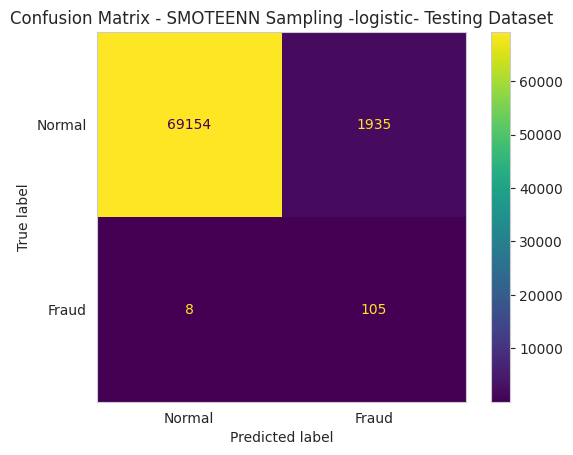

In [ ]:
confusion_matrix_smote_enn_logistic = confusion_matrix(y_test_smote_enn,test_pred_smote_enn_logistic)

cm_display_smote_enn_logistic = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_smote_enn_logistic, display_labels = ['Normal', 'Fraud'])

cm_display_smote_enn_logistic.plot()
plt.title("Confusion Matrix - SMOTEENN Sampling -logistic- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

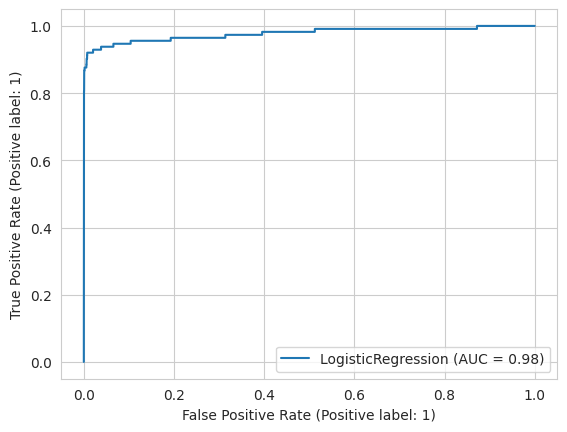

In [ ]:
Roc_display_smote_enn_logistic = RocCurveDisplay.from_estimator(Logistic_Regression_smote_enn,X_test_smote_enn,y_test_smote_enn)

Class wise Accuracy

In [ ]:
pred_smote_enn_test_logistic = pd.DataFrame(y_test_smote_enn)
pred_smote_enn_test_logistic['predicted'] = test_pred_smote_enn_logistic

pred_smote_enn_test_logistic

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_smote_enn_test_cls0_logistic = pred_smote_enn_test_logistic[pred_smote_enn_test_logistic['Class'] == 0]
pred_smote_enn_test_cls1_logistic = pred_smote_enn_test_logistic[pred_smote_enn_test_logistic['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_smote_enn_logistic = accuracy_score(pred_smote_enn_test_cls0_logistic['Class'],pred_smote_enn_test_cls0_logistic['predicted'])
test_precision_class0_smote_enn_logistic = precision_score(pred_smote_enn_test_cls0_logistic['Class'],pred_smote_enn_test_cls0_logistic['predicted'])
test_recall_class0_smote_enn_logistic = recall_score(pred_smote_enn_test_cls0_logistic['Class'],pred_smote_enn_test_cls0_logistic['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_smote_enn_logistic*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_smote_enn_logistic*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_smote_enn_logistic*100,2)," %")


Accuracy of Class 0:  97.28  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_smote_enn_logistic = accuracy_score(pred_smote_enn_test_cls1_logistic['Class'],pred_smote_enn_test_cls1_logistic['predicted'])
test_precision_class1_smote_enn_logistic = precision_score(pred_smote_enn_test_cls1_logistic['Class'],pred_smote_enn_test_cls1_logistic['predicted'])
test_recall_class1_smote_enn_logistic = recall_score(pred_smote_enn_test_cls1_logistic['Class'],pred_smote_enn_test_cls1_logistic['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_smote_enn_logistic*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_smote_enn_logistic*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_smote_enn_logistic*100,2)," %")


Accuracy of Class 1:  92.92  %
precision of Class 1:  100.0  %
recall of Class 1:  92.92  %


#### Random Forest Classifier

In [ ]:
Random_Forest_smote_enn = RandomForestClassifier()

Training Dataset

In [ ]:
Random_Forest_smote_enn.fit(X_train_smote_enn_resampled,y_train_smote_enn_resampled)

RandomForestClassifier()

#####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_smote_enn_RF = Random_Forest_smote_enn.predict(X_train_smote_enn_resampled)
train_accuracy_smote_enn_RF = accuracy_score(y_train_smote_enn_resampled,train_pred_smote_enn_RF)
train_precision_smote_enn_RF = precision_score(y_train_smote_enn_resampled,train_pred_smote_enn_RF)
train_recall_smote_enn_RF = recall_score(y_train_smote_enn_resampled,train_pred_smote_enn_RF)


print("Accuracy on Training Data is: ",round(train_accuracy_smote_enn_RF*100,2)," %")
print("precision on Training Data is: ",round(train_precision_smote_enn_RF*100,2)," %")
print("recall on Training Data is: ",round(train_recall_smote_enn_RF*100,2)," %")


Accuracy on Training Data is:  100.0  %
precision on Training Data is:  100.0  %
recall on Training Data is:  100.0  %


Classwise Accuracy

In [ ]:
pred_smote_enn_train_RF = pd.DataFrame(y_train_smote_enn_resampled)
pred_smote_enn_train_RF['predicted'] = train_pred_smote_enn_RF
pred_smote_enn_train_RF

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
426054      1          1
426055      1          1
426056      1          1
426057      1          1
426058      1          1

[426059 rows x 2 columns]

In [ ]:
pred_smote_enn_train_cls0_RF = pred_smote_enn_train_RF[pred_smote_enn_train_RF['Class'] == 0]
pred_smote_enn_train_cls1_RF = pred_smote_enn_train_RF[pred_smote_enn_train_RF['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_smote_enn_class0_RF = accuracy_score(pred_smote_enn_train_cls0_RF['Class'],pred_smote_enn_train_cls0_RF['predicted'])
train_precision_smote_enn_class0_RF = precision_score(pred_smote_enn_train_cls0_RF['Class'],pred_smote_enn_train_cls0_RF['predicted'])
train_recall_smote_enn_class0_RF = recall_score(pred_smote_enn_train_cls0_RF['Class'],pred_smote_enn_train_cls0_RF['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_smote_enn_class0_RF*100,2)," %")
print("precision of Class 0: ",round(train_precision_smote_enn_class0_RF*100,2)," %")
print("recall of Class 0: ",round(train_recall_smote_enn_class0_RF*100,2)," %")


Accuracy of Class 0:  100.0  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_smote_enn_class1_RF = accuracy_score(pred_smote_enn_train_cls1_RF['Class'],pred_smote_enn_train_cls1_RF['predicted'])
train_precision_smote_enn_class1_RF = precision_score(pred_smote_enn_train_cls1_RF['Class'],pred_smote_enn_train_cls1_RF['predicted'])
train_recall_smote_enn_class1_RF = recall_score(pred_smote_enn_train_cls1_RF['Class'],pred_smote_enn_train_cls1_RF['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_smote_enn_class1_RF*100,2)," %")
print("precision of Class 1: ",round(train_precision_smote_enn_class1_RF*100,2)," %")
print("recall of Class 1: ",round(train_recall_smote_enn_class1_RF*100,2)," %")


Accuracy of Class 1:  100.0  %
precision of Class 1:  100.0  %
recall of Class 1:  100.0  %


On Testing Data

In [ ]:
test_pred_smote_enn_RF = Random_Forest_smote_enn.predict(X_test_smote_enn)
test_accuracy1_smote_enn_RF = accuracy_score(y_test_smote_enn,test_pred_smote_enn_RF)
test_precision1_smote_enn_RF = precision_score(y_test_smote_enn,test_pred_smote_enn_RF)
test_recall1_smote_enn_RF = recall_score(y_test_smote_enn,test_pred_smote_enn_RF)


print("Accuracy on Testing Data is: ",round(test_accuracy1_smote_enn_RF*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_smote_enn_RF*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_smote_enn_RF*100,2)," %")


Accuracy on Testing Data is:  99.94  %
precision on Testing Data is:  76.98  %
precision on Testing Data is:  76.98  %


Confusion Matrix

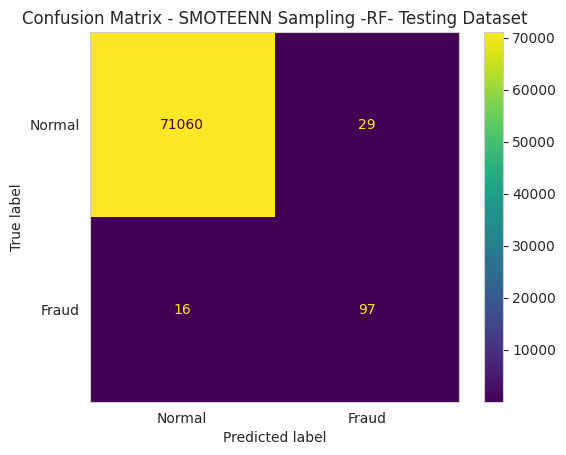

In [ ]:
confusion_matrix_smote_enn_RF = confusion_matrix(y_test_smote_enn,test_pred_smote_enn_RF)

cm_display_smote_enn_RF = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_smote_enn_RF, display_labels = ['Normal', 'Fraud'])

cm_display_smote_enn_RF.plot()
plt.title("Confusion Matrix - SMOTEENN Sampling -RF- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

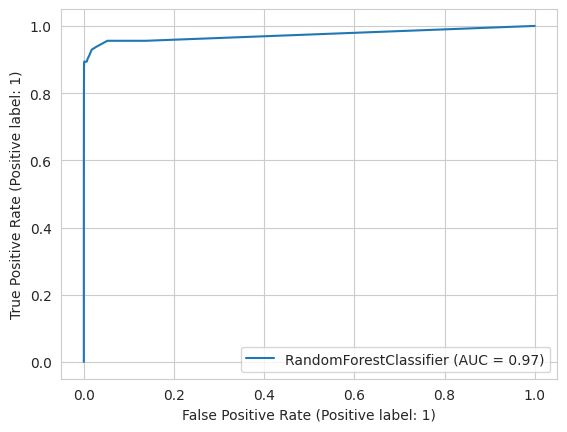

In [ ]:
Roc_display_smote_enn_RF = RocCurveDisplay.from_estimator(Random_Forest_smote_enn,X_test_smote_enn,y_test_smote_enn)

Class wise Accuracy

In [ ]:
pred_smote_enn_test_RF = pd.DataFrame(y_test_smote_enn)
pred_smote_enn_test_RF['predicted'] = test_pred_smote_enn_RF

pred_smote_enn_test_RF

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_smote_enn_test_cls0_RF = pred_smote_enn_test_RF[pred_smote_enn_test_RF['Class'] == 0]
pred_smote_enn_test_cls1_RF = pred_smote_enn_test_RF[pred_smote_enn_test_RF['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_smote_enn_RF = accuracy_score(pred_smote_enn_test_cls0_RF['Class'],pred_smote_enn_test_cls0_RF['predicted'])
test_precision_class0_smote_enn_RF = precision_score(pred_smote_enn_test_cls0_RF['Class'],pred_smote_enn_test_cls0_RF['predicted'])
test_recall_class0_smote_enn_RF = recall_score(pred_smote_enn_test_cls0_RF['Class'],pred_smote_enn_test_cls0_RF['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_smote_enn_RF*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_smote_enn_RF*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_smote_enn_RF*100,2)," %")


Accuracy of Class 0:  99.96  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_smote_enn_RF = accuracy_score(pred_smote_enn_test_cls1_RF['Class'],pred_smote_enn_test_cls1_RF['predicted'])
test_precision_class1_smote_enn_RF = precision_score(pred_smote_enn_test_cls1_RF['Class'],pred_smote_enn_test_cls1_RF['predicted'])
test_recall_class1_smote_enn_RF = recall_score(pred_smote_enn_test_cls1_RF['Class'],pred_smote_enn_test_cls1_RF['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_smote_enn_RF*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_smote_enn_RF*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_smote_enn_RF*100,2)," %")


Accuracy of Class 1:  85.84  %
precision of Class 1:  100.0  %
recall of Class 1:  85.84  %


#### Xtreme Gradient Boosting Classifier (XGBClassifier) 

In [ ]:
import xgboost as xgb

In [ ]:
xgb_smote_enn = xgb.XGBClassifier(objective="binary:logistic")

Training Dataset

In [ ]:
xgb_smote_enn.fit(X_train_smote_enn_resampled,y_train_smote_enn_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

##### Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_smote_enn_xgb = xgb_smote_enn.predict(X_train_smote_enn_resampled)
train_accuracy_smote_enn_xgb = accuracy_score(y_train_smote_enn_resampled,train_pred_smote_enn_xgb)
train_precision_smote_enn_xgb = precision_score(y_train_smote_enn_resampled,train_pred_smote_enn_xgb)
train_recall_smote_enn_xgb = recall_score(y_train_smote_enn_resampled,train_pred_smote_enn_xgb)


print("Accuracy on Training Data is: ",round(train_accuracy_smote_enn_xgb*100,2)," %")
print("precision on Training Data is: ",round(train_precision_smote_enn_xgb*100,2)," %")
print("recall on Training Data is: ",round(train_recall_smote_enn_xgb*100,2)," %")


Accuracy on Training Data is:  100.0  %
precision on Training Data is:  100.0  %
recall on Training Data is:  100.0  %


Classwise Accuracy

In [ ]:
pred_smote_enn_train_xgb = pd.DataFrame(y_train_smote_enn_resampled)
pred_smote_enn_train_xgb['predicted'] = train_pred_smote_enn_xgb
pred_smote_enn_train_xgb

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
426054      1          1
426055      1          1
426056      1          1
426057      1          1
426058      1          1

[426059 rows x 2 columns]

In [ ]:
pred_smote_enn_train_cls0_xgb = pred_smote_enn_train_xgb[pred_smote_enn_train_xgb['Class'] == 0]
pred_smote_enn_train_cls1_xgb = pred_smote_enn_train_xgb[pred_smote_enn_train_xgb['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_smote_enn_class0_xgb = accuracy_score(pred_smote_enn_train_cls0_xgb['Class'],pred_smote_enn_train_cls0_xgb['predicted'])
train_precision_smote_enn_class0_xgb = precision_score(pred_smote_enn_train_cls0_xgb['Class'],pred_smote_enn_train_cls0_xgb['predicted'])
train_recall_smote_enn_class0_xgb = recall_score(pred_smote_enn_train_cls0_xgb['Class'],pred_smote_enn_train_cls0_xgb['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_smote_enn_class0_xgb*100,2)," %")
print("precision of Class 0: ",round(train_precision_smote_enn_class0_xgb*100,2)," %")
print("recall of Class 0: ",round(train_recall_smote_enn_class0_xgb*100,2)," %")


Accuracy of Class 0:  100.0  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_smote_enn_class1_xgb = accuracy_score(pred_smote_enn_train_cls1_xgb['Class'],pred_smote_enn_train_cls1_xgb['predicted'])
train_precision_smote_enn_class1_xgb = precision_score(pred_smote_enn_train_cls1_xgb['Class'],pred_smote_enn_train_cls1_xgb['predicted'])
train_recall_smote_enn_class1_xgb = recall_score(pred_smote_enn_train_cls1_xgb['Class'],pred_smote_enn_train_cls1_xgb['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_smote_enn_class1_xgb*100,2)," %")
print("precision of Class 1: ",round(train_precision_smote_enn_class1_xgb*100,2)," %")
print("recall of Class 1: ",round(train_recall_smote_enn_class1_xgb*100,2)," %")


Accuracy of Class 1:  100.0  %
precision of Class 1:  100.0  %
recall of Class 1:  100.0  %


On Testing Data

In [ ]:
test_pred_smote_enn_xgb = xgb_smote_enn.predict(X_test_smote_enn)
test_accuracy1_smote_enn_xgb = accuracy_score(y_test_smote_enn,test_pred_smote_enn_xgb)
test_precision1_smote_enn_xgb = precision_score(y_test_smote_enn,test_pred_smote_enn_xgb)
test_recall1_smote_enn_xgb = recall_score(y_test_smote_enn,test_pred_smote_enn_xgb)


print("Accuracy on Testing Data is: ",round(test_accuracy1_smote_enn_xgb*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_smote_enn_xgb*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_smote_enn_xgb*100,2)," %")


Accuracy on Testing Data is:  99.9  %
precision on Testing Data is:  64.05  %
recall on Testing Data is:  86.73  %


Confusion Matrix

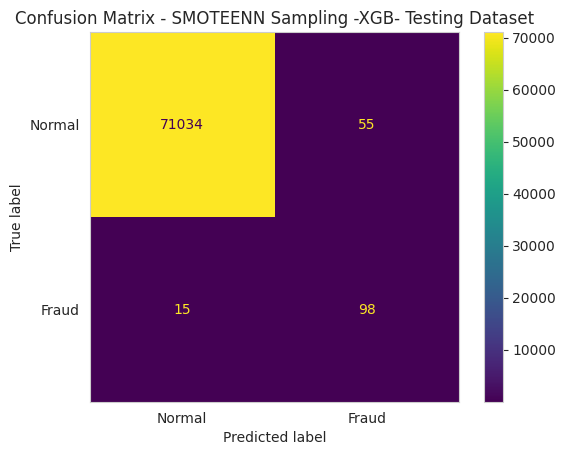

In [ ]:
confusion_matrix_smote_enn_xgb = confusion_matrix(y_test_smote_enn,test_pred_smote_enn_xgb)

cm_display_smote_enn_xgb = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_smote_enn_xgb, display_labels = ['Normal', 'Fraud'])

cm_display_smote_enn_xgb.plot()
plt.title("Confusion Matrix - SMOTEENN Sampling -XGB- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

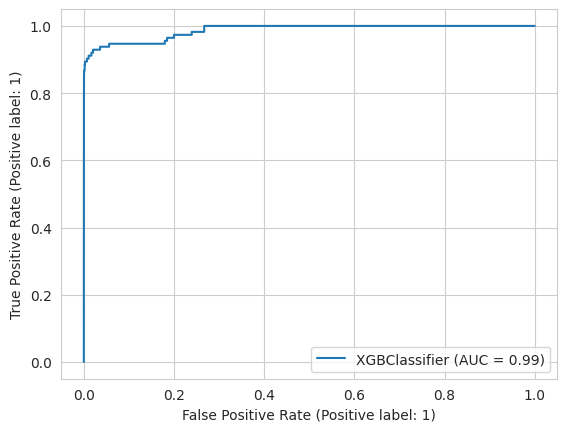

In [ ]:
Roc_display_smote_enn_xgb = RocCurveDisplay.from_estimator(xgb_smote_enn,X_test_smote_enn,y_test_smote_enn)

Class wise Accuracy

In [ ]:
pred_smote_enn_test_xgb = pd.DataFrame(y_test_smote_enn)
pred_smote_enn_test_xgb['predicted'] = test_pred_smote_enn_xgb

pred_smote_enn_test_xgb

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_smote_enn_test_cls0_xgb = pred_smote_enn_test_xgb[pred_smote_enn_test_xgb['Class'] == 0]
pred_smote_enn_test_cls1_xgb = pred_smote_enn_test_xgb[pred_smote_enn_test_xgb['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_smote_enn_xgb = accuracy_score(pred_smote_enn_test_cls0_xgb['Class'],pred_smote_enn_test_cls0_xgb['predicted'])
test_precision_class0_smote_enn_xgb = precision_score(pred_smote_enn_test_cls0_xgb['Class'],pred_smote_enn_test_cls0_xgb['predicted'])
test_recall_class0_smote_enn_xgb = recall_score(pred_smote_enn_test_cls0_xgb['Class'],pred_smote_enn_test_cls0_xgb['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_smote_enn_xgb*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_smote_enn_xgb*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_smote_enn_xgb*100,2)," %")


Accuracy of Class 0:  99.92  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_smote_enn_xgb = accuracy_score(pred_smote_enn_test_cls1_xgb['Class'],pred_smote_enn_test_cls1_xgb['predicted'])
test_precision_class1_smote_enn_xgb = precision_score(pred_smote_enn_test_cls1_xgb['Class'],pred_smote_enn_test_cls1_xgb['predicted'])
test_recall_class1_smote_enn_xgb = recall_score(pred_smote_enn_test_cls1_xgb['Class'],pred_smote_enn_test_cls1_xgb['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_smote_enn_xgb*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_smote_enn_xgb*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_smote_enn_xgb*100,2)," %")


Accuracy of Class 1:  86.73  %
precision of Class 1:  100.0  %
recall of Class 1:  86.73  %


#### Support Vector Machine Classifier





In [ ]:
svc_smote_enn = SVC()

Training Dataset

In [ ]:
svc_smote_enn.fit(X_train_smote_enn_resampled,y_train_smote_enn_resampled)

SVC()

#####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_smote_enn_svc = svc_smote_enn.predict(X_train_smote_enn_resampled)
train_accuracy_smote_enn_svc = accuracy_score(y_train_smote_enn_resampled,train_pred_smote_enn_svc)
train_precision_smote_enn_svc = precision_score(y_train_smote_enn_resampled,train_pred_smote_enn_svc)
train_recall_smote_enn_svc = recall_score(y_train_smote_enn_resampled,train_pred_smote_enn_svc)

print("Accuracy on Training Data is: ",round(train_accuracy_smote_enn_svc*100,2)," %")
print("precision on Training Data is: ",round(train_precision_smote_enn_svc*100,2)," %")
print("recall on Training Data is: ",round(train_recall_smote_enn_svc*100,2)," %")

Accuracy on Training Data is:  98.29  %
precision on Training Data is:  98.47  %
recall on Training Data is:  98.11  %


Classwise Accuracy

In [ ]:
pred_smote_enn_train_svc = pd.DataFrame(y_train_smote_enn_resampled)
pred_smote_enn_train_svc['predicted'] = train_pred_smote_enn_svc
pred_smote_enn_train_svc

Class  predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
426054      1          1
426055      1          1
426056      1          1
426057      1          1
426058      1          1

[426059 rows x 2 columns]

In [ ]:
pred_smote_enn_train_cls0_svc = pred_smote_enn_train_svc[pred_smote_enn_train_svc['Class'] == 0]
pred_smote_enn_train_cls1_svc = pred_smote_enn_train_svc[pred_smote_enn_train_svc['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_smote_enn_class0_svc = accuracy_score(pred_smote_enn_train_cls0_svc['Class'],pred_smote_enn_train_cls0_svc['predicted'])
train_precision_smote_enn_class0_svc = precision_score(pred_smote_enn_train_cls0_svc['Class'],pred_smote_enn_train_cls0_svc['predicted'])
train_recall_smote_enn_class0_svc = recall_score(pred_smote_enn_train_cls0_svc['Class'],pred_smote_enn_train_cls0_svc['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_smote_enn_class0_svc*100,2)," %")
print("precision of Class 0: ",round(train_precision_smote_enn_class0_svc*100,2)," %")
print("recall of Class 0: ",round(train_recall_smote_enn_class0_svc*100,2)," %")

Accuracy of Class 0:  98.47  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_smote_enn_class1_svc = accuracy_score(pred_smote_enn_train_cls1_svc['Class'],pred_smote_enn_train_cls1_svc['predicted'])
train_precision_smote_enn_class1_svc = precision_score(pred_smote_enn_train_cls1_svc['Class'],pred_smote_enn_train_cls1_svc['predicted'])
train_recall_smote_enn_class1_svc = recall_score(pred_smote_enn_train_cls1_svc['Class'],pred_smote_enn_train_cls1_svc['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_smote_enn_class1_svc*100,2)," %")
print("precision of Class 1: ",round(train_precision_smote_enn_class1_svc*100,2)," %")
print("recall of Class 1: ",round(train_recall_smote_enn_class1_svc*100,2)," %")


Accuracy of Class 1:  98.11  %
precision of Class 1:  100.0  %
recall of Class 1:  98.11  %


On Testing Data

In [ ]:
test_pred_smote_enn_svc = svc_smote_enn.predict(X_test_smote_enn)
test_accuracy1_smote_enn_svc = accuracy_score(y_test_smote_enn,test_pred_smote_enn_svc)
test_precision1_smote_enn_svc = precision_score(y_test_smote_enn,test_pred_smote_enn_svc)
test_recall1_smote_enn_svc = recall_score(y_test_smote_enn,test_pred_smote_enn_svc)


print("Accuracy on Testing Data is: ",round(test_accuracy1_smote_enn_svc*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_smote_enn_svc*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_smote_enn_svc*100,2)," %")


Accuracy on Testing Data is:  98.31  %
precision on Testing Data is:  7.73  %
recall on Testing Data is:  88.5  %


Confusion Matrix

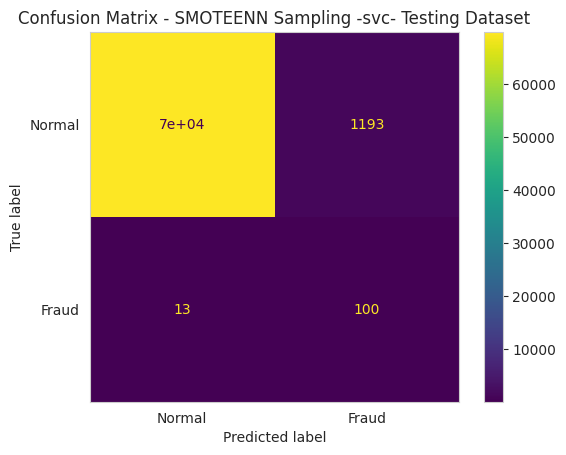

In [ ]:
confusion_matrix_smote_enn_svc = confusion_matrix(y_test_smote_enn,test_pred_smote_enn_svc)

cm_display_smote_enn_svc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_smote_enn_svc, display_labels = ['Normal', 'Fraud'])

cm_display_smote_enn_svc.plot()
plt.title("Confusion Matrix - SMOTEENN Sampling -svc- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

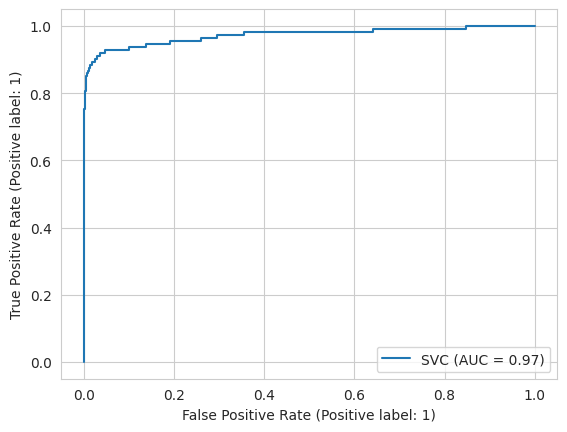

In [ ]:
Roc_display_smote_enn_svc = RocCurveDisplay.from_estimator(svc_smote_enn,X_test_smote_enn,y_test_smote_enn)

Class wise Accuracy

In [ ]:
pred_smote_enn_test_svc = pd.DataFrame(y_test_smote_enn)
pred_smote_enn_test_svc['predicted'] = test_pred_smote_enn_svc

pred_smote_enn_test_svc

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_smote_enn_test_cls0_svc = pred_smote_enn_test_svc[pred_smote_enn_test_svc['Class'] == 0]
pred_smote_enn_test_cls1_svc = pred_smote_enn_test_svc[pred_smote_enn_test_svc['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_smote_enn_svc = accuracy_score(pred_smote_enn_test_cls0_svc['Class'],pred_smote_enn_test_cls0_svc['predicted'])
test_precision_class0_smote_enn_svc = precision_score(pred_smote_enn_test_cls0_svc['Class'],pred_smote_enn_test_cls0_svc['predicted'])
test_recall_class0_smote_enn_svc = recall_score(pred_smote_enn_test_cls0_svc['Class'],pred_smote_enn_test_cls0_svc['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_smote_enn_svc*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_smote_enn_svc*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_smote_enn_svc*100,2)," %")


Accuracy of Class 0:  98.32  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_smote_enn_svc = accuracy_score(pred_smote_enn_test_cls1_svc['Class'],pred_smote_enn_test_cls1_svc['predicted'])
test_precision_class1_smote_enn_svc = precision_score(pred_smote_enn_test_cls1_svc['Class'],pred_smote_enn_test_cls1_svc['predicted'])
test_recall_class1_smote_enn_svc = recall_score(pred_smote_enn_test_cls1_svc['Class'],pred_smote_enn_test_cls1_svc['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_smote_enn_svc*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_smote_enn_svc*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_smote_enn_svc*100,2)," %")


Accuracy of Class 1:  88.5  %
precision of Class 1:  100.0  %
recall of Class 1:  88.5  %


### Evaluation graphs

In [ ]:
Model = ["Logistic Regression","Random Forest","XGB Classifier","SVM Classifier"]

Accuracy Graph

In [ ]:
Acc_smote_enn_train_cls0 = [train_accuracy_smote_enn_class0_logistic,train_accuracy_smote_enn_class0_RF,train_accuracy_smote_enn_class0_xgb,train_accuracy_smote_enn_class0_svc]
Acc_smote_enn_test_cls0 = [test_accuracy_class0_smote_enn_logistic,test_accuracy_class0_smote_enn_RF,test_accuracy_class0_smote_enn_xgb,test_accuracy_class0_smote_enn_svc]
Acc_smote_enn_train_cls1 = [train_accuracy_smote_enn_class1_logistic,train_accuracy_smote_enn_class1_RF,train_accuracy_smote_enn_class1_xgb,train_accuracy_smote_enn_class1_svc]
Acc_smote_enn_test_cls1 = [test_accuracy_class1_smote_enn_logistic,test_accuracy_class1_smote_enn_RF,test_accuracy_class1_smote_enn_xgb,test_accuracy_class1_smote_enn_svc]

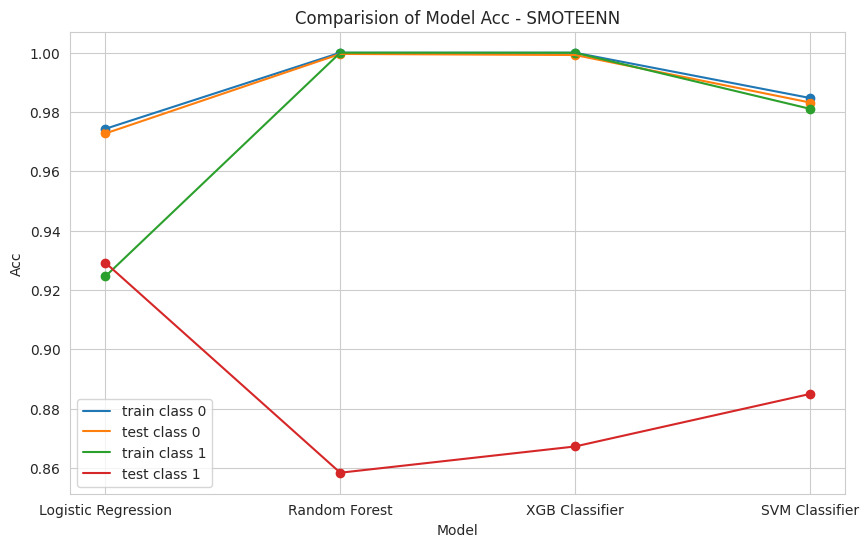

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Acc_smote_enn_train_cls0, label = "train class 0")
plt.scatter(Model,Acc_smote_enn_train_cls0)

plt.plot(Model,Acc_smote_enn_test_cls0, label = "test class 0")
plt.scatter(Model,Acc_smote_enn_test_cls0)

plt.plot(Model,Acc_smote_enn_train_cls1, label = "train class 1")
plt.scatter(Model,Acc_smote_enn_train_cls1)

plt.plot(Model,Acc_smote_enn_test_cls1, label = "test class 1")
plt.scatter(Model,Acc_smote_enn_test_cls1)

plt.ylabel("Acc")
plt.xlabel("Model")
plt.title("Comparision of Model Acc - SMOTEENN")
plt.legend()
plt.show()

Precision Graph

In [ ]:
Pre_smote_enn_train_cls0 = [train_precision_smote_enn_class0_logistic,train_precision_smote_enn_class0_RF,train_precision_smote_enn_class0_xgb,train_precision_smote_enn_class0_svc]
Pre_smote_enn_test_cls0 = [test_precision_class0_smote_enn_logistic,test_precision_class0_smote_enn_RF,test_precision_class0_smote_enn_xgb,test_precision_class0_smote_enn_svc]
Pre_smote_enn_train_cls1 = [train_precision_smote_enn_class1_logistic,train_precision_smote_enn_class1_RF,train_precision_smote_enn_class1_xgb,train_precision_smote_enn_class1_svc]
Pre_smote_enn_test_cls1 = [test_precision_class1_smote_enn_logistic,test_precision_class1_smote_enn_RF,test_precision_class1_smote_enn_xgb,test_precision_class1_smote_enn_svc]

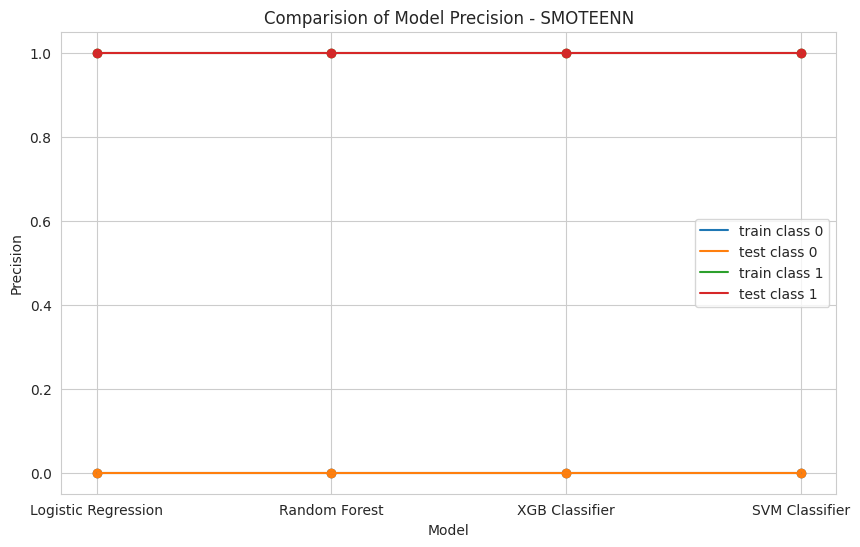

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Pre_smote_enn_train_cls0, label = "train class 0")
plt.scatter(Model,Pre_smote_enn_train_cls0)

plt.plot(Model,Pre_smote_enn_test_cls0, label = "test class 0")
plt.scatter(Model,Pre_smote_enn_test_cls0)

plt.plot(Model,Pre_smote_enn_train_cls1, label = "train class 1")
plt.scatter(Model,Pre_smote_enn_train_cls1)

plt.plot(Model,Pre_smote_enn_test_cls1, label = "test class 1")
plt.scatter(Model,Pre_smote_enn_test_cls1)

plt.ylabel("Precision")
plt.xlabel("Model")
plt.title("Comparision of Model Precision - SMOTEENN")
plt.legend()
plt.show()

Recall Graph

In [ ]:
Recall_smote_enn_train_cls0 = [train_recall_smote_enn_class0_logistic,train_recall_smote_enn_class0_RF,train_recall_smote_enn_class0_xgb,train_recall_smote_enn_class0_svc]
Recall_smote_enn_test_cls0 = [test_recall_class0_smote_enn_logistic,test_recall_class0_smote_enn_RF,test_recall_class0_smote_enn_xgb,test_recall_class0_smote_enn_svc]
Recall_smote_enn_train_cls1 = [train_recall_smote_enn_class1_logistic,train_recall_smote_enn_class1_RF,train_recall_smote_enn_class1_xgb,train_recall_smote_enn_class1_svc]
Recall_smote_enn_test_cls1 = [test_recall_class1_smote_enn_logistic,test_recall_class1_smote_enn_RF,test_recall_class1_smote_enn_xgb,test_recall_class1_smote_enn_svc]

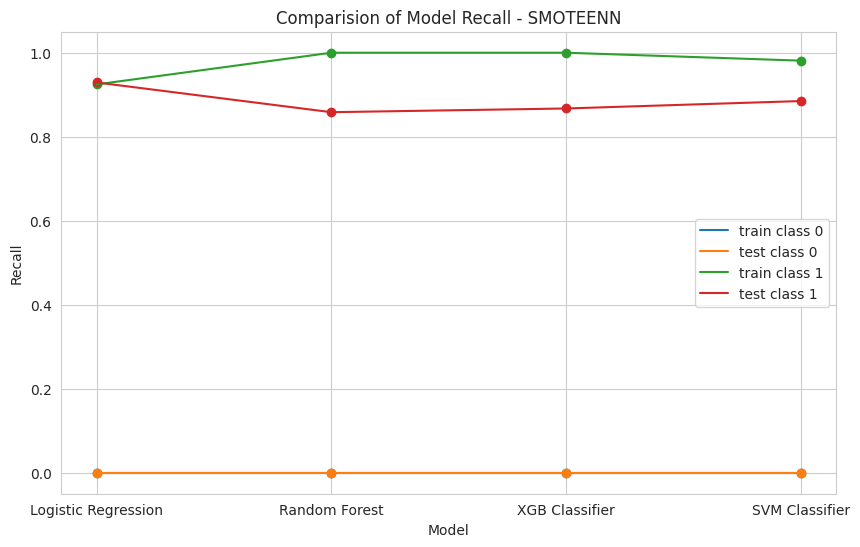

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Recall_smote_enn_train_cls0, label = "train class 0")
plt.scatter(Model,Recall_smote_enn_train_cls0)

plt.plot(Model,Recall_smote_enn_test_cls0, label = "test class 0")
plt.scatter(Model,Recall_smote_enn_test_cls0)

plt.plot(Model,Recall_smote_enn_train_cls1, label = "train class 1")
plt.scatter(Model,Recall_smote_enn_train_cls1)

plt.plot(Model,Recall_smote_enn_test_cls1, label = "test class 1")
plt.scatter(Model,Recall_smote_enn_test_cls1)

plt.xlabel("Model")
plt.ylabel("Recall")
plt.title("Comparision of Model Recall - SMOTEENN")
plt.legend()
plt.show()

# Overall Comparision of Sampling Techniques

In [ ]:
Model = ["Logistic Regression","Random Forest","XGB Classifier","SVM Classifier"]

Accuracy Plots for Test Data Class 1

In [ ]:
Acc_under_test_cls1 = [test_accuracy_class1_under_logistic,test_accuracy_class1_under_RF,test_accuracy_class1_under_xgb,test_accuracy_class1_under_svc]
Acc_enn_test_cls1 = [test_accuracy_class1_enn_logistic,test_accuracy_class1_enn_RF,test_accuracy_class1_enn_xgb,test_accuracy_class1_enn_svc]
Acc_over_test_cls1 = [test_accuracy_class1_over_logistic,test_accuracy_class1_over_RF,test_accuracy_class1_over_xgb,test_accuracy_class1_over_svc]
Acc_smote_test_cls1 = [test_accuracy_class1_smote_logistic,test_accuracy_class1_smote_RF,test_accuracy_class1_smote_xgb,test_accuracy_class1_smote_svc]
Acc_smote_enn_test_cls1 = [test_accuracy_class1_smote_enn_logistic,test_accuracy_class1_smote_enn_RF,test_accuracy_class1_smote_enn_xgb,test_accuracy_class1_smote_enn_svc]

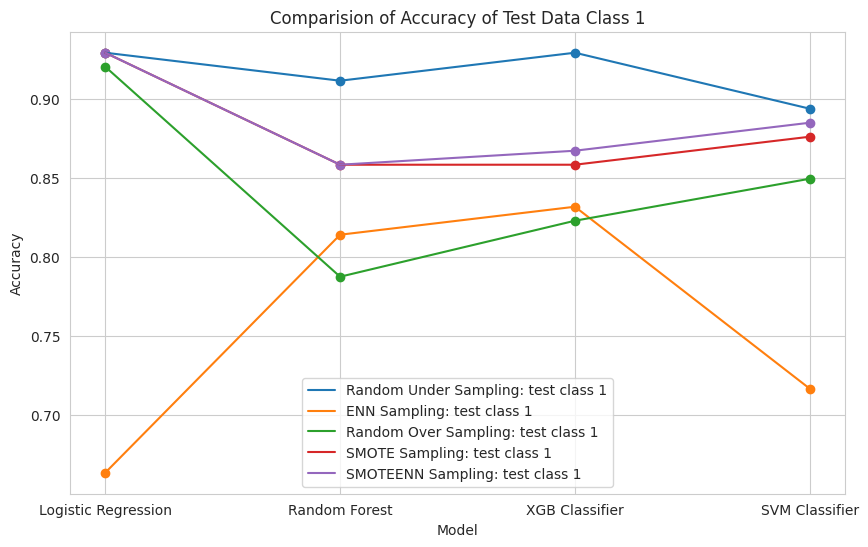

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Acc_under_test_cls1,label = "Random Under Sampling: test class 1")
plt.scatter(Model,Acc_under_test_cls1)

plt.plot(Model,Acc_enn_test_cls1,label = "ENN Sampling: test class 1")
plt.scatter(Model,Acc_enn_test_cls1)

plt.plot(Model,Acc_over_test_cls1,label = "Random Over Sampling: test class 1")
plt.scatter(Model,Acc_over_test_cls1)

plt.plot(Model,Acc_smote_test_cls1,label = "SMOTE Sampling: test class 1")
plt.scatter(Model,Acc_smote_test_cls1)

plt.plot(Model,Acc_smote_enn_test_cls1,label = "SMOTEENN Sampling: test class 1")
plt.scatter(Model,Acc_smote_enn_test_cls1)

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparision of Accuracy of Test Data Class 1")

plt.legend()
plt.show()

Precision Plots for Test Data Class 1

In [ ]:
Pre_under_test_cls1 = [test_precision_class1_under_logistic,test_precision_class1_under_RF,test_precision_class1_under_xgb,test_precision_class1_under_svc]
Pre_enn_test_cls1 = [test_precision_class1_enn_logistic,test_precision_class1_enn_RF,test_precision_class1_enn_xgb,test_precision_class1_enn_svc]
Pre_over_test_cls1 = [test_precision_class1_over_logistic,test_precision_class1_over_RF,test_precision_class1_over_xgb,test_precision_class1_over_svc]
Pre_smote_test_cls1 = [test_precision_class1_smote_logistic,test_precision_class1_smote_RF,test_precision_class1_smote_xgb,test_precision_class1_smote_svc]
Pre_smote_enn_test_cls1 = [test_precision_class1_smote_enn_logistic,test_precision_class1_smote_enn_RF,test_precision_class1_smote_enn_xgb,test_precision_class1_smote_enn_svc]

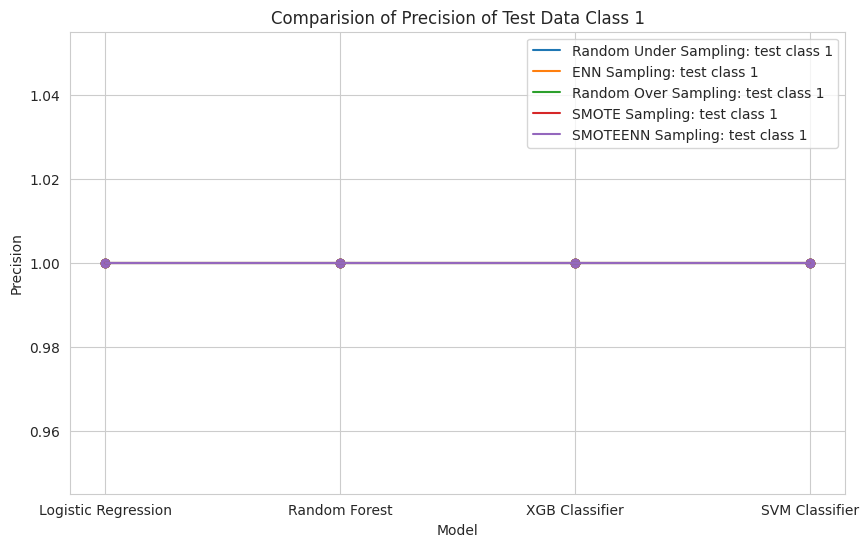

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Pre_under_test_cls1,label = "Random Under Sampling: test class 1")
plt.scatter(Model,Pre_under_test_cls1)

plt.plot(Model,Pre_enn_test_cls1,label = "ENN Sampling: test class 1")
plt.scatter(Model,Pre_enn_test_cls1)

plt.plot(Model,Pre_over_test_cls1,label = "Random Over Sampling: test class 1")
plt.scatter(Model,Pre_over_test_cls1)

plt.plot(Model,Pre_smote_test_cls1,label = "SMOTE Sampling: test class 1")
plt.scatter(Model,Pre_smote_test_cls1)

plt.plot(Model,Pre_smote_enn_test_cls1,label = "SMOTEENN Sampling: test class 1")
plt.scatter(Model,Pre_smote_enn_test_cls1)

plt.xlabel("Model")
plt.ylabel("Precision")
plt.title("Comparision of Precision of Test Data Class 1")

plt.legend()
plt.show()

Recall Plots for Test Data Class 1

In [ ]:
Recall_under_test_cls1 = [test_recall_class1_under_logistic,test_recall_class1_under_RF,test_recall_class1_under_xgb,test_recall_class1_under_svc]
Recall_enn_test_cls1 = [test_recall_class1_enn_logistic,test_recall_class1_enn_RF,test_recall_class1_enn_xgb,test_recall_class1_enn_svc]
Recall_over_test_cls1 = [test_recall_class1_over_logistic,test_recall_class1_over_RF,test_recall_class1_over_xgb,test_recall_class1_over_svc]
Recall_smote_test_cls1 = [test_recall_class1_smote_logistic,test_recall_class1_smote_RF,test_recall_class1_smote_xgb,test_recall_class1_smote_svc]
Recall_smote_enn_test_cls1 = [test_recall_class1_smote_enn_logistic,test_recall_class1_smote_enn_RF,test_recall_class1_smote_enn_xgb,test_recall_class1_smote_enn_svc]

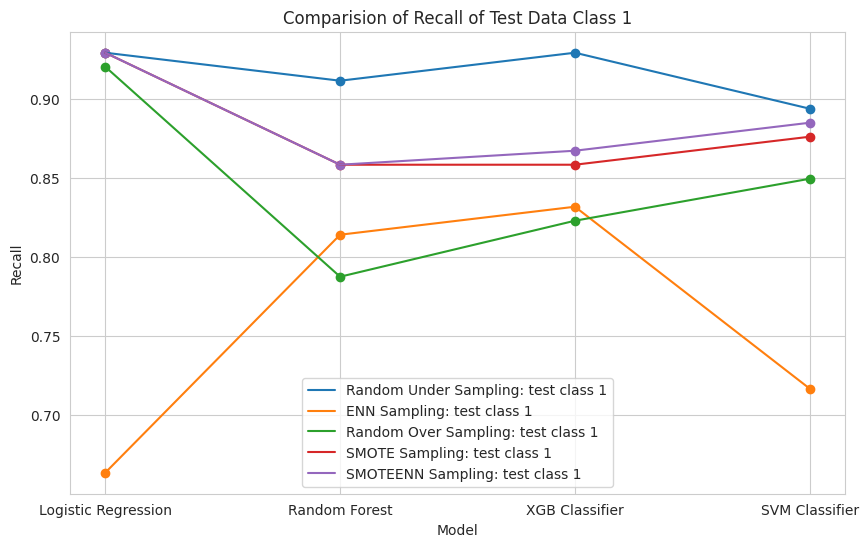

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Recall_under_test_cls1,label = "Random Under Sampling: test class 1")
plt.scatter(Model,Recall_under_test_cls1)

plt.plot(Model,Recall_enn_test_cls1,label = "ENN Sampling: test class 1")
plt.scatter(Model,Recall_enn_test_cls1)

plt.plot(Model,Recall_over_test_cls1,label = "Random Over Sampling: test class 1")
plt.scatter(Model,Recall_over_test_cls1)

plt.plot(Model,Recall_smote_test_cls1,label = "SMOTE Sampling: test class 1")
plt.scatter(Model,Recall_smote_test_cls1)

plt.plot(Model,Recall_smote_enn_test_cls1,label = "SMOTEENN Sampling: test class 1")
plt.scatter(Model,Recall_smote_enn_test_cls1)

plt.xlabel("Model")
plt.ylabel("Recall")
plt.title("Comparision of Recall of Test Data Class 1")

plt.legend()
plt.show()

# Cost Sensitive Learning

---
using class_weights parameter to assign different weights to diffenet classes



In [ ]:
X_cost = credit_df.drop(columns=['Class'],axis = 1)
y_cost = credit_df['Class']

## Splitting into Train and Test Data

In [ ]:
X_train_cost,X_test_cost,y_train_cost,y_test_cost = train_test_split(X_cost, y_cost , test_size = 0.25,random_state = 42)

## Model Training

### Logistic Regression Model

In [ ]:
Logistic_Regression_cost = LogisticRegression(class_weight = 'balanced')

Training Dataset

In [ ]:
Logistic_Regression_cost.fit(X_train_cost,y_train_cost)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(class_weight='balanced')

####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_cost_logistic = Logistic_Regression_cost.predict(X_train_cost)
train_accuracy_cost_logistic = accuracy_score(y_train_cost,train_pred_cost_logistic)
train_precision_cost_logistic = precision_score(y_train_cost,train_pred_cost_logistic)
train_recall_cost_logistic = recall_score(y_train_cost,train_pred_cost_logistic)

print("Accuracy on Training Data is: ",round(train_accuracy_cost_logistic*100,2)," %")
print("precision on Training Data is: ",round(train_precision_cost_logistic*100,2)," %")
print("recall on Training Data is: ",round(train_recall_cost_logistic*100,2)," %")

Accuracy on Training Data is:  97.63  %
precision on Training Data is:  6.46  %
recall on Training Data is:  91.82  %


Classwise Accuracy

In [ ]:
pred_cost_train_logistic = pd.DataFrame(y_train_cost)
pred_cost_train_logistic['predicted'] = train_pred_cost_logistic
pred_cost_train_logistic

Class  predicted
83225       0          0
52800       0          0
21293       0          0
133600      0          0
38225       0          0
...       ...        ...
119879      0          0
259178      0          0
131932      0          0
146867      0          0
121958      0          0

[213605 rows x 2 columns]

In [ ]:
pred_cost_train_cls0_logistic = pred_cost_train_logistic[pred_cost_train_logistic['Class'] == 0]
pred_cost_train_cls1_logistic = pred_cost_train_logistic[pred_cost_train_logistic['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_cost_class0_logistic = accuracy_score(pred_cost_train_cls0_logistic['Class'],pred_cost_train_cls0_logistic['predicted'])
train_precision_cost_class0_logistic = precision_score(pred_cost_train_cls0_logistic['Class'],pred_cost_train_cls0_logistic['predicted'])
train_recall_cost_class0_logistic = recall_score(pred_cost_train_cls0_logistic['Class'],pred_cost_train_cls0_logistic['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_cost_class0_logistic*100,2)," %")
print("precision of Class 0: ",round(train_precision_cost_class0_logistic*100,2)," %")
print("recall of Class 0: ",round(train_recall_cost_class0_logistic*100,2)," %")

Accuracy of Class 0:  97.64  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_cost_class1_logistic = accuracy_score(pred_cost_train_cls1_logistic['Class'],pred_cost_train_cls1_logistic['predicted'])
train_precision_cost_class1_logistic = precision_score(pred_cost_train_cls1_logistic['Class'],pred_cost_train_cls1_logistic['predicted'])
train_recall_cost_class1_logistic = recall_score(pred_cost_train_cls1_logistic['Class'],pred_cost_train_cls1_logistic['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_cost_class1_logistic*100,2)," %")
print("precision of Class 1: ",round(train_precision_cost_class1_logistic*100,2)," %")
print("recall of Class 1: ",round(train_recall_cost_class1_logistic*100,2)," %")


Accuracy of Class 1:  91.82  %
precision of Class 1:  100.0  %
recall of Class 1:  91.82  %


On Testing Data

In [ ]:
test_pred_cost_logistic = Logistic_Regression_cost.predict(X_test_cost)
test_accuracy1_cost_logistic = accuracy_score(y_test_cost,test_pred_cost_logistic)
test_precision1_cost_logistic = precision_score(y_test_cost,test_pred_cost_logistic)
test_recall1_cost_logistic = recall_score(y_test_cost,test_pred_cost_logistic)


print("Accuracy on Testing Data is: ",round(test_accuracy1_cost_logistic*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_cost_logistic*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_cost_logistic*100,2)," %")


Accuracy on Testing Data is:  97.58  %
precision on Testing Data is:  5.71  %
recall on Testing Data is:  92.04  %


Confusion Matrix

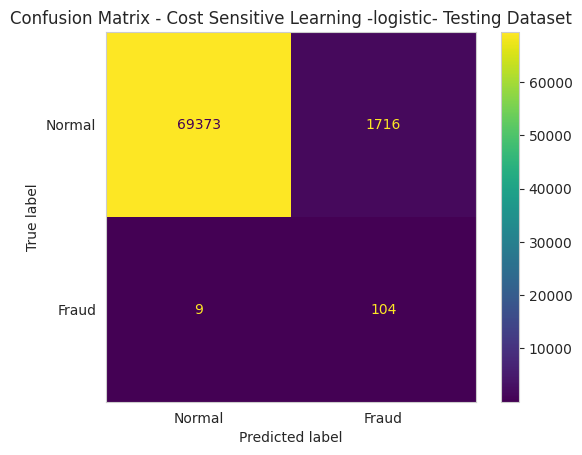

In [ ]:
confusion_matrix_cost_logistic = confusion_matrix(y_test_cost,test_pred_cost_logistic)

cm_display_cost_logistic = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_cost_logistic, display_labels = ['Normal', 'Fraud'])

cm_display_cost_logistic.plot()
plt.title("Confusion Matrix - Cost Sensitive Learning -logistic- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

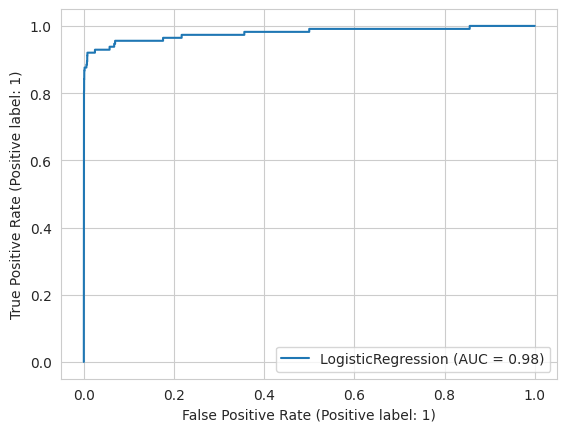

In [ ]:
Roc_display_cost_logistic = RocCurveDisplay.from_estimator(Logistic_Regression_cost,X_test_cost,y_test_cost)

Class wise Accuracy

In [ ]:
pred_cost_test_logistic = pd.DataFrame(y_test_cost)
pred_cost_test_logistic['predicted'] = test_pred_cost_logistic

pred_cost_test_logistic

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_cost_test_cls0_logistic = pred_cost_test_logistic[pred_cost_test_logistic['Class'] == 0]
pred_cost_test_cls1_logistic = pred_cost_test_logistic[pred_cost_test_logistic['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_cost_logistic = accuracy_score(pred_cost_test_cls0_logistic['Class'],pred_cost_test_cls0_logistic['predicted'])
test_precision_class0_cost_logistic = precision_score(pred_cost_test_cls0_logistic['Class'],pred_cost_test_cls0_logistic['predicted'])
test_recall_class0_cost_logistic = recall_score(pred_cost_test_cls0_logistic['Class'],pred_cost_test_cls0_logistic['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_cost_logistic*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_cost_logistic*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_cost_logistic*100,2)," %")


Accuracy of Class 0:  97.59  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_cost_logistic = accuracy_score(pred_cost_test_cls1_logistic['Class'],pred_cost_test_cls1_logistic['predicted'])
test_precision_class1_cost_logistic = precision_score(pred_cost_test_cls1_logistic['Class'],pred_cost_test_cls1_logistic['predicted'])
test_recall_class1_cost_logistic = recall_score(pred_cost_test_cls1_logistic['Class'],pred_cost_test_cls1_logistic['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_cost_logistic*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_cost_logistic*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_cost_logistic*100,2)," %")


Accuracy of Class 1:  92.04  %
precision of Class 1:  100.0  %
recall of Class 1:  92.04  %


### Random Forest Classifier

In [ ]:
Random_Forest_cost = RandomForestClassifier(class_weight = 'balanced')

Training Dataset

In [ ]:
Random_Forest_cost.fit(X_train_cost,y_train_cost)

RandomForestClassifier(class_weight='balanced')

####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_cost_RF = Random_Forest_cost.predict(X_train_cost)
train_accuracy_cost_RF = accuracy_score(y_train_cost,train_pred_cost_RF)
train_precision_cost_RF = precision_score(y_train_cost,train_pred_cost_RF)
train_recall_cost_RF = recall_score(y_train_cost,train_pred_cost_RF)


print("Accuracy on Training Data is: ",round(train_accuracy_cost_RF*100,2)," %")
print("precision on Training Data is: ",round(train_precision_cost_RF*100,2)," %")
print("recall on Training Data is: ",round(train_recall_cost_RF*100,2)," %")


Accuracy on Training Data is:  100.0  %
precision on Training Data is:  100.0  %
recall on Training Data is:  99.74  %


Classwise Accuracy

In [ ]:
pred_cost_train_RF = pd.DataFrame(y_train_cost)
pred_cost_train_RF['predicted'] = train_pred_cost_RF
pred_cost_train_RF

Class  predicted
83225       0          0
52800       0          0
21293       0          0
133600      0          0
38225       0          0
...       ...        ...
119879      0          0
259178      0          0
131932      0          0
146867      0          0
121958      0          0

[213605 rows x 2 columns]

In [ ]:
pred_cost_train_cls0_RF = pred_cost_train_RF[pred_cost_train_RF['Class'] == 0]
pred_cost_train_cls1_RF = pred_cost_train_RF[pred_cost_train_RF['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_cost_class0_RF = accuracy_score(pred_cost_train_cls0_RF['Class'],pred_cost_train_cls0_RF['predicted'])
train_precision_cost_class0_RF = precision_score(pred_cost_train_cls0_RF['Class'],pred_cost_train_cls0_RF['predicted'])
train_recall_cost_class0_RF = recall_score(pred_cost_train_cls0_RF['Class'],pred_cost_train_cls0_RF['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_cost_class0_RF*100,2)," %")
print("precision of Class 0: ",round(train_precision_cost_class0_RF*100,2)," %")
print("recall of Class 0: ",round(train_recall_cost_class0_RF*100,2)," %")


Accuracy of Class 0:  100.0  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_cost_class1_RF = accuracy_score(pred_cost_train_cls1_RF['Class'],pred_cost_train_cls1_RF['predicted'])
train_precision_cost_class1_RF = precision_score(pred_cost_train_cls1_RF['Class'],pred_cost_train_cls1_RF['predicted'])
train_recall_cost_class1_RF = recall_score(pred_cost_train_cls1_RF['Class'],pred_cost_train_cls1_RF['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_cost_class1_RF*100,2)," %")
print("precision of Class 1: ",round(train_precision_cost_class1_RF*100,2)," %")
print("recall of Class 1: ",round(train_recall_cost_class1_RF*100,2)," %")


Accuracy of Class 1:  99.74  %
precision of Class 1:  100.0  %
recall of Class 1:  99.74  %


On Testing Data

In [ ]:
test_pred_cost_RF = Random_Forest_cost.predict(X_test_cost)
test_accuracy1_cost_RF = accuracy_score(y_test_cost,test_pred_cost_RF)
test_precision1_cost_RF = precision_score(y_test_cost,test_pred_cost_RF)
test_recall1_cost_RF = recall_score(y_test_cost,test_pred_cost_RF)


print("Accuracy on Testing Data is: ",round(test_accuracy1_cost_RF*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_cost_RF*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_cost_RF*100,2)," %")


Accuracy on Testing Data is:  99.96  %
precision on Testing Data is:  94.57  %
precision on Testing Data is:  94.57  %


Confusion Matrix

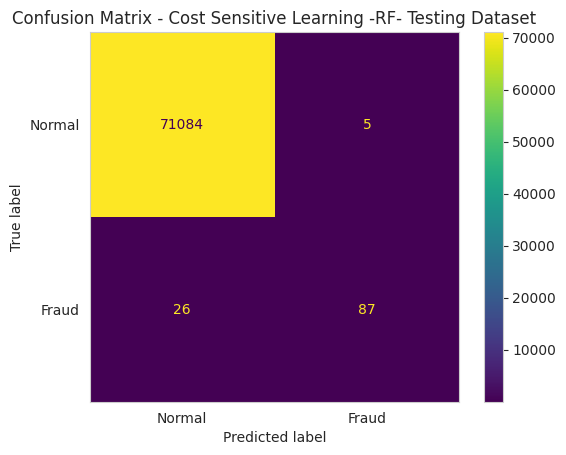

In [ ]:
confusion_matrix_cost_RF = confusion_matrix(y_test_cost,test_pred_cost_RF)

cm_display_cost_RF = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_cost_RF, display_labels = ['Normal', 'Fraud'])

cm_display_cost_RF.plot()
plt.title("Confusion Matrix - Cost Sensitive Learning -RF- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

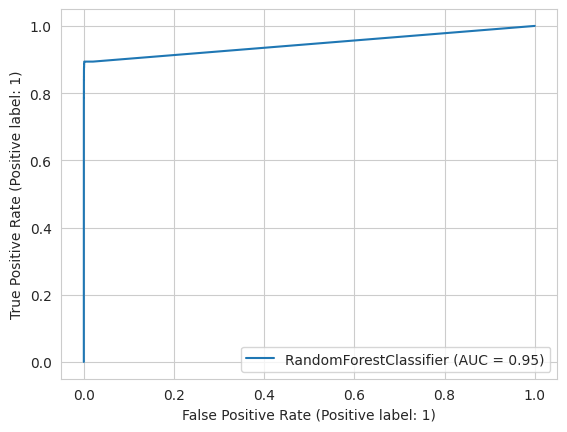

In [ ]:
Roc_display_cost_RF = RocCurveDisplay.from_estimator(Random_Forest_cost,X_test_cost,y_test_cost)

Class wise Accuracy

In [ ]:
pred_cost_test_RF = pd.DataFrame(y_test_cost)
pred_cost_test_RF['predicted'] = test_pred_cost_RF

pred_cost_test_RF

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_cost_test_cls0_RF = pred_cost_test_RF[pred_cost_test_RF['Class'] == 0]
pred_cost_test_cls1_RF = pred_cost_test_RF[pred_cost_test_RF['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_cost_RF = accuracy_score(pred_cost_test_cls0_RF['Class'],pred_cost_test_cls0_RF['predicted'])
test_precision_class0_cost_RF = precision_score(pred_cost_test_cls0_RF['Class'],pred_cost_test_cls0_RF['predicted'])
test_recall_class0_cost_RF = recall_score(pred_cost_test_cls0_RF['Class'],pred_cost_test_cls0_RF['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_cost_RF*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_cost_RF*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_cost_RF*100,2)," %")


Accuracy of Class 0:  99.99  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_cost_RF = accuracy_score(pred_cost_test_cls1_RF['Class'],pred_cost_test_cls1_RF['predicted'])
test_precision_class1_cost_RF = precision_score(pred_cost_test_cls1_RF['Class'],pred_cost_test_cls1_RF['predicted'])
test_recall_class1_cost_RF = recall_score(pred_cost_test_cls1_RF['Class'],pred_cost_test_cls1_RF['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_cost_RF*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_cost_RF*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_cost_RF*100,2)," %")


Accuracy of Class 1:  76.99  %
precision of Class 1:  100.0  %
recall of Class 1:  76.99  %


### Xtreme Gradient Boosting Classifier (XGBClassifier) 

In [ ]:
import xgboost as xgb

In [ ]:
l0 = len(Normal_df)
l1 = len(Fraud_df)

In [ ]:
xgb_cost = xgb.XGBClassifier(objective="binary:logistic",scale_pos_weight = l0/l1)

Training Dataset

In [ ]:
xgb_cost.fit(X_train_cost,y_train_cost)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_cost_xgb = xgb_cost.predict(X_train_cost)
train_accuracy_cost_xgb = accuracy_score(y_train_cost,train_pred_cost_xgb)
train_precision_cost_xgb = precision_score(y_train_cost,train_pred_cost_xgb)
train_recall_cost_xgb = recall_score(y_train_cost,train_pred_cost_xgb)


print("Accuracy on Training Data is: ",round(train_accuracy_cost_xgb*100,2)," %")
print("precision on Training Data is: ",round(train_precision_cost_xgb*100,2)," %")
print("recall on Training Data is: ",round(train_recall_cost_xgb*100,2)," %")


Accuracy on Training Data is:  100.0  %
precision on Training Data is:  100.0  %
recall on Training Data is:  100.0  %


Classwise Accuracy

In [ ]:
pred_cost_train_xgb = pd.DataFrame(y_train_cost)
pred_cost_train_xgb['predicted'] = train_pred_cost_xgb
pred_cost_train_xgb

Class  predicted
83225       0          0
52800       0          0
21293       0          0
133600      0          0
38225       0          0
...       ...        ...
119879      0          0
259178      0          0
131932      0          0
146867      0          0
121958      0          0

[213605 rows x 2 columns]

In [ ]:
pred_cost_train_cls0_xgb = pred_cost_train_xgb[pred_cost_train_xgb['Class'] == 0]
pred_cost_train_cls1_xgb = pred_cost_train_xgb[pred_cost_train_xgb['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_cost_class0_xgb = accuracy_score(pred_cost_train_cls0_xgb['Class'],pred_cost_train_cls0_xgb['predicted'])
train_precision_cost_class0_xgb = precision_score(pred_cost_train_cls0_xgb['Class'],pred_cost_train_cls0_xgb['predicted'])
train_recall_cost_class0_xgb = recall_score(pred_cost_train_cls0_xgb['Class'],pred_cost_train_cls0_xgb['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_cost_class0_xgb*100,2)," %")
print("precision of Class 0: ",round(train_precision_cost_class0_xgb*100,2)," %")
print("recall of Class 0: ",round(train_recall_cost_class0_xgb*100,2)," %")


Accuracy of Class 0:  100.0  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_cost_class1_xgb = accuracy_score(pred_cost_train_cls1_xgb['Class'],pred_cost_train_cls1_xgb['predicted'])
train_precision_cost_class1_xgb = precision_score(pred_cost_train_cls1_xgb['Class'],pred_cost_train_cls1_xgb['predicted'])
train_recall_cost_class1_xgb = recall_score(pred_cost_train_cls1_xgb['Class'],pred_cost_train_cls1_xgb['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_cost_class1_xgb*100,2)," %")
print("precision of Class 1: ",round(train_precision_cost_class1_xgb*100,2)," %")
print("recall of Class 1: ",round(train_recall_cost_class1_xgb*100,2)," %")


Accuracy of Class 1:  100.0  %
precision of Class 1:  100.0  %
recall of Class 1:  100.0  %


On Testing Data

In [ ]:
test_pred_cost_xgb = xgb_cost.predict(X_test_cost)
test_accuracy1_cost_xgb = accuracy_score(y_test_cost,test_pred_cost_xgb)
test_precision1_cost_xgb = precision_score(y_test_cost,test_pred_cost_xgb)
test_recall1_cost_xgb = recall_score(y_test_cost,test_pred_cost_xgb)


print("Accuracy on Testing Data is: ",round(test_accuracy1_cost_xgb*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_cost_xgb*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_cost_xgb*100,2)," %")


Accuracy on Testing Data is:  99.96  %
precision on Testing Data is:  89.42  %
recall on Testing Data is:  82.3  %


Confusion Matrix

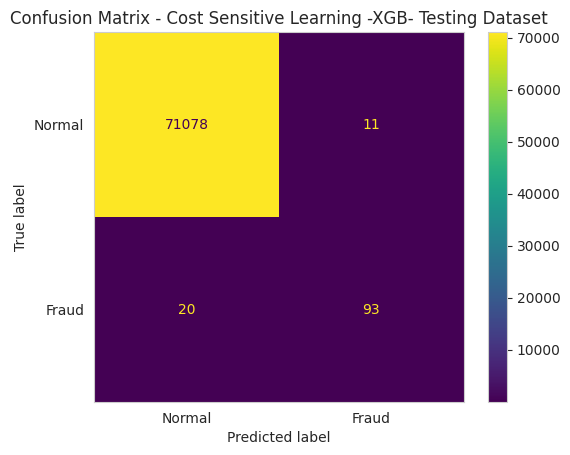

In [ ]:
confusion_matrix_cost_xgb = confusion_matrix(y_test_cost,test_pred_cost_xgb)

cm_display_cost_xgb = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_cost_xgb, display_labels = ['Normal', 'Fraud'])

cm_display_cost_xgb.plot()
plt.title("Confusion Matrix - Cost Sensitive Learning -XGB- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

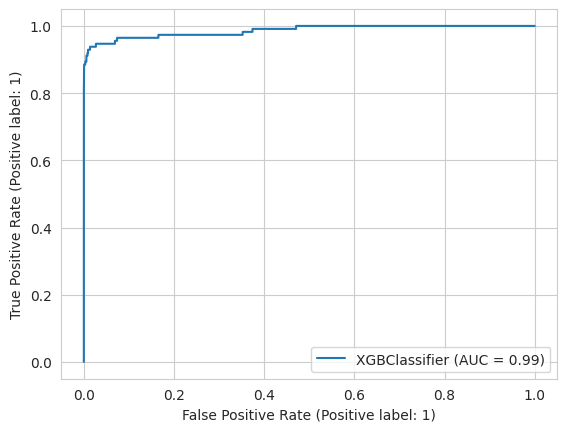

In [ ]:
Roc_display_cost_xgb = RocCurveDisplay.from_estimator(xgb_cost,X_test_cost,y_test_cost)

Class wise Accuracy

In [ ]:
pred_cost_test_xgb = pd.DataFrame(y_test_cost)
pred_cost_test_xgb['predicted'] = test_pred_cost_xgb

pred_cost_test_xgb

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_cost_test_cls0_xgb = pred_cost_test_xgb[pred_cost_test_xgb['Class'] == 0]
pred_cost_test_cls1_xgb = pred_cost_test_xgb[pred_cost_test_xgb['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_cost_xgb = accuracy_score(pred_cost_test_cls0_xgb['Class'],pred_cost_test_cls0_xgb['predicted'])
test_precision_class0_cost_xgb = precision_score(pred_cost_test_cls0_xgb['Class'],pred_cost_test_cls0_xgb['predicted'])
test_recall_class0_cost_xgb = recall_score(pred_cost_test_cls0_xgb['Class'],pred_cost_test_cls0_xgb['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_cost_xgb*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_cost_xgb*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_cost_xgb*100,2)," %")


Accuracy of Class 0:  99.98  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_cost_xgb = accuracy_score(pred_cost_test_cls1_xgb['Class'],pred_cost_test_cls1_xgb['predicted'])
test_precision_class1_cost_xgb = precision_score(pred_cost_test_cls1_xgb['Class'],pred_cost_test_cls1_xgb['predicted'])
test_recall_class1_cost_xgb = recall_score(pred_cost_test_cls1_xgb['Class'],pred_cost_test_cls1_xgb['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_cost_xgb*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_cost_xgb*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_cost_xgb*100,2)," %")


Accuracy of Class 1:  82.3  %
precision of Class 1:  100.0  %
recall of Class 1:  82.3  %


### K Nearest Neighbor Classifier (KNN)




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_cost = KNeighborsClassifier(n_neighbors=3, weights='distance')

Training Dataset

In [ ]:
knn_cost.fit(X_train_cost,y_train_cost)

KNeighborsClassifier(n_neighbors=3, weights='distance')

####Evaluation

Accuracy Score , Precision , Recall and ROC-AUC score

On Training Data

In [ ]:
train_pred_cost_knn = knn_cost.predict(X_train_cost)
train_accuracy_cost_knn = accuracy_score(y_train_cost,train_pred_cost_knn)
train_precision_cost_knn = precision_score(y_train_cost,train_pred_cost_knn)
train_recall_cost_knn = recall_score(y_train_cost,train_pred_cost_knn)

print("Accuracy on Training Data is: ",round(train_accuracy_cost_knn*100,2)," %")
print("precision on Training Data is: ",round(train_precision_cost_knn*100,2)," %")
print("recall on Training Data is: ",round(train_recall_cost_knn*100,2)," %")

Accuracy on Training Data is:  100.0  %
precision on Training Data is:  100.0  %
recall on Training Data is:  100.0  %


Classwise Accuracy

In [ ]:
pred_cost_train_knn = pd.DataFrame(y_train_cost)
pred_cost_train_knn['predicted'] = train_pred_cost_knn
pred_cost_train_knn

Class  predicted
83225       0          0
52800       0          0
21293       0          0
133600      0          0
38225       0          0
...       ...        ...
119879      0          0
259178      0          0
131932      0          0
146867      0          0
121958      0          0

[213605 rows x 2 columns]

In [ ]:
pred_cost_train_cls0_knn = pred_cost_train_knn[pred_cost_train_knn['Class'] == 0]
pred_cost_train_cls1_knn = pred_cost_train_knn[pred_cost_train_knn['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
train_accuracy_cost_class0_knn = accuracy_score(pred_cost_train_cls0_knn['Class'],pred_cost_train_cls0_knn['predicted'])
train_precision_cost_class0_knn = precision_score(pred_cost_train_cls0_knn['Class'],pred_cost_train_cls0_knn['predicted'])
train_recall_cost_class0_knn = recall_score(pred_cost_train_cls0_knn['Class'],pred_cost_train_cls0_knn['predicted'])

print("Accuracy of Class 0: ",round(train_accuracy_cost_class0_knn*100,2)," %")
print("precision of Class 0: ",round(train_precision_cost_class0_knn*100,2)," %")
print("recall of Class 0: ",round(train_recall_cost_class0_knn*100,2)," %")

Accuracy of Class 0:  100.0  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For class 1 i.e. Fraudulent Class

In [ ]:
train_accuracy_cost_class1_knn = accuracy_score(pred_cost_train_cls1_knn['Class'],pred_cost_train_cls1_knn['predicted'])
train_precision_cost_class1_knn = precision_score(pred_cost_train_cls1_knn['Class'],pred_cost_train_cls1_knn['predicted'])
train_recall_cost_class1_knn = recall_score(pred_cost_train_cls1_knn['Class'],pred_cost_train_cls1_knn['predicted'])

print("Accuracy of Class 1: ",round(train_accuracy_cost_class1_knn*100,2)," %")
print("precision of Class 1: ",round(train_precision_cost_class1_knn*100,2)," %")
print("recall of Class 1: ",round(train_recall_cost_class1_knn*100,2)," %")


Accuracy of Class 1:  100.0  %
precision of Class 1:  100.0  %
recall of Class 1:  100.0  %


On Testing Data

In [ ]:
test_pred_cost_knn = knn_cost.predict(X_test_cost)
test_accuracy1_cost_knn = accuracy_score(y_test_cost,test_pred_cost_knn)
test_precision1_cost_knn = precision_score(y_test_cost,test_pred_cost_knn)
test_recall1_cost_knn = recall_score(y_test_cost,test_pred_cost_knn)


print("Accuracy on Testing Data is: ",round(test_accuracy1_cost_knn*100,2)," %")
print("precision on Testing Data is: ",round(test_precision1_cost_knn*100,2)," %")
print("recall on Testing Data is: ",round(test_recall1_cost_knn*100,2)," %")


Accuracy on Testing Data is:  99.95  %
precision on Testing Data is:  90.32  %
recall on Testing Data is:  74.34  %


Confusion Matrix

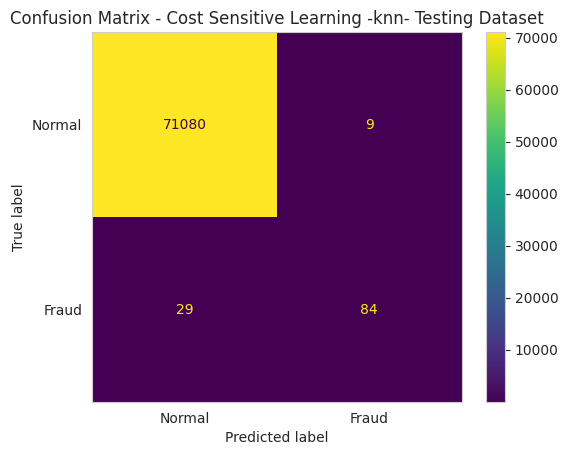

In [ ]:
confusion_matrix_cost_knn = confusion_matrix(y_test_cost,test_pred_cost_knn)

cm_display_cost_knn = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_cost_knn, display_labels = ['Normal', 'Fraud'])

cm_display_cost_knn.plot()
plt.title("Confusion Matrix - Cost Sensitive Learning -knn- Testing Dataset")
plt.grid(False)
plt.show()

ROC Curve

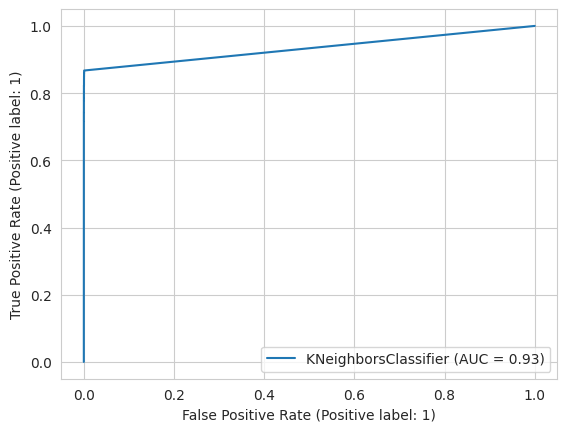

In [ ]:
Roc_display_cost_knn = RocCurveDisplay.from_estimator(knn_cost,X_test_cost,y_test_cost)

Class wise Accuracy

In [ ]:
pred_cost_test_knn = pd.DataFrame(y_test_cost)
pred_cost_test_knn['predicted'] = test_pred_cost_knn

pred_cost_test_knn

Class  predicted
43428       1          1
49906       0          0
29474       0          0
276481      0          0
278846      0          0
...       ...        ...
234953      0          0
235147      0          0
199459      0          0
172357      0          0
110731      0          0

[71202 rows x 2 columns]

In [ ]:
pred_cost_test_cls0_knn = pred_cost_test_knn[pred_cost_test_knn['Class'] == 0]
pred_cost_test_cls1_knn = pred_cost_test_knn[pred_cost_test_knn['Class'] == 1]

For class 0 i.e. Normal Transaction

In [ ]:
test_accuracy_class0_cost_knn = accuracy_score(pred_cost_test_cls0_knn['Class'],pred_cost_test_cls0_knn['predicted'])
test_precision_class0_cost_knn = precision_score(pred_cost_test_cls0_knn['Class'],pred_cost_test_cls0_knn['predicted'])
test_recall_class0_cost_knn = recall_score(pred_cost_test_cls0_knn['Class'],pred_cost_test_cls0_knn['predicted'])

print("Accuracy of Class 0: ",round(test_accuracy_class0_cost_knn*100,2)," %")
print("precision of Class 0: ",round(test_precision_class0_cost_knn*100,2)," %")
print("recall of Class 0: ",round(test_recall_class0_cost_knn*100,2)," %")


Accuracy of Class 0:  99.99  %
precision of Class 0:  0.0  %
recall of Class 0:  0.0  %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



For Class 1 i.e. Fraudulent Class

In [ ]:
test_accuracy_class1_cost_knn = accuracy_score(pred_cost_test_cls1_knn['Class'],pred_cost_test_cls1_knn['predicted'])
test_precision_class1_cost_knn = precision_score(pred_cost_test_cls1_knn['Class'],pred_cost_test_cls1_knn['predicted'])
test_recall_class1_cost_knn = recall_score(pred_cost_test_cls1_knn['Class'],pred_cost_test_cls1_knn['predicted'])

print("Accuracy of Class 1: ",round(test_accuracy_class1_cost_knn*100,2)," %")
print("precision of Class 1: ",round(test_precision_class1_cost_knn*100,2)," %")
print("recall of Class 1: ",round(test_recall_class1_cost_knn*100,2)," %")


Accuracy of Class 1:  74.34  %
precision of Class 1:  100.0  %
recall of Class 1:  74.34  %


## Evaluation graphs

In [ ]:
Model = ["Logistic Regression","Random Forest","XGB Classifier","K Nearest Neighbor"]

Accuracy Graph

In [ ]:
Acc_cost_train_cls0 = [train_accuracy_cost_class0_logistic,train_accuracy_cost_class0_RF,train_accuracy_cost_class0_xgb,train_accuracy_cost_class0_knn]
Acc_cost_test_cls0 = [test_accuracy_class0_cost_logistic,test_accuracy_class0_cost_RF,test_accuracy_class0_cost_xgb,test_accuracy_class0_cost_knn]
Acc_cost_train_cls1 = [train_accuracy_cost_class1_logistic,train_accuracy_cost_class1_RF,train_accuracy_cost_class1_xgb,train_accuracy_cost_class1_knn]
Acc_cost_test_cls1 = [test_accuracy_class1_cost_logistic,test_accuracy_class1_cost_RF,test_accuracy_class1_cost_xgb,test_accuracy_class1_cost_knn]

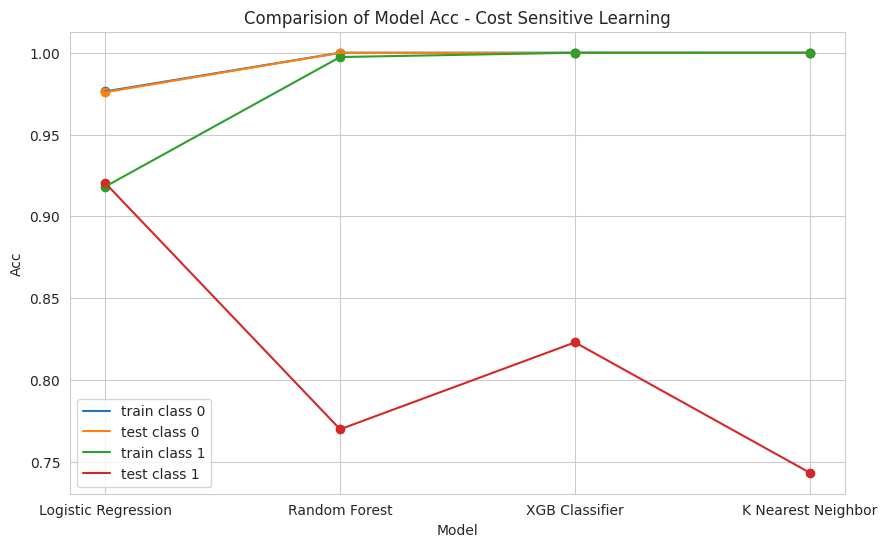

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Acc_cost_train_cls0, label = "train class 0")
plt.scatter(Model,Acc_cost_train_cls0)

plt.plot(Model,Acc_cost_test_cls0, label = "test class 0")
plt.scatter(Model,Acc_cost_test_cls0)

plt.plot(Model,Acc_cost_train_cls1, label = "train class 1")
plt.scatter(Model,Acc_cost_train_cls1)

plt.plot(Model,Acc_cost_test_cls1, label = "test class 1")
plt.scatter(Model,Acc_cost_test_cls1)

plt.ylabel("Acc")
plt.xlabel("Model")
plt.title("Comparision of Model Acc - Cost Sensitive Learning")
plt.legend()
plt.show()

Precision Graph

In [ ]:
Pre_cost_train_cls0 = [train_precision_cost_class0_logistic,train_precision_cost_class0_RF,train_precision_cost_class0_xgb,train_precision_cost_class0_knn]
Pre_cost_test_cls0 = [test_precision_class0_cost_logistic,test_precision_class0_cost_RF,test_precision_class0_cost_xgb,test_precision_class0_cost_knn]
Pre_cost_train_cls1 = [train_precision_cost_class1_logistic,train_precision_cost_class1_RF,train_precision_cost_class1_xgb,train_precision_cost_class1_knn]
Pre_cost_test_cls1 = [test_precision_class1_cost_logistic,test_precision_class1_cost_RF,test_precision_class1_cost_xgb,test_precision_class1_cost_knn]

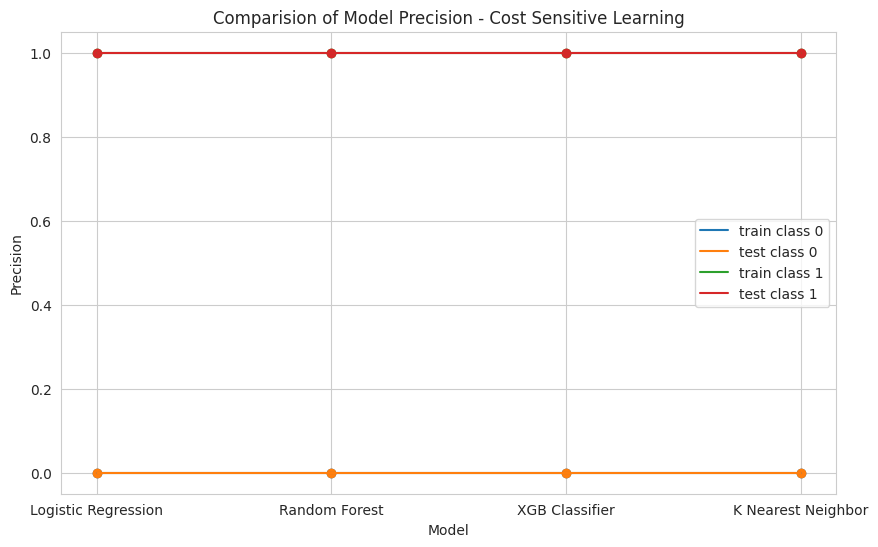

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Pre_cost_train_cls0, label = "train class 0")
plt.scatter(Model,Pre_cost_train_cls0)

plt.plot(Model,Pre_cost_test_cls0, label = "test class 0")
plt.scatter(Model,Pre_cost_test_cls0)

plt.plot(Model,Pre_cost_train_cls1, label = "train class 1")
plt.scatter(Model,Pre_cost_train_cls1)

plt.plot(Model,Pre_cost_test_cls1, label = "test class 1")
plt.scatter(Model,Pre_cost_test_cls1)

plt.ylabel("Precision")
plt.xlabel("Model")
plt.title("Comparision of Model Precision - Cost Sensitive Learning")
plt.legend()
plt.show()

Recall Graph

In [ ]:
Recall_cost_train_cls0 = [train_recall_cost_class0_logistic,train_recall_cost_class0_RF,train_recall_cost_class0_xgb,train_recall_cost_class0_knn]
Recall_cost_test_cls0 = [test_recall_class0_cost_logistic,test_recall_class0_cost_RF,test_recall_class0_cost_xgb,test_recall_class0_cost_knn]
Recall_cost_train_cls1 = [train_recall_cost_class1_logistic,train_recall_cost_class1_RF,train_recall_cost_class1_xgb,train_recall_cost_class1_knn]
Recall_cost_test_cls1 = [test_recall_class1_cost_logistic,test_recall_class1_cost_RF,test_recall_class1_cost_xgb,test_recall_class1_cost_knn]

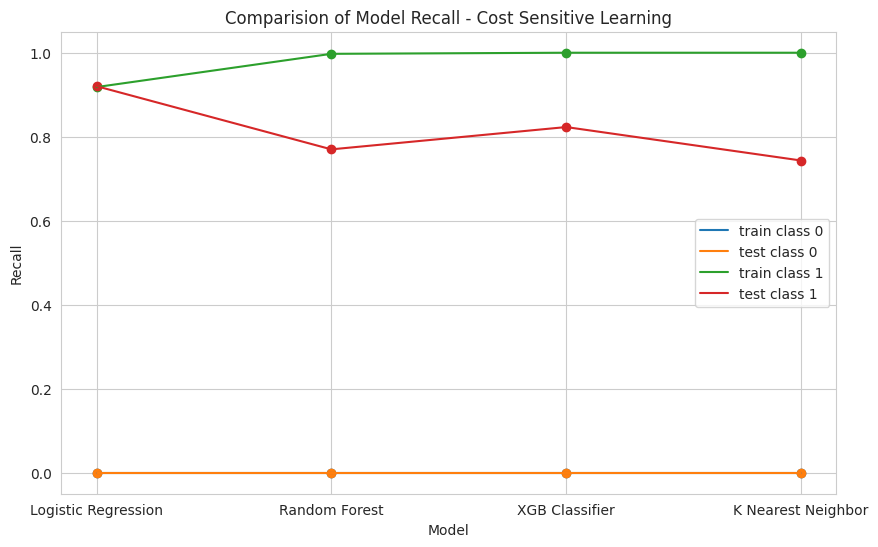

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Recall_cost_train_cls0, label = "train class 0")
plt.scatter(Model,Recall_cost_train_cls0)

plt.plot(Model,Recall_cost_test_cls0, label = "test class 0")
plt.scatter(Model,Recall_cost_test_cls0)

plt.plot(Model,Recall_cost_train_cls1, label = "train class 1")
plt.scatter(Model,Recall_cost_train_cls1)

plt.plot(Model,Recall_cost_test_cls1, label = "test class 1")
plt.scatter(Model,Recall_cost_test_cls1)

plt.ylabel("Recall")
plt.xlabel("Model")
plt.title("Comparision of Model Recall - Cost Sensitive Learning")
plt.legend()
plt.show()

Evaluation Graphs for Class 1 (Fraudulent Transactions)

In [ ]:
Acc_cost_test_cls1 = [test_accuracy_class1_cost_logistic,test_accuracy_class1_cost_RF,test_accuracy_class1_cost_xgb,test_accuracy_class1_cost_knn]
Pre_cost_test_cls1 = [test_precision_class1_cost_logistic,test_precision_class1_cost_RF,test_precision_class1_cost_xgb,test_precision_class1_cost_knn]
Recall_cost_test_cls1 = [test_recall_class1_cost_logistic,test_recall_class1_cost_RF,test_recall_class1_cost_xgb,test_recall_class1_cost_knn]

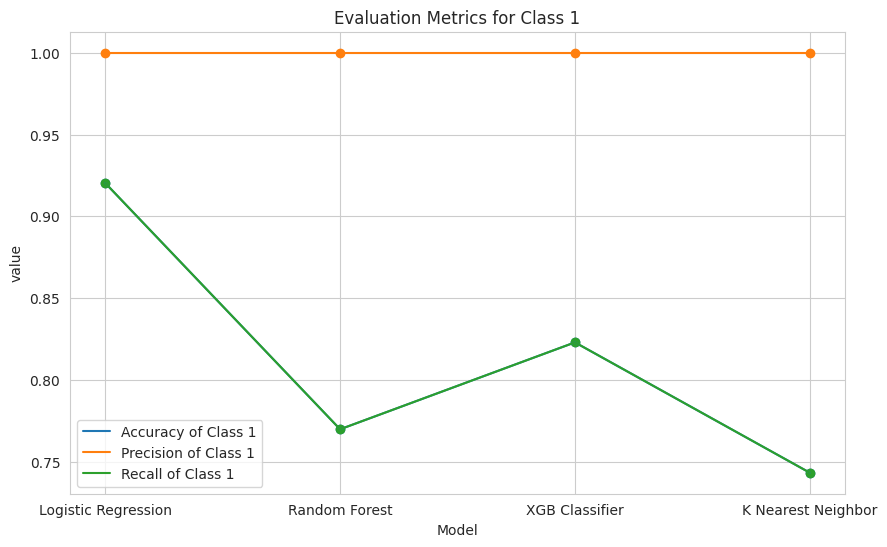

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(Model,Acc_cost_test_cls1,label = "Accuracy of Class 1")
plt.scatter(Model,Acc_cost_test_cls1)

plt.plot(Model,Pre_cost_test_cls1,label = "Precision of Class 1")
plt.scatter(Model,Pre_cost_test_cls1)

plt.plot(Model,Recall_cost_test_cls1,label = "Recall of Class 1")
plt.scatter(Model,Recall_cost_test_cls1)

plt.xlabel("Model")
plt.ylabel("value")
plt.title("Evaluation Metrics for Class 1")

plt.legend()
plt.show()